In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive
!rm -r krunchh
!unzip krunchh.zip

/content/drive/MyDrive
Archive:  krunchh.zip
   creating: krunchh/
   creating: krunchh/Test_Krunch/
  inflating: krunchh/Test_Krunch/Test-1542969243754.csv  
  inflating: krunchh/Test_Krunch/Test_Beneficiarydata-1542969243754.csv  
  inflating: krunchh/Test_Krunch/Test_Inpatientdata-1542969243754.csv  
  inflating: krunchh/Test_Krunch/Test_Outpatientdata-1542969243754.csv  
   creating: krunchh/Train_Krunch/
  inflating: krunchh/Train_Krunch/Train-1542865627584.csv  
  inflating: krunchh/Train_Krunch/Train_Beneficiarydata-1542865627584.csv  
  inflating: krunchh/Train_Krunch/Train_Inpatientdata-1542865627584.csv  
  inflating: krunchh/Train_Krunch/Train_Outpatientdata-1542865627584.csv  


In [ ]:
%cd /content/drive/MyDrive/krunchh

/content/drive/MyDrive/krunchh


In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stat
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
pd.set_option('display.max_columns',1000)

In [ ]:

td=pd.read_csv('/content/drive/MyDrive/krunchh/Train_Krunch/Train-1542865627584.csv')
td

Provider PotentialFraud
0     PRV51001             No
1     PRV51003            Yes
2     PRV51004             No
3     PRV51005            Yes
4     PRV51007             No
...        ...            ...
5405  PRV57759             No
5406  PRV57760             No
5407  PRV57761             No
5408  PRV57762             No
5409  PRV57763             No

[5410 rows x 2 columns]

In [ ]:
tbd=pd.read_csv('/content/drive/MyDrive/krunchh/Train_Krunch/Train_Beneficiarydata-1542865627584.csv')
tbd

BeneID         DOB  DOD  Gender  Race RenalDiseaseIndicator  \
0        BENE11001  1943-01-01  NaN       1     1                     0   
1        BENE11002  1936-09-01  NaN       2     1                     0   
2        BENE11003  1936-08-01  NaN       1     1                     0   
3        BENE11004  1922-07-01  NaN       1     1                     0   
4        BENE11005  1935-09-01  NaN       1     1                     0   
...            ...         ...  ...     ...   ...                   ...   
138551  BENE159194  1939-07-01  NaN       1     1                     0   
138552  BENE159195  1938-12-01  NaN       2     1                     0   
138553  BENE159196  1916-06-01  NaN       2     1                     0   
138554  BENE159197  1930-01-01  NaN       1     1                     0   
138555  BENE159198  1952-04-01  NaN       2     1                     0   

        State  County  NoOfMonths_PartACov  NoOfMonths_PartBCov  \
0          39     230                   12                   12   
1          39     280                   12                   12   
2          52     590                   12                   12   
3          39     270                   12                   12   
4          24     680                   12                   12   
...       ...     ...                  ...                  ...   
138551     39     140                   12                   12   
138552     49     530                   12                   12   
138553      6     150                   12                   12   
138554     16     560                   12                   12   
138555     21      20                   12                   12   

        ChronicCond_Alzheimer  ChronicCond_Heartfailure  \
0                           1                         2   
1                           2                         2   
2                           1                         2   
3                           1                         1   
4                           2                         2   
...                       ...                       ...   
138551                      1                         2   
138552                      1                         2   
138553                      2                         1   
138554                      1                         1   
138555                      1                         1   

        ChronicCond_KidneyDisease  ChronicCond_Cancer  \
0                               1                   2   
1                               2                   2   
2                               2                   2   
3                               2                   2   
4                               2                   2   
...                           ...                 ...   
138551                          2                   2   
138552                          2                   2   
138553                          1                   1   
138554                          2                   2   
138555                          2                   2   

        ChronicCond_ObstrPulmonary  ChronicCond_Depression  \
0                                2                       1   
1                                2                       2   
2                                2                       2   
3                                2                       2   
4                                1                       2   
...                            ...                     ...   
138551                           2                       2   
138552                           2                       2   
138553                           2                       1   
138554                           2                       2   
138555                           2                       1   

        ChronicCond_Diabetes  ChronicCond_IschemicHeart  \
0                          1                          1   
1                          2                     

In [ ]:
tid=pd.read_csv('/content/drive/MyDrive/krunchh/Train_Krunch/Train_Inpatientdata-1542865627584.csv')
tid

BeneID   ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0       BENE11001  CLM46614   2009-04-12  2009-04-18  PRV55912   
1       BENE11001  CLM66048   2009-08-31  2009-09-02  PRV55907   
2       BENE11001  CLM68358   2009-09-17  2009-09-20  PRV56046   
3       BENE11011  CLM38412   2009-02-14  2009-02-22  PRV52405   
4       BENE11014  CLM63689   2009-08-13  2009-08-30  PRV56614   
...           ...       ...          ...         ...       ...   
40469  BENE159167  CLM69886   2009-09-28  2009-10-02  PRV53671   
40470  BENE159175  CLM74504   2009-11-03  2009-11-06  PRV54981   
40471  BENE159177  CLM76485   2009-11-18  2009-11-22  PRV56588   
40472  BENE159177  CLM79949   2009-12-17  2009-12-18  PRV56575   
40473  BENE159188  CLM69948   2009-09-28  2009-10-06  PRV54765   

       InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                       26000          PHY390922                NaN   
1                        5000          PHY318495          PHY318495   
2                        5000          PHY372395                NaN   
3                        5000          PHY369659          PHY392961   
4                       10000          PHY379376          PHY398258   
...                       ...                ...                ...   
40469                    7000          PHY345332          PHY319565   
40470                    4000          PHY342806          PHY365497   
40471                    3000          PHY423220          PHY332752   
40472                    5000          PHY353156                NaN   
40473                   15000          PHY431177          PHY352941   

      OtherPhysician AdmissionDt ClmAdmitDiagnosisCode  DeductibleAmtPaid  \
0                NaN  2009-04-12                  7866             1068.0   
1                NaN  2009-08-31                  6186             1068.0   
2          PHY324689  2009-09-17                 29590             1068.0   
3          PHY349768  2009-02-14                   431             1068.0   
4                NaN  2009-08-13                 78321             1068.0   
...              ...         ...                   ...                ...   
40469            NaN  2009-09-28                  2859             1068.0   
40470            NaN  2009-11-03                 79902             1068.0   
40471            NaN  2009-11-18                 78605             1068.0   
40472            NaN  2009-12-17                  7802             1068.0   
40473            NaN  2009-09-28                  1536             1068.0   

      DischargeDt DiagnosisGroupCode ClmDiagnosisCode_1 ClmDiagnosisCode_2  \
0      2009-04-18                201               1970               4019   
1      2009-09-02                750               6186               2948   
2      2009-09-20                883              29623              30390   
3      2009-02-22                067              43491               2762   
4      2009-08-30                975                042               3051   
...           ...                ...                ...                ...   
40469  2009-10-02                812               2851               2762   
40470  2009-11-06                228              42823               4148   
40471  2009-11-22                302               4280               3963   
40472  2009-12-18                309               7802               5859   
40473  2009-10-06                340               1540              27800   

      ClmDiagnosisCode_3 ClmDiagnosisCode_4 ClmDiagnosisCode_5  \
0                   5853               7843               2768   
1                  56400                NaN                NaN   
2                  71690              34590              V1581   
3                   7843              32723              V1041   
4                  34400               5856              42732   
...                  ...                ...                ...   
40469              53550              V02

In [ ]:
tod=pd.read_csv('/content/drive/MyDrive/krunchh/Train_Krunch/Train_Outpatientdata-1542865627584.csv')
tod

BeneID    ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0        BENE11002  CLM624349   2009-10-11  2009-10-11  PRV56011   
1        BENE11003  CLM189947   2009-02-12  2009-02-12  PRV57610   
2        BENE11003  CLM438021   2009-06-27  2009-06-27  PRV57595   
3        BENE11004  CLM121801   2009-01-06  2009-01-06  PRV56011   
4        BENE11004  CLM150998   2009-01-22  2009-01-22  PRV56011   
...            ...        ...          ...         ...       ...   
517732  BENE159198  CLM510792   2009-08-06  2009-08-06  PRV53699   
517733  BENE159198  CLM551294   2009-08-29  2009-08-29  PRV53702   
517734  BENE159198  CLM596444   2009-09-24  2009-09-24  PRV53676   
517735  BENE159198  CLM636992   2009-10-18  2009-10-18  PRV53689   
517736  BENE159198  CLM686139   2009-11-17  2009-11-18  PRV53689   

        InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                           30          PHY326117                NaN   
1                           80          PHY362868                NaN   
2                           10          PHY328821                NaN   
3                           40          PHY334319                NaN   
4                          200          PHY403831                NaN   
...                        ...                ...                ...   
517732                     800          PHY364188          PHY364188   
517733                     400          PHY423019          PHY332284   
517734                      60          PHY361063                NaN   
517735                      70          PHY403198                NaN   
517736                      80          PHY419379                NaN   

       OtherPhysician ClmDiagnosisCode_1 ClmDiagnosisCode_2  \
0                 NaN              78943              V5866   
1                 NaN               6115                NaN   
2                 NaN               2723                NaN   
3                 NaN              71988                NaN   
4                 NaN              82382              30000   
...               ...                ...                ...   
517732      PHY385752               2163              V4575   
517733            NaN              07041               5781   
517734            NaN               V570              78079   
517735      PHY419379                NaN                NaN   
517736      PHY419379              78900              78609   

       ClmDiagnosisCode_3 ClmDiagnosisCode_4 ClmDiagnosisCode_5  \
0                   V1272                NaN                NaN   
1                     NaN                NaN                NaN   
2                     NaN                NaN                NaN   
3                     NaN                NaN                NaN   
4                   72887               4280               7197   
...                   ...                ...                ...   
517732              53190                NaN                NaN   
517733              25000                NaN                NaN   
517734                NaN                NaN                NaN   
517735                NaN                NaN                NaN   
517736               4280              71946               3310   

       ClmDiagnosisCode_6 ClmDiagnosisCode_7 ClmDiagnosisCode_8  \
0                     NaN                NaN                NaN   
1                     NaN                NaN                NaN   
2                     NaN                NaN                NaN   
3                     NaN                NaN                NaN   
4                   V4577                NaN                NaN   
...                   ...                ...                ...   
517732                NaN                NaN                NaN   
517733                NaN                NaN                NaN   
517734                NaN                NaN                NaN   
517735                NaN                NaN                NaN   
517736              75311      

In [ ]:
td.PotentialFraud.value_counts()/len(td)

No     0.90647
Yes    0.09353
Name: PotentialFraud, dtype: float64

In [ ]:
lc_tbd=[]
ld_tbd=[]
ln_tbd=[]
for x in tbd.columns:
    if tbd[x].dtype=='object':
        lc_tbd.append(x)
    elif tbd[x].nunique()<=30:
        ld_tbd.append(x)
    else:
        ln_tbd.append(x)

In [ ]:
lt_tbd=[lc_tbd[1],lc_tbd[2]]
lc_tbd.pop(1)
lc_tbd.pop(1)

'DOD'

In [ ]:
for x in lt_tbd:
    tbd[x]=pd.to_datetime(tbd[x])

In [ ]:
tbd['Isdead']=tbd[lt_tbd[1]].replace(np.NaN,'M',regex=False).apply(lambda x: 0 if x=='M' else 1)
tbd[lt_tbd[1]]=tbd[lt_tbd[1]].replace(np.NaN,pd.Timestamp('2009/12/1'),regex=False)
tbd[['ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke']]=tbd[['ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke']].replace(2,0,regex=False)
tbd['RenalDiseaseIndicator']=tbd.RenalDiseaseIndicator.replace('Y',1,regex=False).astype(np.int64)

In [ ]:
tbd['Age']=((tbd[lt_tbd[1]]-tbd[lt_tbd[0]]).dt.days*86400+(tbd[lt_tbd[1]]-tbd[lt_tbd[0]]).dt.seconds)/(365*24*3600)

In [ ]:
#tbd=tbd.drop(lt_tbd,axis=1)
ln_tbd.append('Age')

In [ ]:
tbd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 27 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   BeneID                           138556 non-null  object        
 1   DOB                              138556 non-null  datetime64[ns]
 2   DOD                              138556 non-null  datetime64[ns]
 3   Gender                           138556 non-null  int64         
 4   Race                             138556 non-null  int64         
 5   RenalDiseaseIndicator            138556 non-null  int64         
 6   State                            138556 non-null  int64         
 7   County                           138556 non-null  int64         
 8   NoOfMonths_PartACov              138556 non-null  int64         
 9   NoOfMonths_PartBCov              138556 non-null  int64         
 10  ChronicCond_Alzheimer            138556 non-

In [ ]:
tbd.isnull().mean()

BeneID                             0.0
DOB                                0.0
DOD                                0.0
Gender                             0.0
Race                               0.0
RenalDiseaseIndicator              0.0
State                              0.0
County                             0.0
NoOfMonths_PartACov                0.0
NoOfMonths_PartBCov                0.0
ChronicCond_Alzheimer              0.0
ChronicCond_Heartfailure           0.0
ChronicCond_KidneyDisease          0.0
ChronicCond_Cancer                 0.0
ChronicCond_ObstrPulmonary         0.0
ChronicCond_Depression             0.0
ChronicCond_Diabetes               0.0
ChronicCond_IschemicHeart          0.0
ChronicCond_Osteoporasis           0.0
ChronicCond_rheumatoidarthritis    0.0
ChronicCond_stroke                 0.0
IPAnnualReimbursementAmt           0.0
IPAnnualDeductibleAmt              0.0
OPAnnualReimbursementAmt           0.0
OPAnnualDeductibleAmt              0.0
Isdead                   

In [ ]:
tbd.describe()

Gender           Race  RenalDiseaseIndicator          State  \
count  138556.000000  138556.000000          138556.000000  138556.000000   
mean        1.570932       1.254511               0.141300      25.666734   
std         0.494945       0.717007               0.348332      15.223443   
min         1.000000       1.000000               0.000000       1.000000   
25%         1.000000       1.000000               0.000000      11.000000   
50%         2.000000       1.000000               0.000000      25.000000   
75%         2.000000       1.000000               0.000000      39.000000   
max         2.000000       5.000000               1.000000      54.000000   

              County  NoOfMonths_PartACov  NoOfMonths_PartBCov  \
count  138556.000000        138556.000000        138556.000000   
mean      374.424745            11.907727            11.910145   
std       266.277581             1.032332             0.936893   
min         0.000000             0.000000             0.000000   
25%       141.000000            12.000000            12.000000   
50%       340.000000            12.000000            12.000000   
75%       570.000000            12.000000            12.000000   
max       999.000000            12.000000            12.000000   

       ChronicCond_Alzheimer  ChronicCond_Heartfailure  \
count          138556.000000             138556.000000   
mean                0.332183                  0.493678   
std                 0.470998                  0.499962   
min                 0.000000                  0.000000   
25%                 0.000000                  0.000000   
50%                 0.000000                  0.000000   
75%                 1.000000                  1.000000   
max                 1.000000                  1.000000   

       ChronicCond_KidneyDisease  ChronicCond_Cancer  \
count              138556.000000       138556.000000   
mean                    0.312357            0.119959   
std                     0.463456            0.324914   
min                     0.000000            0.000000   
25%                     0.000000            0.000000   
50%                     0.000000            0.000000   
75%                     1.000000            0.000000   
max                     1.000000            1.000000   

       ChronicCond_ObstrPulmonary  ChronicCond_Depression  \
count               138556.000000           138556.000000   
mean                     0.237153                0.355524   
std                      0.425339                0.478674   
min                      0.000000                0.000000   
25%                      0.000000                0.000000   
50%                      0.000000                0.000000   
75%                      0.000000                1.000000   
max                      1.000000                1.000000   

       ChronicCond_Diabetes  ChronicCond_IschemicHeart  \
count         138556.000000              138556.000000   
mean               0.601858                   0.675857   
std                0.489517                   0.468056   
min                0.000000                   0.000000   
25%                0.000000                   0.000000   
50%                1.000000                   1.000000   
75%                1.000000                   1.000000   
max                1.000000                   1.000000   

       ChronicCond_Osteoporasis  ChronicCond_rheumatoidarthritis  \
count             138556.000000                    138556.000000   
mean                   0.274683                         0.256820   
std                    0.446356                         0.436881   
min                    0.000000                         0.000000   
25%                    0.000000                         0.000000   
50%                    0.000000                         0.000000   
75%                    1.000000                         1.000000   
max                    1.000000                         1.000000   

       Chro

In [ ]:
tidb=pd.merge(tid,tbd,how='left',on='BeneID')

In [ ]:
tidbd=pd.merge(tidb,td,how='left',on='Provider')

In [ ]:
tidbd[tidbd.columns[-1]].value_counts()/len(tidbd)

Yes    0.578198
No     0.421802
Name: PotentialFraud, dtype: float64

In [ ]:
todb=pd.merge(tod,tbd,how='left',on='BeneID')

In [ ]:
todbd=pd.merge(todb,td,how='left',on='Provider')

In [ ]:

for x in tidbd.columns:
    if x not in todbd.columns:
        print(x)

AdmissionDt
DischargeDt
DiagnosisGroupCode


In [ ]:

def get_days(df,col1,col2):
    df[col1]=pd.to_datetime(df[col1])
    df[col2]=pd.to_datetime(df[col2])
    s1=pd.DataFrame([df[col1].dt.year,df[col2].dt.year,df[col1].dt.month,df[col2].dt.month,df[col1].dt.day,df[col2].dt.day],index=[col1+'_y',col2+'_y',col1+'_m',col2+'_m',col1+'_d',col2+'_d']).T
    df1=s1[~((s1[col1+'_y']<s1[col2+'_y'])|((s1[col1+'_y']==s1[col2+'_y'])&(s1[col1+'_m']<s1[col2+'_m']))|((s1[col1+'_y']==s1[col2+'_y'])&(s1[col1+'_m']==s1[col2+'_m'])&(s1[col1+'_d']<s1[col2+'_d'])))]
    df2=s1[(s1[col1+'_y']<s1[col2+'_y'])|((s1[col1+'_y']==s1[col2+'_y'])&(s1[col1+'_m']<s1[col2+'_m']))|((s1[col1+'_y']==s1[col2+'_y'])&(s1[col1+'_m']==s1[col2+'_m'])&(s1[col1+'_d']<s1[col2+'_d']))]
    l1=[]
    l2=[]
    l3=[]
    for x in df2.index:
        t1=(df2[col1+'_y'].loc[x]-df2[col2+'_y'].loc[x])*12*30+(df2[col1+'_d'].loc[x]-df2[col2+'_m'].loc[x])*30+(df2[col1+'_m'].loc[x]-df2[col2+'_d'].loc[x])
        t2=(df2[col1+'_y'].loc[x]-df2[col2+'_y'].loc[x])*12*30+(df2[col1+'_m'].loc[x]-df2[col2+'_d'].loc[x])*30+(df2[col1+'_d'].loc[x]-df2[col2+'_m'].loc[x])
        t3=(df2[col1+'_y'].loc[x]-df2[col2+'_y'].loc[x])*12*30+(df2[col1+'_d'].loc[x]-df2[col2+'_d'].loc[x])*30+(df2[col1+'_m'].loc[x]-df2[col2+'_m'].loc[x])
        if (min(abs(t1),abs(t2),abs(t3))==abs(t1))&(t1>=0):
            t=df2.loc[x][col1+'_d']
            df2.loc[x][col1+'_d']=df2.loc[x][col1+'_m']
            df2.loc[x][col1+'_m']=t
        elif (min(abs(t1),abs(t2),abs(t3))==abs(t1))&(t1<0):
            if(min(abs(t2),abs(t3))==abs(t2)&(t2>=0)):
                t=df2.loc[x][col2+'_d']
                df2.loc[x][col2+'_d']=df2.loc[x][col2+'_m']
                df2.loc[x][col2+'_m']=t
            else:
                t=df2.loc[x][col1+'_d']
                df2.loc[x][col1+'_d']=df2.loc[x][col1+'_m']
                df2.loc[x][col1+'_m']=t
                t1=df2.loc[x][col2+'_d']
                df2.loc[x][col2+'_d']=df2.loc[x][col2+'_m']
                df2.loc[x][col2+'_m']=t1
        elif (min(abs(t1),abs(t2),abs(t3))==abs(t2))&(t2>=0):
            t=df2.loc[x][col2+'_d']
            df2.loc[x][col2+'_d']=df2.loc[x][col2+'_m']
            df2.loc[x][col2+'_m']=t
        elif (min(abs(t1),abs(t2),abs(t3))==abs(t2))&(t2<0):
            if(min(abs(t1),abs(t3))==abs(t1)&(t1>=0)):
                t=df2.loc[x][col1+'_d']
                df2.loc[x][col1+'_d']=df2.loc[x][col1+'_m']
                df2.loc[x][col1+'_m']=t
            else:
                t=df2.loc[x][col1+'_d']
                df2.loc[x][col1+'_d']=df2.loc[x][col1+'_m']
                df2.loc[x][col1+'_m']=t
                t1=df2.loc[x][col2+'_d']
                df2.loc[x][col2+'_d']=df2.loc[x][col2+'_m']
                df2.loc[x][col2+'_m']=t1
        elif (min(abs(t1),abs(t2),abs(t3))==abs(t3))&(t3>=0):
            t=df2.loc[x][col1+'_d']
            df2.loc[x][col1+'_d']=df2.loc[x][col1+'_m']
            df2.loc[x][col1+'_m']=t
            t1=df2.loc[x][col2+'_d']
            df2.loc[x][col2+'_d']=df2.loc[x][col2+'_m']
            df2.loc[x][col2+'_m']=t1
        elif (min(abs(t1),abs(t2),abs(t3))==abs(t3))&(t3<0):
            if(min(abs(t1),abs(t2))==abs(t1)&(t1>=0)):
                t=df2.loc[x][col1+'_d']
                df2.loc[x][col1+'_d']=df2.loc[x][col1+'_m']
                df2.loc[x][col1+'_m']=t
            else:
                t=df2.loc[x][col2+'_d']
                df2.loc[x][col2+'_d']=df2.loc[x][col2+'_m']
                df2.loc[x][col2+'_m']=t
    df=pd.concat([df1,df2],axis=0)
    tr=(df[col1+'_y']-df[col2+'_y'])*12*30+(df[col1+'_m']-df[col2+'_m'])*30+(df[col1+'_d']-df[col2+'_d'])
    if col1=='DischargeDt':
        return tr+1
    return tr

In [ ]:
tidbd['Days_Hosp']=get_days(tidbd,'DischargeDt','AdmissionDt')
#tidbd=tidbd.drop(['DischargeDt','AdmissionDt'],axis=1)
tidbd['Days_Claim']=get_days(tidbd,'ClaimEndDt','ClaimStartDt')
#tidbd=tidbd.drop(['ClaimEndDt','ClaimStartDt'],axis=1)

In [ ]:
todbd['Days_Hosp']=1
todbd['DiagnosisGroupCode']='Missing'
todbd['Days_Claim']=get_days(todbd,'ClaimEndDt','ClaimStartDt')
todbd['AdmissionDt']=pd.NaT
todbd['DischargeDt']=pd.NaT
#todbd=todbd.drop(['ClaimEndDt','ClaimStartDt'],axis=1)

In [ ]:
df=pd.concat([tidbd,todbd],axis=0).reset_index(drop=True).sort_values(by='BeneID').reset_index(drop=True)
df['PotentialFraud']=df['PotentialFraud'].replace('Yes',1,regex=False).replace('No',0,regex=False)
df

BeneID    ClaimID ClaimStartDt ClaimEndDt  Provider  \
0       BENE100000  CLM351838   2009-05-10 2009-05-10  PRV57172   
1       BENE100000  CLM126832   2009-01-08 2009-01-08  PRV57172   
2       BENE100001  CLM332544   2009-04-30 2009-05-02  PRV54890   
3       BENE100001  CLM389298   2009-05-31 2009-06-05  PRV55158   
4       BENE100001  CLM407506   2009-06-10 2009-06-10  PRV54966   
...            ...        ...          ...        ...       ...   
558206   BENE99999  CLM359214   2009-05-14 2009-05-14  PRV55826   
558207   BENE99999  CLM475422   2009-07-17 2009-07-17  PRV54670   
558208   BENE99999  CLM591853   2009-09-21 2009-09-21  PRV57336   
558209   BENE99999  CLM712394   2009-12-03 2009-12-03  PRV51690   
558210   BENE99999  CLM750563   2009-12-29 2009-12-29  PRV54670   

        InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                           70          PHY370909                NaN   
1                           50          PHY383401                NaN   
2                           90          PHY343317          PHY408367   
3                           20          PHY425169                NaN   
4                          300          PHY425443          PHY390959   
...                        ...                ...                ...   
558206                      80          PHY341548                NaN   
558207                      80          PHY351000                NaN   
558208                      30          PHY422310          PHY363262   
558209                     700          PHY379564                NaN   
558210                      50          PHY359641                NaN   

       OtherPhysician AdmissionDt ClmAdmitDiagnosisCode  DeductibleAmtPaid  \
0           PHY363377         NaT                   NaN                0.0   
1                 NaN         NaT                   NaN                0.0   
2           PHY408367         NaT                 78009                0.0   
3                 NaN         NaT                  V573                0.0   
4           PHY349909         NaT                   NaN                0.0   
...               ...         ...                   ...                ...   
558206            NaN         NaT                 V7283                0.0   
558207            NaN         NaT                   NaN                0.0   
558208            NaN         NaT                   NaN                0.0   
558209            NaN         NaT                 78720                0.0   
558210            NaN         NaT                  7224                0.0   

       DischargeDt DiagnosisGroupCode ClmDiagnosisCode_1 ClmDiagnosisCode_2  \
0              NaT            Missing              71656                NaN   
1              NaT            Missing              79678                NaN   
2              NaT            Missing               2948               4019   
3              NaT            Missing              31400                NaN   
4              NaT            Missing              42490              40210   
...            ...                ...                ...                ...   
558206         NaT            Missing              V7282               V420   
558207         NaT            Missing               V103                NaN   
558208         NaT            Missing                185                NaN   
558209         NaT            Missing              71690                NaN   
558210         NaT            Missing               7234                NaN   

       ClmDiagnosisCode_3 ClmDiagnosisCode_4 ClmDiagnosisCode_5  \
0                     NaN                NaN                NaN   
1                     NaN                NaN                NaN   
2                    2989              78054               2875   
3                     NaN                NaN                NaN   
4                    2724               3970              V5861   
...                   ...                ...          

In [ ]:
# df.to_csv('/content/drive/MyDrive/krunchh/Train_Krunch/Checkpoint1.csv', index=False)
# tidbd.to_csv('/content/drive/MyDrive/krunchh/Train_Krunch/Checkpoint1a.csv', index=False)
# todbd.to_csv('/content/drive/MyDrive/krunchh/Train_Krunch/Checkpoint1b.csv', index=False)

In [ ]:
min(df['Days_Hosp'])

1

In [ ]:
df.shape

(558211, 59)

In [ ]:
test_td=pd.read_csv('/content/drive/MyDrive/krunchh/Test_Krunch/Test-1542969243754.csv')
test_td

Provider
0     PRV51002
1     PRV51006
2     PRV51009
3     PRV51010
4     PRV51018
...        ...
1348  PRV57713
1349  PRV57726
1350  PRV57745
1351  PRV57749
1352  PRV57750

[1353 rows x 1 columns]

In [ ]:
test_tbd=pd.read_csv('/content/drive/MyDrive/krunchh/Test_Krunch/Test_Beneficiarydata-1542969243754.csv')
test_tbd

BeneID         DOB         DOD  Gender  Race RenalDiseaseIndicator  \
0       BENE11001  1943-01-01         NaN       1     1                     0   
1       BENE11007  1940-09-01  2009-12-01       1     2                     0   
2       BENE11010  1936-07-01         NaN       2     1                     0   
3       BENE11011  1914-03-01         NaN       2     2                     0   
4       BENE11014  1938-04-01         NaN       2     1                     Y   
...           ...         ...         ...     ...   ...                   ...   
63963  BENE159187  1959-07-01         NaN       1     1                     0   
63964  BENE159193  1936-12-01         NaN       2     1                     0   
63965  BENE159194  1939-07-01         NaN       1     1                     0   
63966  BENE159196  1916-06-01         NaN       2     1                     0   
63967  BENE159197  1930-01-01         NaN       1     1                     0   

       State  County  NoOfMonths_PartACov  NoOfMonths_PartBCov  \
0         39     230                   12                   12   
1         45     610                   12                   12   
2         41      30                   12                   12   
3          1     360                   12                   12   
4         45     780                   12                   12   
...      ...     ...                  ...                  ...   
63963     27     140                   12                   12   
63964     36     170                   12                   12   
63965     39     140                   12                   12   
63966      6     150                   12                   12   
63967     16     560                   12                   12   

       ChronicCond_Alzheimer  ChronicCond_Heartfailure  \
0                          1                         2   
1                          1                         1   
2                          2                         1   
3                          2                         1   
4                          2                         1   
...                      ...                       ...   
63963                      2                         1   
63964                      2                         2   
63965                      1                         2   
63966                      2                         1   
63967                      1                         1   

       ChronicCond_KidneyDisease  ChronicCond_Cancer  \
0                              1                   2   
1                              2                   2   
2                              2                   1   
3                              1                   2   
4                              1                   2   
...                          ...                 ...   
63963                          2                   2   
63964                          2                   2   
63965                          2                   2   
63966                          1                   1   
63967                          2                   2   

       ChronicCond_ObstrPulmonary  ChronicCond_Depression  \
0                               2                       1   
1                               2                       2   
2                               1                       2   
3                               2                       1   
4                               1                       1   
...                           ...                     ...   
63963                           2                       1   
63964                           2                       2   
63965                           2                       2   
63966                           2                       1   
63967                           2                       2   

       ChronicCond_Diabetes  ChronicCond_IschemicHeart  \
0                         1                          1   
1                         

In [ ]:
test_tid=pd.read_csv('/content/drive/MyDrive/krunchh/Test_Krunch/Test_Inpatientdata-1542969243754.csv')
test_tid

BeneID   ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0      BENE11014  CLM67387   2009-09-09  2009-09-16  PRV57070   
1      BENE11017  CLM31237   2008-12-25  2009-01-08  PRV54750   
2      BENE11026  CLM78930   2009-12-09  2009-12-13  PRV53758   
3      BENE11031  CLM56810   2009-06-23  2009-07-06  PRV55825   
4      BENE11085  CLM34625   2009-01-20  2009-01-31  PRV52338   
...          ...       ...          ...         ...       ...   
9546  BENE159139  CLM61015   2009-07-24  2009-07-26  PRV55021   
9547  BENE159143  CLM42885   2009-03-16  2009-03-29  PRV55017   
9548  BENE159155  CLM67124   2009-09-07  2009-10-12  PRV53758   
9549  BENE159181  CLM72016   2009-10-14  2009-10-17  PRV57195   
9550  BENE159196  CLM47313   2009-04-17  2009-04-18  PRV51854   

      InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                       9000          PHY317786          PHY427017   
1                      14000          PHY314656          PHY426644   
2                       2000          PHY349495                NaN   
3                      16000          PHY429538          PHY371893   
4                      19000          PHY397161                NaN   
...                      ...                ...                ...   
9546                   23000          PHY406228          PHY406228   
9547                   34000          PHY354080                NaN   
9548                    5000          PHY338118                NaN   
9549                    3000          PHY328451                NaN   
9550                    2000          PHY377087                NaN   

     OtherPhysician AdmissionDt ClmAdmitDiagnosisCode  DeductibleAmtPaid  \
0               NaN  2009-09-09                  5789             1068.0   
1               NaN  2008-12-25                  5939             1068.0   
2               NaN  2009-12-09                  4019             1068.0   
3               NaN  2009-06-23                  8208             1068.0   
4               NaN  2009-01-20                  4279             1068.0   
...             ...         ...                   ...                ...   
9546            NaN  2009-07-24                 57400             1068.0   
9547            NaN  2009-03-16                 V5789             1068.0   
9548            NaN  2009-09-07                 78903             1068.0   
9549            NaN  2009-10-14                  7843             1068.0   
9550            NaN  2009-04-17                 78659             1068.0   

     DischargeDt DiagnosisGroupCode ClmDiagnosisCode_1 ClmDiagnosisCode_2  \
0     2009-09-16                332               5780               5533   
1     2009-01-08                661               1889              41071   
2     2009-12-13                241               4010              78791   
3     2009-07-06                564               8208               4168   
4     2009-01-31                880              29654               V142   
...          ...                ...                ...                ...   
9546  2009-07-26                432              57400              V1251   
9547  2009-03-29                951              V5789              34831   
9548  2009-10-12                655               1981              27651   
9549  2009-10-17                087              43311              40390   
9550  2009-04-18                294              41400              60000   

     ClmDiagnosisCode_3 ClmDiagnosisCode_4 ClmDiagnosisCode_5  \
0                   496               V420              40390   
1                  5990               5601               4588   
2                 60000              41401              V1254   
3                   920               5990              40391   
4                 78702              30503               V140   
...                 ...                ...                ...   
9546               2740               4019              78702   
9547              V5481       

In [ ]:
test_tod=pd.read_csv('/content/drive/MyDrive/krunchh/Test_Krunch/Test_Outpatientdata-1542969243754.csv')
test_tod

BeneID    ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0        BENE11001  CLM392397   2009-06-02  2009-06-02  PRV55962   
1        BENE11001  CLM430760   2009-06-23  2009-06-23  PRV56112   
2        BENE11007  CLM233081   2009-03-07  2009-03-07  PRV56979   
3        BENE11007  CLM496381   2009-07-29  2009-07-29  PRV56573   
4        BENE11007  CLM521391   2009-08-12  2009-08-12  PRV56573   
...            ...        ...          ...         ...       ...   
125836  BENE159193  CLM469576   2009-07-14  2009-07-14  PRV55485   
125837  BENE159193  CLM483842   2009-07-22  2009-07-22  PRV55485   
125838  BENE159193  CLM554925   2009-08-31  2009-08-31  PRV55485   
125839  BENE159194  CLM347777   2009-05-08  2009-05-08  PRV55889   
125840  BENE159197  CLM357675   2009-05-13  2009-05-13  PRV52983   

        InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                           30          PHY347633                NaN   
1                           30          PHY381777                NaN   
2                          200          PHY425311                NaN   
3                           10          PHY393253          PHY347995   
4                           10          PHY417685                NaN   
...                        ...                ...                ...   
125836                      70          PHY431265                NaN   
125837                      10          PHY369098                NaN   
125838                      30          PHY431298                NaN   
125839                      30          PHY406767                NaN   
125840                    2500          PHY354437                NaN   

       OtherPhysician ClmDiagnosisCode_1 ClmDiagnosisCode_2  \
0           PHY347633              V5832              V5861   
1           PHY381777               9594              E9174   
2           PHY425311               7248                NaN   
3                 NaN              58889               2449   
4           PHY382041               V666                NaN   
...               ...                ...                ...   
125836            NaN              79021                NaN   
125837            NaN              72811               7295   
125838            NaN               9181               2449   
125839      PHY406767              V4582               7962   
125840            NaN                NaN                NaN   

       ClmDiagnosisCode_3 ClmDiagnosisCode_4 ClmDiagnosisCode_5  \
0                    2724               3182              V5869   
1                    4019                NaN                NaN   
2                     NaN                NaN                NaN   
3                     NaN                NaN                NaN   
4                     NaN                NaN                NaN   
...                   ...                ...                ...   
125836                NaN                NaN                NaN   
125837              99685              V8289                NaN   
125838                NaN                NaN                NaN   
125839               4019              V5869              V4581   
125840                NaN                NaN                NaN   

       ClmDiagnosisCode_6 ClmDiagnosisCode_7 ClmDiagnosisCode_8  \
0                   42731                NaN                NaN   
1                     NaN                NaN                NaN   
2                     NaN                NaN                NaN   
3                     NaN                NaN                NaN   
4                     NaN                NaN                NaN   
...                   ...                ...                ...   
125836                NaN                NaN                NaN   
125837                NaN                NaN                NaN   
125838                NaN                NaN                NaN   
125839                NaN                NaN                NaN   
125840                NaN      

In [ ]:
for x in lt_tbd:
    test_tbd[x]=pd.to_datetime(test_tbd[x])
test_tbd['Isdead']=test_tbd[lt_tbd[1]].replace(np.NaN,'M',regex=False).apply(lambda x: 0 if x=='M' else 1)
test_tbd[lt_tbd[1]]=test_tbd[lt_tbd[1]].replace(np.NaN,pd.Timestamp('2009/12/1'),regex=False)
test_tbd[['ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke']]=test_tbd[['ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke']].replace(2,0,regex=False)
test_tbd['RenalDiseaseIndicator']=test_tbd.RenalDiseaseIndicator.replace('Y',1,regex=False).astype(np.int64)
test_tbd['Age']=((test_tbd[lt_tbd[1]]-test_tbd[lt_tbd[0]]).dt.days*86400+(test_tbd[lt_tbd[1]]-test_tbd[lt_tbd[0]]).dt.seconds)/(365*24*3600)
test_tbd

BeneID        DOB        DOD  Gender  Race  RenalDiseaseIndicator  \
0       BENE11001 1943-01-01 2009-12-01       1     1                      0   
1       BENE11007 1940-09-01 2009-12-01       1     2                      0   
2       BENE11010 1936-07-01 2009-12-01       2     1                      0   
3       BENE11011 1914-03-01 2009-12-01       2     2                      0   
4       BENE11014 1938-04-01 2009-12-01       2     1                      1   
...           ...        ...        ...     ...   ...                    ...   
63963  BENE159187 1959-07-01 2009-12-01       1     1                      0   
63964  BENE159193 1936-12-01 2009-12-01       2     1                      0   
63965  BENE159194 1939-07-01 2009-12-01       1     1                      0   
63966  BENE159196 1916-06-01 2009-12-01       2     1                      0   
63967  BENE159197 1930-01-01 2009-12-01       1     1                      0   

       State  County  NoOfMonths_PartACov  NoOfMonths_PartBCov  \
0         39     230                   12                   12   
1         45     610                   12                   12   
2         41      30                   12                   12   
3          1     360                   12                   12   
4         45     780                   12                   12   
...      ...     ...                  ...                  ...   
63963     27     140                   12                   12   
63964     36     170                   12                   12   
63965     39     140                   12                   12   
63966      6     150                   12                   12   
63967     16     560                   12                   12   

       ChronicCond_Alzheimer  ChronicCond_Heartfailure  \
0                          1                         0   
1                          1                         1   
2                          0                         1   
3                          0                         1   
4                          0                         1   
...                      ...                       ...   
63963                      0                         1   
63964                      0                         0   
63965                      1                         0   
63966                      0                         1   
63967                      1                         1   

       ChronicCond_KidneyDisease  ChronicCond_Cancer  \
0                              1                   0   
1                              0                   0   
2                              0                   1   
3                              1                   0   
4                              1                   0   
...                          ...                 ...   
63963                          0                   0   
63964                          0                   0   
63965                          0                   0   
63966                          1                   1   
63967                          0                   0   

       ChronicCond_ObstrPulmonary  ChronicCond_Depression  \
0                               0                       1   
1                               0                       0   
2                               1                       0   
3                               0                       1   
4                               1                       1   
...                           ...                     ...   
63963                           0                       1   
63964                           0                       0   
63965                           0                       0   
63966                           0                       1   
63967                           0                       0   

       ChronicCond_Diabetes  ChronicCond_IschemicHeart  \
0                         1                          1   
1                         1           

In [ ]:
test_tidb=pd.merge(test_tid,tbd,how='left',on='BeneID')
test_tidbd=pd.merge(test_tidb,test_td,how='left',on='Provider')
test_todb=pd.merge(test_tod,test_tbd,how='left',on='BeneID')
test_todbd=pd.merge(test_todb,test_td,how='left',on='Provider')
for x in test_tidbd.columns:
    if x not in test_todbd.columns:
        print(x)

AdmissionDt
DischargeDt
DiagnosisGroupCode


In [ ]:
test_tidbd['Days_Hosp']=get_days(test_tidbd,'DischargeDt','AdmissionDt')
#tidbd=tidbd.drop(['DischargeDt','AdmissionDt'],axis=1)
test_tidbd['Days_Claim']=get_days(test_tidbd,'ClaimEndDt','ClaimStartDt')
#tidbd=tidbd.drop(['ClaimEndDt','ClaimStartDt'],axis=1)
test_todbd['Days_Hosp']=1
test_todbd['DiagnosisGroupCode']='Missing'
test_todbd['Days_Claim']=get_days(test_todbd,'ClaimEndDt','ClaimStartDt')
test_todbd['AdmissionDt']=pd.NaT
test_todbd['DischargeDt']=pd.NaT
#todbd=todbd.drop(['ClaimEndDt','ClaimStartDt'],axis=1)

In [ ]:
test_df=pd.concat([test_tidbd,test_todbd],axis=0).reset_index(drop=True).sort_values(by='BeneID').reset_index(drop=True)

In [ ]:
# test_df.to_csv('Test_Krunch/Checkpoint1.csv')
# test_tidbd.to_csv('Test_Krunch/Checkpoint1a.csv')
# test_todbd.to_csv('Test_Krunch/Checkpoint1b.csv')

In [ ]:
min(test_df['Days_Hosp'])

1

In [ ]:
test_df.shape,df.shape

((135392, 58), (558211, 59))

In [ ]:
null_df=df.isnull().mean().sort_values(ascending=False)
test_null_df=test_df.isnull().mean().sort_values(ascending=False)

In [ ]:

null_df

ClmProcedureCode_6                 1.000000
ClmProcedureCode_5                 0.999984
ClmProcedureCode_4                 0.999789
ClmProcedureCode_3                 0.998264
ClmDiagnosisCode_10                0.991025
ClmProcedureCode_2                 0.990165
ClmProcedureCode_1                 0.958242
DischargeDt                        0.927493
AdmissionDt                        0.927493
ClmDiagnosisCode_9                 0.925091
ClmDiagnosisCode_8                 0.904258
ClmDiagnosisCode_7                 0.881448
ClmDiagnosisCode_6                 0.848817
ClmDiagnosisCode_5                 0.799495
OperatingPhysician                 0.794975
ClmAdmitDiagnosisCode              0.738631
ClmDiagnosisCode_4                 0.705244
OtherPhysician                     0.642185
ClmDiagnosisCode_3                 0.564582
ClmDiagnosisCode_2                 0.350416
ClmDiagnosisCode_1                 0.018726
AttendingPhysician                 0.002701
DeductibleAmtPaid               

In [ ]:
test_null_df

ClmProcedureCode_6                 1.000000
ClmProcedureCode_5                 0.999985
ClmProcedureCode_4                 0.999786
ClmProcedureCode_3                 0.998338
ClmDiagnosisCode_10                0.991506
ClmProcedureCode_2                 0.990672
ClmProcedureCode_1                 0.959621
AdmissionDt                        0.929457
DischargeDt                        0.929457
ClmDiagnosisCode_9                 0.927056
ClmDiagnosisCode_8                 0.906036
ClmDiagnosisCode_7                 0.883413
ClmDiagnosisCode_6                 0.851099
ClmDiagnosisCode_5                 0.802071
OperatingPhysician                 0.799154
ClmAdmitDiagnosisCode              0.738862
ClmDiagnosisCode_4                 0.707390
OtherPhysician                     0.640806
ClmDiagnosisCode_3                 0.566828
ClmDiagnosisCode_2                 0.352938
ClmDiagnosisCode_1                 0.019041
ChronicCond_Heartfailure           0.009277
NoOfMonths_PartACov             

In [ ]:
target=df['PotentialFraud']
df=df.drop('PotentialFraud',axis=1)

# EDA

In [ ]:
#Training datasets available are merged(df),inpatient(tid),outpatient(tod),benficiary(tbd),provider(td),inpatient+bene(tidb)
#inpatient+bene+provider(tidbd),outpatient+bene(todb),outpatient+bene+provider(todbd)
#Same for test

0    0.618789
1    0.381211
Name: PotentialFraud, dtype: float64

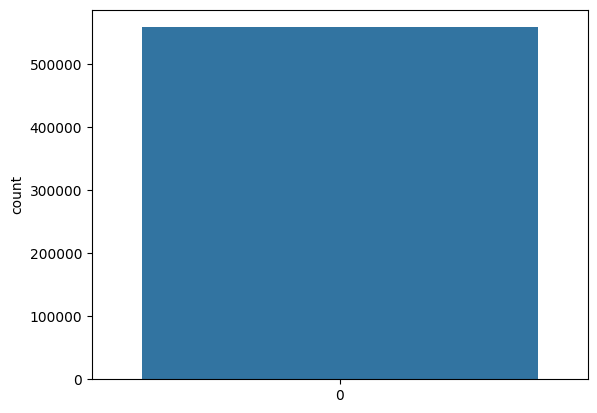

In [ ]:
sns.countplot(target);
target.value_counts()/len(target)

In [ ]:
sns.countplot(td.PotentialFraud);
td.PotentialFraud.value_counts()/len(td)

ValueError: ignored

In [ ]:
sns.set(rc={'figure.figsize':(12,9)})
s=tbd.State.value_counts()/len(tbd)
s=s*100
s=s.reset_index(drop=False)
s.columns=['state','val']
s.state=s.state.astype('string')
sns.barplot(x=s.state,y=s.val,label='states');
plt.xticks(rotation=90);
plt.legend(loc='best');

In [ ]:
#Top states for beneficiaries are 5,10,45,33

In [ ]:
s1=tbd.County.value_counts()/len(tbd)
s1=s1*100
s1

200    2.845781
10     2.588845
20     2.292214
60     2.167355
0      2.148590
         ...   
742    0.000722
117    0.000722
834    0.000722
753    0.000722
521    0.000722
Name: County, Length: 314, dtype: float64

In [ ]:
#Each state has multiple counties. So the cardinality of the counties is high as seen above. we hence do not plot a bar plot here.

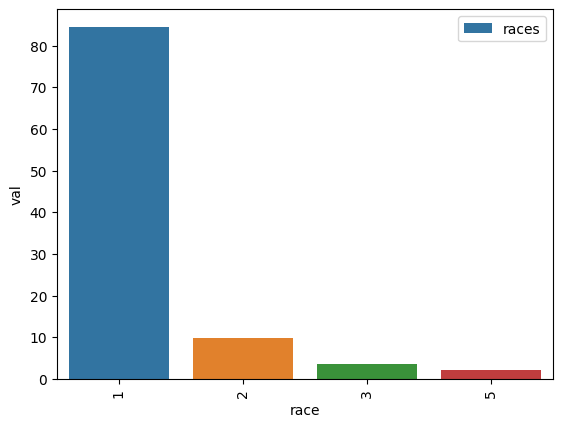

In [ ]:
s2=(tbd.Race.value_counts()/len(tbd))*100
s2=s2.reset_index(drop=False)
s2.columns=['race','val']
s2.race=s2.race.astype('string')
sns.barplot(x=s2.race,y=s2.val,label='races');
plt.xticks(rotation=90);
plt.legend(loc='best');

In [ ]:
# Race 1 is dominant in terms of other races for fraud claims.

In [ ]:
df.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'DOB', 'DOD', 'Gender', 'Race',
       'RenalDiseaseIndicator', 'State', 'County', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCon

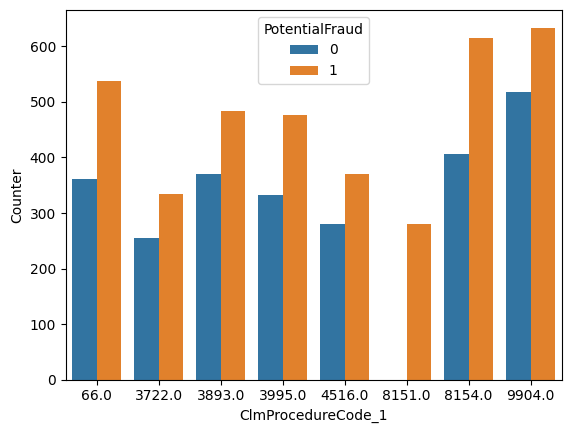

In [ ]:
s4=df['ClmProcedureCode_1'].to_frame('ClmProcedureCode_1')
s4['PotentialFraud']=target
s4=s4[s4['ClmProcedureCode_1'].isnull()==False].reset_index(drop=True)
s4=s4.value_counts().iloc[:15].to_frame('Counter').reset_index(drop=False).sort_values(by='ClmProcedureCode_1',ascending=False).reset_index(drop=True)
sns.barplot(x=s4.ClmProcedureCode_1,y=s4.Counter,hue=s4.PotentialFraud);

In [ ]:
#More potential fraud if claim procedure code exists for the given bene. Codes 9904,8154,66 are top codes for frauds.

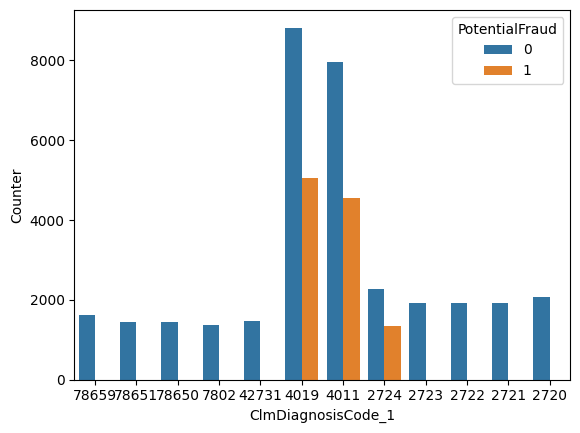

In [ ]:
s5=df['ClmDiagnosisCode_1'].to_frame('ClmDiagnosisCode_1')
s5['PotentialFraud']=target
s5=s5[s5['ClmDiagnosisCode_1'].isnull()==False].reset_index(drop=True)
s5=s5.value_counts().iloc[:15].to_frame('Counter').reset_index(drop=False).sort_values(by='ClmDiagnosisCode_1',ascending=False).reset_index(drop=True)
sns.barplot(x=s5.ClmDiagnosisCode_1,y=s5.Counter,hue=s5.PotentialFraud);

In [ ]:
#Top Codes are 4019,4011,2724 for frauds. Distribution for frauds is given in each code above.

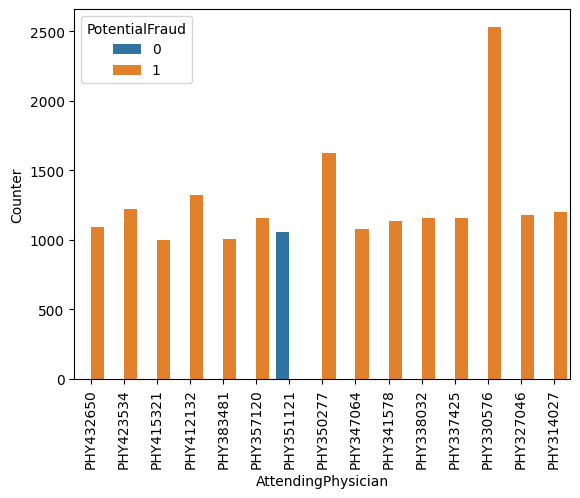

In [ ]:
s6=df['AttendingPhysician'].to_frame('AttendingPhysician')
s6['PotentialFraud']=target
s6=s6[s6['AttendingPhysician'].isnull()==False].reset_index(drop=True)
s6=s6.value_counts().iloc[:15].to_frame('Counter').reset_index(drop=False).sort_values(by='AttendingPhysician',ascending=False).reset_index(drop=True)
sns.barplot(x=s6.AttendingPhysician,y=s6.Counter,hue=s6.PotentialFraud);
plt.xticks(rotation=90);

In [ ]:
# Involvement of all types of physicians likely cause frauds except PHY351121 attending, PHY387900 operating

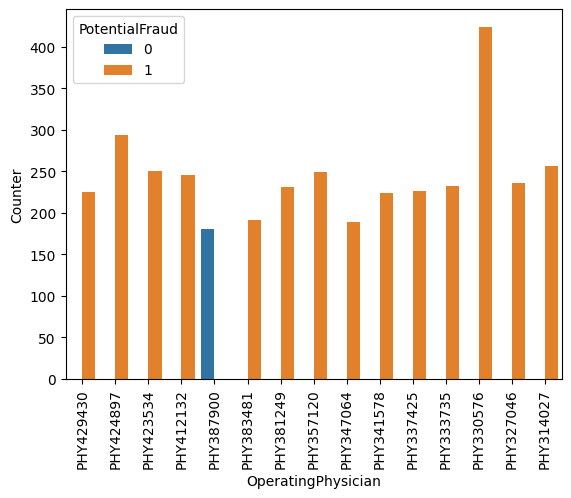

In [ ]:
s7=df['OperatingPhysician'].to_frame('OperatingPhysician')
s7['PotentialFraud']=target
s7=s7[s7['OperatingPhysician'].isnull()==False].reset_index(drop=True)
s7=s7.value_counts().iloc[:15].to_frame('Counter').reset_index(drop=False).sort_values(by='OperatingPhysician',ascending=False).reset_index(drop=True)
sns.barplot(x=s7.OperatingPhysician,y=s7.Counter,hue=s7.PotentialFraud);
plt.xticks(rotation=90);

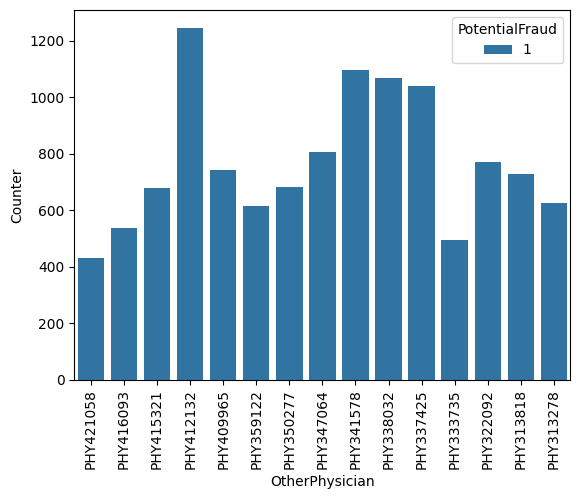

In [ ]:
s8=df['OtherPhysician'].to_frame('OtherPhysician')
s8['PotentialFraud']=target
s8=s8[s8['OtherPhysician'].isnull()==False].reset_index(drop=True)
s8=s8.value_counts().iloc[:15].to_frame('Counter').reset_index(drop=False).sort_values(by='OtherPhysician',ascending=False).reset_index(drop=True)
sns.barplot(x=s8.OtherPhysician,y=s8.Counter,hue=s8.PotentialFraud);
plt.xticks(rotation=90);

In [ ]:
df.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'DOB', 'DOD', 'Gender', 'Race',
       'RenalDiseaseIndicator', 'State', 'County', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCon

In [ ]:
#Amounts columns wrt Potential Frauds

In [ ]:
s9=df[["InscClaimAmtReimbursed",'DeductibleAmtPaid','IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt','OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt']]
s9['PotentialFraud']=target
s9

<ipython-input-73-5a51dd3ef7bb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s9['PotentialFraud']=target


InscClaimAmtReimbursed  DeductibleAmtPaid  IPAnnualReimbursementAmt  \
0                           70                0.0                         0   
1                           50                0.0                         0   
2                           90                0.0                         0   
3                           20                0.0                         0   
4                          300                0.0                         0   
...                        ...                ...                       ...   
558206                      80                0.0                         0   
558207                      80                0.0                         0   
558208                      30                0.0                         0   
558209                     700                0.0                         0   
558210                      50                0.0                         0   

        IPAnnualDeductibleAmt  OPAnnualReimbursementAmt  \
0                           0                       120   
1                           0                       120   
2                           0                      2530   
3                           0                      2530   
4                           0                      2530   
...                       ...                       ...   
558206                      0                      1270   
558207                      0                      1270   
558208                      0                      1270   
558209                      0                      1270   
558210                      0                      1270   

        OPAnnualDeductibleAmt  PotentialFraud  
0                          30               1  
1                          30               1  
2                         540               0  
3                         540               0  
4                         540               1  
...                       ...             ...  
558206                    690               0  
558207                    690               0  
558208                    690               0  
558209                    690               0  
558210                    690               0  

[558211 rows x 7 columns]

<ipython-input-74-bece515447b4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['IPAnnualReimbursementAmt']);


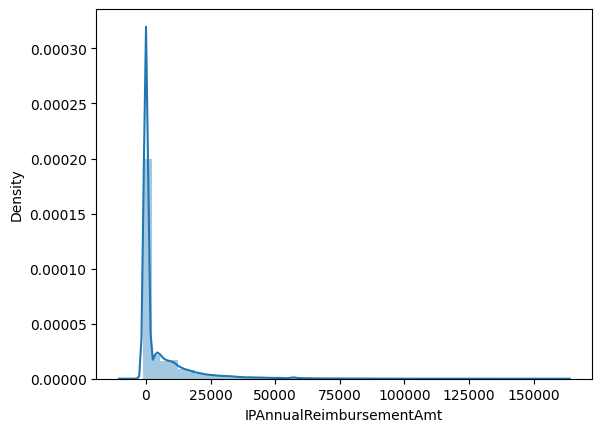

In [ ]:
sns.distplot(df['IPAnnualReimbursementAmt']);

<ipython-input-75-1386236c89eb>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['IPAnnualDeductibleAmt']);


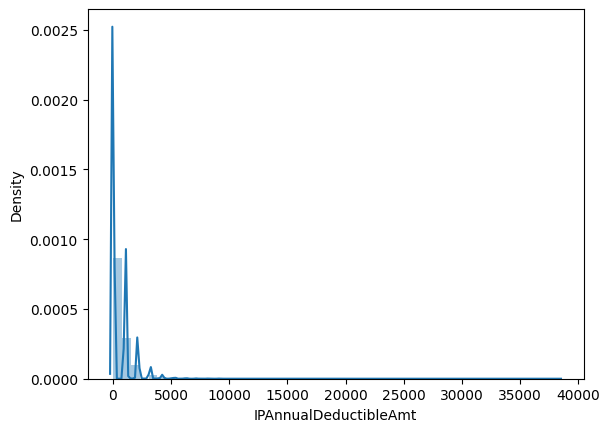

In [ ]:
sns.distplot(df['IPAnnualDeductibleAmt']);

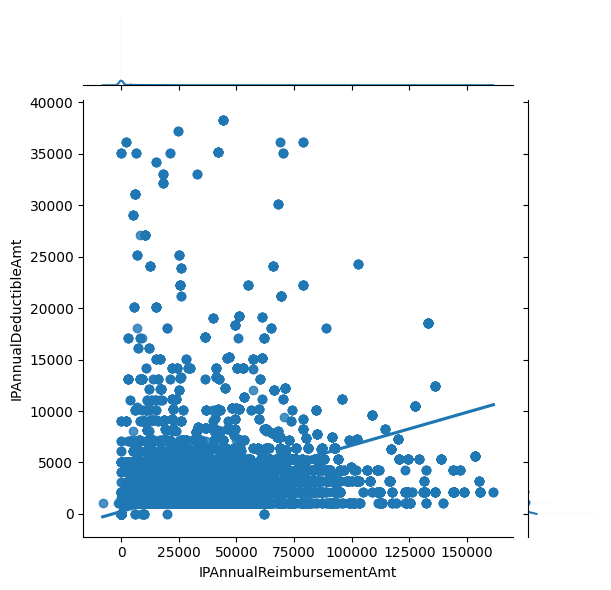

In [ ]:
sns.jointplot(x='IPAnnualReimbursementAmt',y='IPAnnualDeductibleAmt',kind='reg',data=s9);

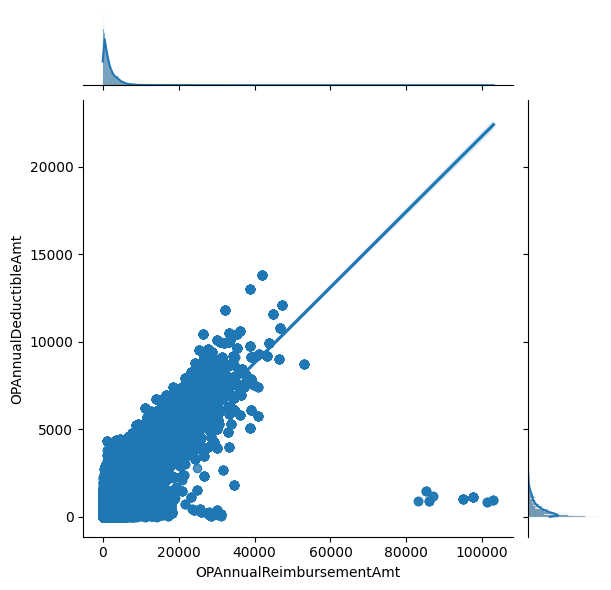

In [ ]:
sns.jointplot(x='OPAnnualReimbursementAmt',y='OPAnnualDeductibleAmt',kind='reg',data=s9);

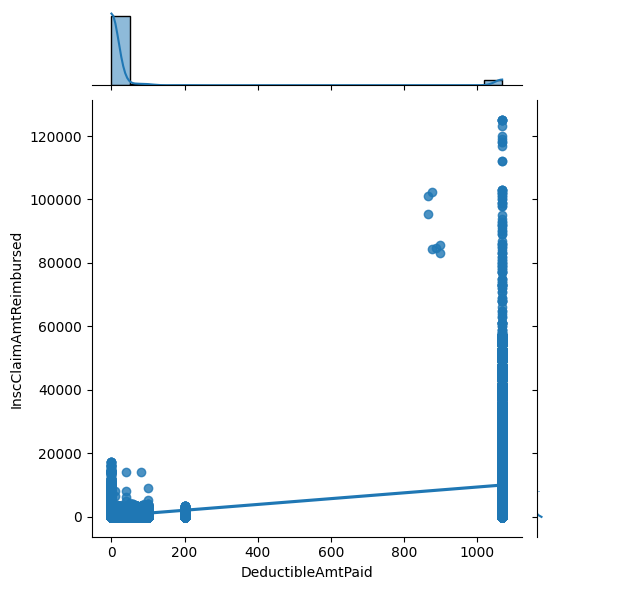

In [ ]:
sns.jointplot(x='DeductibleAmtPaid',y='InscClaimAmtReimbursed',kind='reg',data=s9);

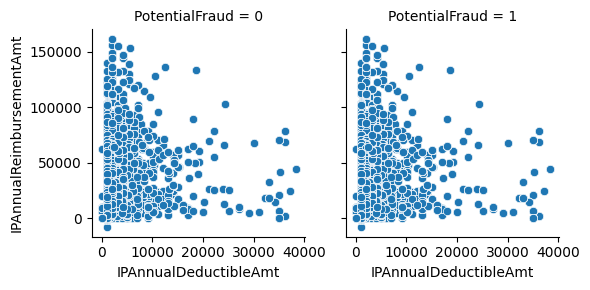

In [ ]:
g=sns.FacetGrid(data=s9,col='PotentialFraud')
g.map(sns.scatterplot,y=s9['IPAnnualReimbursementAmt'],x=s9['IPAnnualDeductibleAmt']);

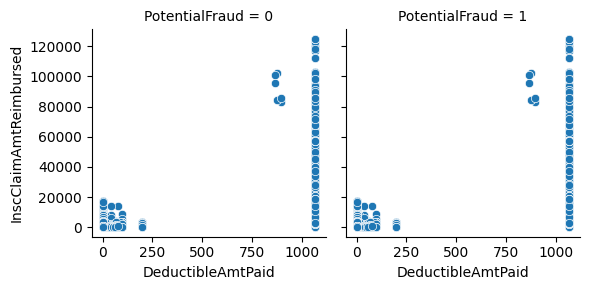

In [ ]:
g=sns.FacetGrid(data=s9,col='PotentialFraud')
g.map(sns.scatterplot,y=s9['InscClaimAmtReimbursed'],x=s9['DeductibleAmtPaid']);

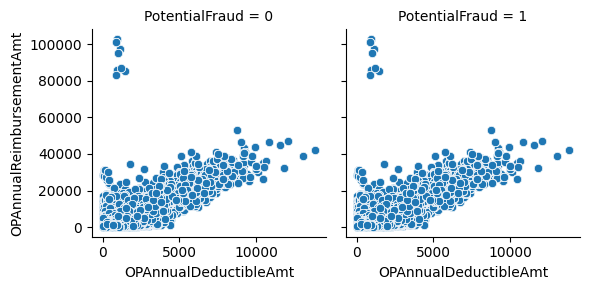

In [ ]:
g=sns.FacetGrid(data=s9,col='PotentialFraud')
g.map(sns.scatterplot,y=s9['OPAnnualReimbursementAmt'],x=s9['OPAnnualDeductibleAmt']);

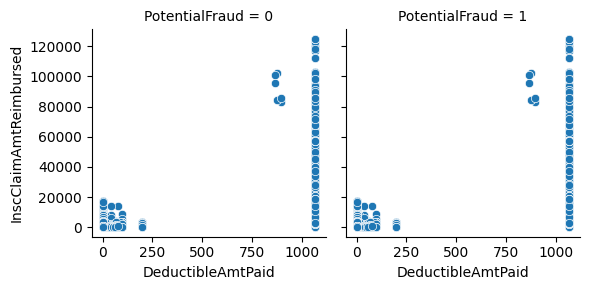

In [ ]:
g=sns.FacetGrid(data=s9,col='PotentialFraud')
g.map(sns.scatterplot,y=s9['InscClaimAmtReimbursed'],x=s9['DeductibleAmtPaid']);

In [ ]:
df.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'DOB', 'DOD', 'Gender', 'Race',
       'RenalDiseaseIndicator', 'State', 'County', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCon

In [ ]:
# Nothing could be analysed as the distributions corresponding to the amounts for inpatient, out patient and in general were same

In [ ]:
# EDA wrt Age the final continuous numeric column

In [ ]:
s9['Age']=df['Age']
l9=s9.columns.tolist()
l9=l9[:-2]+l9[-2:][::-1]
s9=s9[l9]
s9.head()

<ipython-input-86-7f099dcff1ab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s9['Age']=df['Age']


InscClaimAmtReimbursed  DeductibleAmtPaid  IPAnnualReimbursementAmt  \
0                      70                0.0                         0   
1                      50                0.0                         0   
2                      90                0.0                         0   
3                      20                0.0                         0   
4                     300                0.0                         0   

   IPAnnualDeductibleAmt  OPAnnualReimbursementAmt  OPAnnualDeductibleAmt  \
0                      0                       120                     30   
1                      0                       120                     30   
2                      0                      2530                    540   
3                      0                      2530                    540   
4                      0                      2530                    540   

         Age  PotentialFraud  
0  71.802740               1  
1  71.802740               1  
2  70.383562               0  
3  70.383562               0  
4  70.383562               1

In [ ]:
s9['total_amount']= (s9['InscClaimAmtReimbursed']-s9['DeductibleAmtPaid']+s9['IPAnnualReimbursementAmt']-s9['IPAnnualDeductibleAmt']+s9['OPAnnualReimbursementAmt']-s9['OPAnnualDeductibleAmt'])
s9.head()

<ipython-input-87-147d31e7814d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s9['total_amount']= (s9['InscClaimAmtReimbursed']-s9['DeductibleAmtPaid']+s9['IPAnnualReimbursementAmt']-s9['IPAnnualDeductibleAmt']+s9['OPAnnualReimbursementAmt']-s9['OPAnnualDeductibleAmt'])


InscClaimAmtReimbursed  DeductibleAmtPaid  IPAnnualReimbursementAmt  \
0                      70                0.0                         0   
1                      50                0.0                         0   
2                      90                0.0                         0   
3                      20                0.0                         0   
4                     300                0.0                         0   

   IPAnnualDeductibleAmt  OPAnnualReimbursementAmt  OPAnnualDeductibleAmt  \
0                      0                       120                     30   
1                      0                       120                     30   
2                      0                      2530                    540   
3                      0                      2530                    540   
4                      0                      2530                    540   

         Age  PotentialFraud  total_amount  
0  71.802740               1         160.0  
1  71.802740               1         140.0  
2  70.383562               0        2080.0  
3  70.383562               0        2010.0  
4  70.383562               1        2290.0

In [ ]:
s10 = s9[s9['PotentialFraud']==1].reset_index(drop=True)
s10

InscClaimAmtReimbursed  DeductibleAmtPaid  IPAnnualReimbursementAmt  \
0                           70                0.0                         0   
1                           50                0.0                         0   
2                          300                0.0                         0   
3                           60                0.0                         0   
4                          700              100.0                         0   
...                        ...                ...                       ...   
212791                     200                0.0                         0   
212792                    1100                0.0                         0   
212793                     100                0.0                         0   
212794                    1000                0.0                         0   
212795                     500                0.0                         0   

        IPAnnualDeductibleAmt  OPAnnualReimbursementAmt  \
0                           0                       120   
1                           0                       120   
2                           0                      2530   
3                           0                      2530   
4                           0                      2530   
...                       ...                       ...   
212791                      0                      1570   
212792                      0                      1570   
212793                      0                      1600   
212794                      0                      1600   
212795                      0                      1600   

        OPAnnualDeductibleAmt        Age  PotentialFraud  total_amount  
0                          30  71.802740               1         160.0  
1                          30  71.802740               1         140.0  
2                         540  70.383562               1        2290.0  
3                         540  70.383562               1        2050.0  
4                         540  70.383562               1        2590.0  
...                       ...        ...             ...           ...  
212791                    490  80.473973               1        1280.0  
212792                    490  80.473973               1        2180.0  
212793                    320  80.556164               1        1380.0  
212794                    320  80.556164               1        2280.0  
212795                    320  80.556164               1        1780.0  

[212796 rows x 9 columns]

In [ ]:
sns.kdeplot(s9[s9['PotentialFraud']==1]['Age']);
len(s9[s9['PotentialFraud']==1]['Age'])

212796

In [ ]:
pf = s9[s9['PotentialFraud']==1]['Age'].reset_index(drop=True)

In [ ]:
s10[s10['Age']>70]['total_amount'].sum()

1155417278.0

In [ ]:
s10[s10['Age']<=70]['total_amount'].sum()

531683621.0

In [ ]:
# Amounts corresponding to frauds wrt Age

In [ ]:
len(pf[pf>70]), len(pf[pf<=70])

(144088, 68708)

In [ ]:
pf

0         71.802740
1         71.802740
2         70.383562
3         70.383562
4         70.383562
            ...    
212791    80.473973
212792    80.473973
212793    80.556164
212794    80.556164
212795    80.556164
Name: Age, Length: 212796, dtype: float64

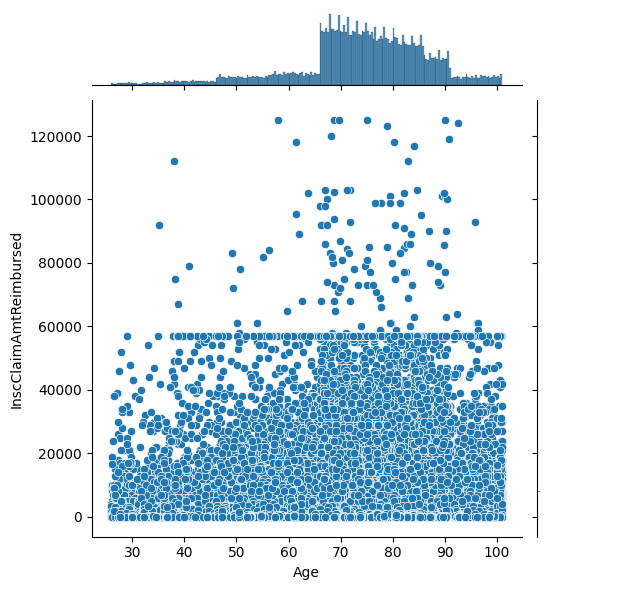

In [ ]:
sns.jointplot(x='Age',y='InscClaimAmtReimbursed',data=s9);

In [ ]:
s10=s9.groupby('PotentialFraud').get_group(1)
s11=s9.groupby('PotentialFraud').get_group(0)

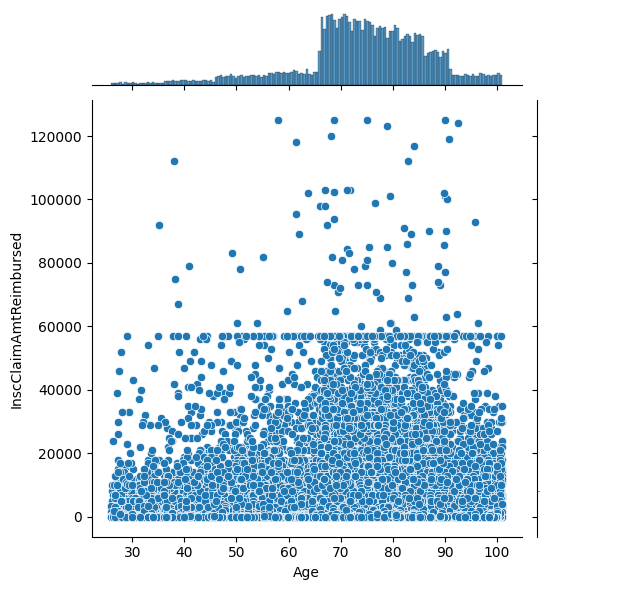

In [ ]:
sns.jointplot(x='Age',y='InscClaimAmtReimbursed',data=s10);

In [ ]:
sns.jointplot(x='Age',y='InscClaimAmtReimbursed',data=s11);

In [ ]:
# Here we can see that even if the distributions are same Age is playing a role in insurance claiming.
# Age between 70-90 has higher fraud claims amount while more fraud claims are made for age 30-70

# Feature Eng and Selection

In [ ]:
df.tail(1)

BeneID    ClaimID ClaimStartDt ClaimEndDt  Provider  \
558210  BENE99999  CLM750563   2009-12-29 2009-12-29  PRV54670   

        InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
558210                      50          PHY359641                NaN   

       OtherPhysician AdmissionDt ClmAdmitDiagnosisCode  DeductibleAmtPaid  \
558210            NaN         NaT                  7224                0.0   

       DischargeDt DiagnosisGroupCode ClmDiagnosisCode_1 ClmDiagnosisCode_2  \
558210         NaT            Missing               7234                NaN   

       ClmDiagnosisCode_3 ClmDiagnosisCode_4 ClmDiagnosisCode_5  \
558210                NaN                NaN                NaN   

       ClmDiagnosisCode_6 ClmDiagnosisCode_7 ClmDiagnosisCode_8  \
558210                NaN                NaN                NaN   

       ClmDiagnosisCode_9 ClmDiagnosisCode_10  ClmProcedureCode_1  \
558210                NaN                 NaN                 NaN   

        ClmProcedureCode_2  ClmProcedureCode_3  ClmProcedureCode_4  \
558210                 NaN                 NaN                 NaN   

        ClmProcedureCode_5  ClmProcedureCode_6        DOB        DOD  Gender  \
558210                 NaN                 NaN 1936-05-01 2009-12-01       2   

        Race  RenalDiseaseIndicator  State  County  NoOfMonths_PartACov  \
558210     1                      0     29     150                   12   

        NoOfMonths_PartBCov  ChronicCond_Alzheimer  ChronicCond_Heartfailure  \
558210                   12                      0                         0   

        ChronicCond_KidneyDisease  ChronicCond_Cancer  \
558210                          0                   1   

        ChronicCond_ObstrPulmonary  ChronicCond_Depression  \
558210                           0                       0   

        ChronicCond_Diabetes  ChronicCond_IschemicHeart  \
558210                     1                          1   

        ChronicCond_Osteoporasis  ChronicCond_rheumatoidarthritis  \
558210                         1                                0   

        ChronicCond_stroke  IPAnnualReimbursementAmt  IPAnnualDeductibleAmt  \
558210                   0                         0                      0   

        OPAnnualReimbursementAmt  OPAnnualDeductibleAmt  Isdead        Age  \
558210                      1270                    690       0  73.635616   

        Days_Hosp  Days_Claim  
558210          1           0

In [ ]:
test_df.tail(1)

BeneID    ClaimID ClaimStartDt ClaimEndDt  Provider  \
135391  BENE99999  CLM487998   2009-07-24 2009-07-24  PRV54663   

        InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
135391                      30          PHY319016                NaN   

       OtherPhysician AdmissionDt ClmAdmitDiagnosisCode  DeductibleAmtPaid  \
135391            NaN         NaT                   NaN                0.0   

       DischargeDt DiagnosisGroupCode ClmDiagnosisCode_1 ClmDiagnosisCode_2  \
135391         NaT            Missing                185               4589   

       ClmDiagnosisCode_3 ClmDiagnosisCode_4 ClmDiagnosisCode_5  \
135391               5968               V725              60000   

       ClmDiagnosisCode_6 ClmDiagnosisCode_7 ClmDiagnosisCode_8  \
135391              79093                NaN                NaN   

       ClmDiagnosisCode_9 ClmDiagnosisCode_10  ClmProcedureCode_1  \
135391                NaN                 NaN                 NaN   

        ClmProcedureCode_2  ClmProcedureCode_3  ClmProcedureCode_4  \
135391                 NaN                 NaN                 NaN   

        ClmProcedureCode_5  ClmProcedureCode_6        DOB        DOD  Gender  \
135391                 NaN                 NaN 1936-05-01 2009-12-01     2.0   

        Race  RenalDiseaseIndicator  State  County  NoOfMonths_PartACov  \
135391   1.0                    0.0   29.0   150.0                 12.0   

        NoOfMonths_PartBCov  ChronicCond_Alzheimer  ChronicCond_Heartfailure  \
135391                 12.0                    0.0                       0.0   

        ChronicCond_KidneyDisease  ChronicCond_Cancer  \
135391                        0.0                 1.0   

        ChronicCond_ObstrPulmonary  ChronicCond_Depression  \
135391                         0.0                     0.0   

        ChronicCond_Diabetes  ChronicCond_IschemicHeart  \
135391                   1.0                        1.0   

        ChronicCond_Osteoporasis  ChronicCond_rheumatoidarthritis  \
135391                       1.0                              0.0   

        ChronicCond_stroke  IPAnnualReimbursementAmt  IPAnnualDeductibleAmt  \
135391                 0.0                       0.0                    0.0   

        OPAnnualReimbursementAmt  OPAnnualDeductibleAmt  Isdead        Age  \
135391                    1270.0                  690.0     0.0  73.635616   

        Days_Hosp  Days_Claim  
135391          1           0

In [ ]:
def agg_wrt_cat_var(df):
    df_Avg_PerProvider_InscClaimAmtReimbursed=df.groupby('Provider').mean()['InscClaimAmtReimbursed'].to_frame('Avg_PerProvider_InscClaimAmtReimbursed').reset_index(drop=False)
    df_Avg_PerProvider_DeductibleAmtPaid=df.groupby('Provider').mean()['DeductibleAmtPaid'].to_frame('Avg_PerProvider_DeductibleAmtPaid').reset_index(drop=False)
    df_Avg_PerProvider_IPAnnualReimbursementAmt=df.groupby('Provider').mean()['IPAnnualReimbursementAmt'].to_frame('Avg_PerProvider_IPAnnualReimbursementAmt').reset_index(drop=False)
    df_Avg_PerProvider_IPAnnualDeductibleAmt=df.groupby('Provider').mean()['IPAnnualDeductibleAmt'].to_frame('Avg_PerProvider_IPAnnualDeductibleAmt').reset_index(drop=False)
    df_Avg_PerProvider_OPAnnualReimbursementAmt=df.groupby('Provider').mean()['OPAnnualReimbursementAmt'].to_frame('Avg_PerProvider_OPAnnualReimbursementAmt').reset_index(drop=False)
    df_Avg_PerProvider_OPAnnualDeductibleAmt=df.groupby('Provider').mean()['OPAnnualDeductibleAmt'].to_frame('Avg_PerProvider_OPAnnualDeductibleAmt').reset_index(drop=False)
    df_Avg_PerProvider_Age=df.groupby('Provider').mean()['Age'].to_frame('Avg_PerProvider_Age').reset_index(drop=False)
    df_Avg_PerProvider_NoOfMonths_PartACov=df.groupby('Provider').mean()['NoOfMonths_PartACov'].to_frame('Avg_PerProvider_NoOfMonths_PartACov').reset_index(drop=False)
    df_Avg_PerProvider_NoOfMonths_PartBCov=df.groupby('Provider').mean()['NoOfMonths_PartBCov'].to_frame('Avg_PerProvider_NoOfMonths_PartBCov').reset_index(drop=False)
    df_Avg_PerProvider_Days_Hosp=df.groupby('Provider').mean()['Days_Hosp'].to_frame('Avg_PerProvider_Days_Hosp').reset_index(drop=False)
    df_Avg_PerProvider_Days_Claim=df.groupby('Provider').mean()['Days_Claim'].to_frame('Avg_PerProvider_Days_Claim').reset_index(drop=False)
    df=pd.merge(df,df_Avg_PerProvider_InscClaimAmtReimbursed,how='left',on='Provider')
    df=pd.merge(df,df_Avg_PerProvider_DeductibleAmtPaid,how='left',on='Provider')
    df=pd.merge(df,df_Avg_PerProvider_IPAnnualReimbursementAmt,how='left',on='Provider')
    df=pd.merge(df,df_Avg_PerProvider_IPAnnualDeductibleAmt,how='left',on='Provider')
    df=pd.merge(df,df_Avg_PerProvider_OPAnnualReimbursementAmt,how='left',on='Provider')
    df=pd.merge(df,df_Avg_PerProvider_OPAnnualDeductibleAmt,how='left',on='Provider')
    df=pd.merge(df,df_Avg_PerProvider_Age,how='left',on='Provider')
    df=pd.merge(df,df_Avg_PerProvider_NoOfMonths_PartACov,how='left',on='Provider')
    df=pd.merge(df,df_Avg_PerProvider_NoOfMonths_PartBCov,how='left',on='Provider')
    df=pd.merge(df,df_Avg_PerProvider_Days_Hosp,how='left',on='Provider')
    df=pd.merge(df,df_Avg_PerProvider_Days_Claim,how='left',on='Provider')
    df_Avg_PerBeneID_InscClaimAmtReimbursed=df.groupby('BeneID').mean()['InscClaimAmtReimbursed'].to_frame('Avg_PerBeneID_InscClaimAmtReimbursed').reset_index(drop=False)
    df_Avg_PerBeneID_DeductibleAmtPaid=df.groupby('BeneID').mean()['DeductibleAmtPaid'].to_frame('Avg_PerBeneID_DeductibleAmtPaid').reset_index(drop=False)
    df_Avg_PerBeneID_IPAnnualReimbursementAmt=df.groupby('BeneID').mean()['IPAnnualReimbursementAmt'].to_frame('Avg_PerBeneID_IPAnnualReimbursementAmt').reset_index(drop=False)
    df_Avg_PerBeneID_IPAnnualDeductibleAmt=df.groupby('BeneID').mean()['IPAnnualDeductibleAmt'].to_frame('Avg_PerBeneID_IPAnnualDeductibleAmt').reset_index(drop=False)
    df_Avg_PerBeneID_OPAnnualReimbursementAmt=df.groupby('BeneID').mean()['OPAnnualReimbursementAmt'].to_frame('Avg_PerBeneID_OPAnnualReimbursementAmt').reset_index(drop=False)
    df_Avg_PerBeneID_OPAnnualDeductibleAmt=df.groupby('BeneID').mean()['OPAnnualDeductibleAmt'].to_frame('Avg_PerBeneID_OPAnnualDeductibleAmt').reset_index(drop=False)
    df_Avg_PerBeneID_Days_Hosp=df.groupby('BeneID').mean()['Days_Hosp'].to_frame('Avg_PerBeneID_Days_Hosp').reset_index(drop=False)
    df_Avg_PerBeneID_Days_Claim=df.groupby('BeneID').mean()['Days_Claim'].to_frame('Avg_PerBeneID_Days_Claim').reset_index(drop=False)
    df=pd.merge(df,df_Avg_PerBeneID_InscClaimAmtReimbursed,how='left',on='BeneID')
    df=pd.merge(df,df_Avg_PerBeneID_DeductibleAmtPaid,how='left',on='BeneID')
    df=pd.merge(df,df_Avg_PerBeneID_IPAnnualReimbursementAmt,how='left',on='BeneID')
    df=pd.merge(df,df_Avg_PerBeneID_IPAnnualDeductibleAmt,how='left',on='BeneID')
    df=pd.merge(df,df_Avg_PerBeneID_OPAnnualReimbursementAmt,how='left',on='BeneID')
    df=pd.merge(df,df_Avg_PerBeneID_OPAnnualDeductibleAmt,how='left',on='BeneID')
    df=pd.merge(df,df_Avg_PerBeneID_Days_Hosp,how='left',on='BeneID')
    df=pd.merge(df,df_Avg_PerBeneID_Days_Claim,how='left',on='BeneID')
    df_Avg_PerAttendingPhysician_InscClaimAmtReimbursed=df.groupby('AttendingPhysician').mean()['InscClaimAmtReimbursed'].to_frame('Avg_PerAttendingPhysician_InscClaimAmtReimbursed').reset_index(drop=False)
    df_Avg_PerAttendingPhysician_DeductibleAmtPaid=df.groupby('AttendingPhysician').mean()['DeductibleAmtPaid'].to_frame('Avg_PerAttendingPhysician_DeductibleAmtPaid').reset_index(drop=False)
    df_Avg_PerAttendingPhysician_IPAnnualReimbursementAmt=df.groupby('AttendingPhysician').mean()['IPAnnualReimbursementAmt'].to_frame('Avg_PerAttendingPhysician_IPAnnualReimbursementAmt').reset_index(drop=False)
    df_Avg_PerAttendingPhysician_IPAnnualDeductibleAmt=df.groupby('AttendingPhysician').mean()['IPAnnualDeductibleAmt'].to_frame('Avg_PerAttendingPhysician_IPAnnualDeductibleAmt').reset_index(drop=False)
    df_Avg_PerAttendingPhysician_OPAnnualReimbursementAmt=df.groupby('AttendingPhysician').mean()['OPAnnualReimbursementAmt'].to_frame('Avg_PerAttendingPhysician_OPAnnualReimbursementAmt').reset_index(drop=False)
    df_Avg_PerAttendingPhysician_OPAnnualDeductibleAmt=df.groupby('AttendingPhysician').mean()['OPAnnualDeductibleAmt'].to_frame('Avg_PerAttendingPhysician_OPAnnualDeductibleAmt').reset_index(drop=False)
    df_Avg_PerAttendingPhysician_Days_Hosp=df.groupby('AttendingPhysician').mean()['Days_Hosp'].to_frame('Avg_PerAttendingPhysician_Days_Hosp').reset_index(drop=False)
    df_Avg_PerAttendingPhysician_Days_Claim=df.groupby('AttendingPhysician').mean()['Days_Claim'].to_frame('Avg_PerAttendingPhysician_Days_Claim').reset_index(drop=False)
    df=pd.merge(df,df_Avg_PerAttendingPhysician_InscClaimAmtReimbursed,how='left',on='AttendingPhysician')
    df=pd.merge(df,df_Avg_PerAttendingPhysician_DeductibleAmtPaid,how='left',on='AttendingPhysician')
    df=pd.merge(df,df_Avg_PerAttendingPhysician_IPAnnualReimbursementAmt,how='left',on='AttendingPhysician')
    df=pd.merge(df,df_Avg_PerAttendingPhysician_IPAnnualDeductibleAmt,how='left',on='AttendingPhysician')
    df=pd.merge(df,df_Avg_PerAttendingPhysician_OPAnnualReimbursementAmt,how='left',on='AttendingPhysician')
    df=pd.merge(df,df_Avg_PerAttendingPhysician_OPAnnualDeductibleAmt,how='left',on='AttendingPhysician')
    df=pd.merge(df,df_Avg_PerAttendingPhysician_Days_Hosp,how='left',on='AttendingPhysician')
    df=pd.merge(df,df_Avg_PerAttendingPhysician_Days_Claim,how='left',on='AttendingPhysician')
    df_Avg_PerOperatingPhysician_InscClaimAmtReimbursed=df.groupby('OperatingPhysician').mean()['InscClaimAmtReimbursed'].to_frame('Avg_PerOperatingPhysician_InscClaimAmtReimbursed').reset_index(drop=False)
    df_Avg_PerOperatingPhysician_DeductibleAmtPaid=df.groupby('OperatingPhysician').mean()['DeductibleAmtPaid'].to_frame('Avg_PerOperatingPhysician_DeductibleAmtPaid').reset_index(drop=False)
    df_Avg_PerOperatingPhysician_IPAnnualReimbursementAmt=df.groupby('OperatingPhysician').mean()['IPAnnualReimbursementAmt'].to_frame('Avg_PerOperatingPhysician_IPAnnualReimbursementAmt').reset_index(drop=False)
    df_Avg_PerOperatingPhysician_IPAnnualDeductibleAmt=df.groupby('OperatingPhysician').mean()['IPAnnualDeductibleAmt'].to_frame('Avg_PerOperatingPhysician_IPAnnualDeductibleAmt').reset_index(drop=False)
    df_Avg_PerOperatingPhysician_OPAnnualReimbursementAmt=df.groupby('OperatingPhysician').mean()['OPAnnualReimbursementAmt'].to_frame('Avg_PerOperatingPhysician_OPAnnualReimbursementAmt').reset_index(drop=False)
    df_Avg_PerOperatingPhysician_OPAnnualDeductibleAmt=df.groupby('OperatingPhysician').mean()['OPAnnualDeductibleAmt'].to_frame('Avg_PerOperatingPhysician_OPAnnualDeductibleAmt').reset_index(drop=False)
    df_Avg_PerOperatingPhysician_Days_Hosp=df.groupby('OperatingPhysician').mean()['Days_Hosp'].to_frame('Avg_PerOperatingPhysician_Days_Hosp').reset_index(drop=False)
    df_Avg_PerOperatingPhysician_Days_Claim=df.groupby('OperatingPhysician').mean()['Days_Claim'].to_frame('Avg_PerOperatingPhysician_Days_Claim').reset_index(drop=False)
    df=pd.merge(df,df_Avg_PerOperatingPhysician_InscClaimAmtReimbursed,how='left',on='OperatingPhysician')
    df=pd.merge(df,df_Avg_PerOperatingPhysician_DeductibleAmtPaid,how='left',on='OperatingPhysician')
    df=pd.merge(df,df_Avg_PerOperatingPhysician_IPAnnualReimbursementAmt,how='left',on='OperatingPhysician')
    df=pd.merge(df,df_Avg_PerOperatingPhysician_IPAnnualDeductibleAmt,how='left',on='OperatingPhysician')
    df=pd.merge(df,df_Avg_PerOperatingPhysician_OPAnnualReimbursementAmt,how='left',on='OperatingPhysician')
    df=pd.merge(df,df_Avg_PerOperatingPhysician_OPAnnualDeductibleAmt,how='left',on='OperatingPhysician')
    df=pd.merge(df,df_Avg_PerOperatingPhysician_Days_Hosp,how='left',on='OperatingPhysician')
    df=pd.merge(df,df_Avg_PerOperatingPhysician_Days_Claim,how='left',on='OperatingPhysician')
    df_Avg_PerOtherPhysician_InscClaimAmtReimbursed=df.groupby('OtherPhysician').mean()['InscClaimAmtReimbursed'].to_frame('Avg_PerOtherPhysician_InscClaimAmtReimbursed').reset_index(drop=False)
    df_Avg_PerOtherPhysician_DeductibleAmtPaid=df.groupby('OtherPhysician').mean()['DeductibleAmtPaid'].to_frame('Avg_PerOtherPhysician_DeductibleAmtPaid').reset_index(drop=False)
    df_Avg_PerOtherPhysician_IPAnnualReimbursementAmt=df.groupby('OtherPhysician').mean()['IPAnnualReimbursementAmt'].to_frame('Avg_PerOtherPhysician_IPAnnualReimbursementAmt').reset_index(drop=False)
    df_Avg_PerOtherPhysician_IPAnnualDeductibleAmt=df.groupby('OtherPhysician').mean()['IPAnnualDeductibleAmt'].to_frame('Avg_PerOtherPhysician_IPAnnualDeductibleAmt').reset_index(drop=False)
    df_Avg_PerOtherPhysician_OPAnnualReimbursementAmt=df.groupby('OtherPhysician').mean()['OPAnnualReimbursementAmt'].to_frame('Avg_PerOtherPhysician_OPAnnualReimbursementAmt').reset_index(drop=False)
    df_Avg_PerOtherPhysician_OPAnnualDeductibleAmt=df.groupby('OtherPhysician').mean()['OPAnnualDeductibleAmt'].to_frame('Avg_PerOtherPhysician_OPAnnualDeductibleAmt').reset_index(drop=False)
    df_Avg_PerOtherPhysician_Days_Hosp=df.groupby('OtherPhysician').mean()['Days_Hosp'].to_frame('Avg_PerOtherPhysician_Days_Hosp').reset_index(drop=False)
    df_Avg_PerOtherPhysician_Days_Claim=df.groupby('OtherPhysician').mean()['Days_Claim'].to_frame('Avg_PerOtherPhysician_Days_Claim').reset_index(drop=False)
    df=pd.merge(df,df_Avg_PerOtherPhysician_InscClaimAmtReimbursed,how='left',on='OtherPhysician')
    df=pd.merge(df,df_Avg_PerOtherPhysician_DeductibleAmtPaid,how='left',on='OtherPhysician')
    df=pd.merge(df,df_Avg_PerOtherPhysician_IPAnnualReimbursementAmt,how='left',on='OtherPhysician')
    df=pd.merge(df,df_Avg_PerOtherPhysician_IPAnnualDeductibleAmt,how='left',on='OtherPhysician')
    df=pd.merge(df,df_Avg_PerOtherPhysician_OPAnnualReimbursementAmt,how='left',on='OtherPhysician')
    df=pd.merge(df,df_Avg_PerOtherPhysician_OPAnnualDeductibleAmt,how='left',on='OtherPhysician')
    df=pd.merge(df,df_Avg_PerOtherPhysician_Days_Hosp,how='left',on='OtherPhysician')
    df=pd.merge(df,df_Avg_PerOtherPhysician_Days_Claim,how='left',on='OtherPhysician')
    df_Avg_PerDiagnosisGroupCode_InscClaimAmtReimbursed=df.groupby('DiagnosisGroupCode').mean()['InscClaimAmtReimbursed'].to_frame('Avg_PerDiagnosisGroupCode_InscClaimAmtReimbursed').reset_index(drop=False)
    df_Avg_PerDiagnosisGroupCode_DeductibleAmtPaid=df.groupby('DiagnosisGroupCode').mean()['DeductibleAmtPaid'].to_frame('Avg_PerDiagnosisGroupCode_DeductibleAmtPaid').reset_index(drop=False)
    df_Avg_PerDiagnosisGroupCode_IPAnnualReimbursementAmt=df.groupby('DiagnosisGroupCode').mean()['IPAnnualReimbursementAmt'].to_frame('Avg_PerDiagnosisGroupCode_IPAnnualReimbursementAmt').reset_index(drop=False)
    df_Avg_PerDiagnosisGroupCode_IPAnnualDeductibleAmt=df.groupby('DiagnosisGroupCode').mean()['IPAnnualDeductibleAmt'].to_frame('Avg_PerDiagnosisGroupCode_IPAnnualDeductibleAmt').reset_index(drop=False)
    df_Avg_PerDiagnosisGroupCode_OPAnnualReimbursementAmt=df.groupby('DiagnosisGroupCode').mean()['OPAnnualReimbursementAmt'].to_frame('Avg_PerDiagnosisGroupCode_OPAnnualReimbursementAmt').reset_index(drop=False)
    df_Avg_PerDiagnosisGroupCode_OPAnnualDeductibleAmt=df.groupby('DiagnosisGroupCode').mean()['OPAnnualDeductibleAmt'].to_frame('Avg_PerDiagnosisGroupCode_OPAnnualDeductibleAmt').reset_index(drop=False)
    df_Avg_PerDiagnosisGroupCode_Days_Hosp=df.groupby('DiagnosisGroupCode').mean()['Days_Hosp'].to_frame('Avg_PerDiagnosisGroupCode_Days_Hosp').reset_index(drop=False)
    df_Avg_PerDiagnosisGroupCode_Days_Claim=df.groupby('DiagnosisGroupCode').mean()['Days_Claim'].to_frame('Avg_PerDiagnosisGroupCode_Days_Claim').reset_index(drop=False)
    df=pd.merge(df,df_Avg_PerDiagnosisGroupCode_InscClaimAmtReimbursed,how='left',on='DiagnosisGroupCode')
    df=pd.merge(df,df_Avg_PerDiagnosisGroupCode_DeductibleAmtPaid,how='left',on='DiagnosisGroupCode')
    df=pd.merge(df,df_Avg_PerDiagnosisGroupCode_IPAnnualReimbursementAmt,how='left',on='DiagnosisGroupCode')
    df=pd.merge(df,df_Avg_PerDiagnosisGroupCode_IPAnnualDeductibleAmt,how='left',on='DiagnosisGroupCode')
    df=pd.merge(df,df_Avg_PerDiagnosisGroupCode_OPAnnualReimbursementAmt,how='left',on='DiagnosisGroupCode')
    df=pd.merge(df,df_Avg_PerDiagnosisGroupCode_OPAnnualDeductibleAmt,how='left',on='DiagnosisGroupCode')
    df=pd.merge(df,df_Avg_PerDiagnosisGroupCode_Days_Hosp,how='left',on='DiagnosisGroupCode')
    df=pd.merge(df,df_Avg_PerDiagnosisGroupCode_Days_Claim,how='left',on='DiagnosisGroupCode')
    df_Avg_PerClmAdmitDiagnosisCode_InscClaimAmtReimbursed=df.groupby('ClmAdmitDiagnosisCode').mean()['InscClaimAmtReimbursed'].to_frame('Avg_PerClmAdmitDiagnosisCode_InscClaimAmtReimbursed').reset_index(drop=False)
    df_Avg_PerClmAdmitDiagnosisCode_DeductibleAmtPaid=df.groupby('ClmAdmitDiagnosisCode').mean()['DeductibleAmtPaid'].to_frame('Avg_PerClmAdmitDiagnosisCode_DeductibleAmtPaid').reset_index(drop=False)
    df_Avg_PerClmAdmitDiagnosisCode_IPAnnualReimbursementAmt=df.groupby('ClmAdmitDiagnosisCode').mean()['IPAnnualReimbursementAmt'].to_frame('Avg_PerClmAdmitDiagnosisCode_IPAnnualReimbursementAmt').reset_index(drop=False)
    df_Avg_PerClmAdmitDiagnosisCode_IPAnnualDeductibleAmt=df.groupby('ClmAdmitDiagnosisCode').mean()['IPAnnualDeductibleAmt'].to_frame('Avg_PerClmAdmitDiagnosisCode_IPAnnualDeductibleAmt').reset_index(drop=False)
    df_Avg_PerClmAdmitDiagnosisCode_OPAnnualReimbursementAmt=df.groupby('ClmAdmitDiagnosisCode').mean()['OPAnnualReimbursementAmt'].to_frame('Avg_PerClmAdmitDiagnosisCode_OPAnnualReimbursementAmt').reset_index(drop=False)
    df_Avg_PerClmAdmitDiagnosisCode_OPAnnualDeductibleAmt=df.groupby('ClmAdmitDiagnosisCode').mean()['OPAnnualDeductibleAmt'].to_frame('Avg_PerClmAdmitDiagnosisCode_OPAnnualDeductibleAmt').reset_index(drop=False)
    df_Avg_PerClmAdmitDiagnosisCode_Days_Hosp=df.groupby('ClmAdmitDiagnosisCode').mean()['Days_Hosp'].to_frame('Avg_PerClmAdmitDiagnosisCode_Days_Hosp').reset_index(drop=False)
    df_Avg_PerClmAdmitDiagnosisCode_Days_Claim=df.groupby('ClmAdmitDiagnosisCode').mean()['Days_Claim'].to_frame('Avg_PerClmAdmitDiagnosisCode_Days_Claim').reset_index(drop=False)
    df=pd.merge(df,df_Avg_PerClmAdmitDiagnosisCode_InscClaimAmtReimbursed,how='left',on='ClmAdmitDiagnosisCode')
    df=pd.merge(df,df_Avg_PerClmAdmitDiagnosisCode_DeductibleAmtPaid,how='left',on='ClmAdmitDiagnosisCode')
    df=pd.merge(df,df_Avg_PerClmAdmitDiagnosisCode_IPAnnualReimbursementAmt,how='left',on='ClmAdmitDiagnosisCode')
    df=pd.merge(df,df_Avg_PerClmAdmitDiagnosisCode_IPAnnualDeductibleAmt,how='left',on='ClmAdmitDiagnosisCode')
    df=pd.merge(df,df_Avg_PerClmAdmitDiagnosisCode_OPAnnualReimbursementAmt,how='left',on='ClmAdmitDiagnosisCode')
    df=pd.merge(df,df_Avg_PerClmAdmitDiagnosisCode_OPAnnualDeductibleAmt,how='left',on='ClmAdmitDiagnosisCode')
    df=pd.merge(df,df_Avg_PerClmAdmitDiagnosisCode_Days_Hosp,how='left',on='ClmAdmitDiagnosisCode')
    df=pd.merge(df,df_Avg_PerClmAdmitDiagnosisCode_Days_Claim,how='left',on='ClmAdmitDiagnosisCode')
    df_Avg_PerClmProcedureCode_1_InscClaimAmtReimbursed=df.groupby('ClmProcedureCode_1').mean()['InscClaimAmtReimbursed'].to_frame('Avg_PerClmProcedureCode_1_InscClaimAmtReimbursed').reset_index(drop=False)
    df_Avg_PerClmProcedureCode_1_DeductibleAmtPaid=df.groupby('ClmProcedureCode_1').mean()['DeductibleAmtPaid'].to_frame('Avg_PerClmProcedureCode_1_DeductibleAmtPaid').reset_index(drop=False)
    df_Avg_PerClmProcedureCode_1_IPAnnualReimbursementAmt=df.groupby('ClmProcedureCode_1').mean()['IPAnnualReimbursementAmt'].to_frame('Avg_PerClmProcedureCode_1_IPAnnualReimbursementAmt').reset_index(drop=False)
    df_Avg_PerClmProcedureCode_1_IPAnnualDeductibleAmt=df.groupby('ClmProcedureCode_1').mean()['IPAnnualDeductibleAmt'].to_frame('Avg_PerClmProcedureCode_1_IPAnnualDeductibleAmt').reset_index(drop=False)
    df_Avg_PerClmProcedureCode_1_OPAnnualReimbursementAmt=df.groupby('ClmProcedureCode_1').mean()['OPAnnualReimbursementAmt'].to_frame('Avg_PerClmProcedureCode_1_OPAnnualReimbursementAmt').reset_index(drop=False)
    df_Avg_PerClmProcedureCode_1_OPAnnualDeductibleAmt=df.groupby('ClmProcedureCode_1').mean()['OPAnnualDeductibleAmt'].to_frame('Avg_PerClmProcedureCode_1_OPAnnualDeductibleAmt').reset_index(drop=False)
    df_Avg_PerClmProcedureCode_1_Days_Hosp=df.groupby('ClmProcedureCode_1').mean()['Days_Hosp'].to_frame('Avg_PerClmProcedureCode_1_Days_Hosp').reset_index(drop=False)
    df_Avg_PerClmProcedureCode_1_Days_Claim=df.groupby('ClmProcedureCode_1').mean()['Days_Claim'].to_frame('Avg_PerClmProcedureCode_1_Days_Claim').reset_index(drop=False)
    df=pd.merge(df,df_Avg_PerClmProcedureCode_1_InscClaimAmtReimbursed,how='left',on='ClmProcedureCode_1')
    df=pd.merge(df,df_Avg_PerClmProcedureCode_1_DeductibleAmtPaid,how='left',on='ClmProcedureCode_1')
    df=pd.merge(df,df_Avg_PerClmProcedureCode_1_IPAnnualReimbursementAmt,how='left',on='ClmProcedureCode_1')
    df=pd.merge(df,df_Avg_PerClmProcedureCode_1_IPAnnualDeductibleAmt,how='left',on='ClmProcedureCode_1')
    df=pd.merge(df,df_Avg_PerClmProcedureCode_1_OPAnnualReimbursementAmt,how='left',on='ClmProcedureCode_1')
    df=pd.merge(df,df_Avg_PerClmProcedureCode_1_OPAnnualDeductibleAmt,how='left',on='ClmProcedureCode_1')
    df=pd.merge(df,df_Avg_PerClmProcedureCode_1_Days_Hosp,how='left',on='ClmProcedureCode_1')
    df=pd.merge(df,df_Avg_PerClmProcedureCode_1_Days_Claim,how='left',on='ClmProcedureCode_1')
    df_Avg_PerClmProcedureCode_2_InscClaimAmtReimbursed=df.groupby('ClmProcedureCode_2').mean()['InscClaimAmtReimbursed'].to_frame('Avg_PerClmProcedureCode_2_InscClaimAmtReimbursed').reset_index(drop=False)
    df_Avg_PerClmProcedureCode_2_DeductibleAmtPaid=df.groupby('ClmProcedureCode_2').mean()['DeductibleAmtPaid'].to_frame('Avg_PerClmProcedureCode_2_DeductibleAmtPaid').reset_index(drop=False)
    df_Avg_PerClmProcedureCode_2_IPAnnualReimbursementAmt=df.groupby('ClmProcedureCode_2').mean()['IPAnnualReimbursementAmt'].to_frame('Avg_PerClmProcedureCode_2_IPAnnualReimbursementAmt').reset_index(drop=False)
    df_Avg_PerClmProcedureCode_2_IPAnnualDeductibleAmt=df.groupby('ClmProcedureCode_2').mean()['IPAnnualDeductibleAmt'].to_frame('Avg_PerClmProcedureCode_2_IPAnnualDeductibleAmt').reset_index(drop=False)
    df_Avg_PerClmProcedureCode_2_OPAnnualReimbursementAmt=df.groupby('ClmProcedureCode_2').mean()['OPAnnualReimbursementAmt'].to_frame('Avg_PerClmProcedureCode_2_OPAnnualReimbursementAmt').reset_index(drop=False)
    df_Avg_PerClmProcedureCode_2_OPAnnualDeductibleAmt=df.groupby('ClmProcedureCode_2').mean()['OPAnnualDeductibleAmt'].to_frame('Avg_PerClmProcedureCode_2_OPAnnualDeductibleAmt').reset_index(drop=False)
    df_Avg_PerClmProcedureCode_2_Days_Hosp=df.groupby('ClmProcedureCode_2').mean()['Days_Hosp'].to_frame('Avg_PerClmProcedureCode_2_Days_Hosp').reset_index(drop=False)
    df_Avg_PerClmProcedureCode_2_Days_Claim=df.groupby('ClmProcedureCode_2').mean()['Days_Claim'].to_frame('Avg_PerClmProcedureCode_2_Days_Claim').reset_index(drop=False)
    df=pd.merge(df,df_Avg_PerClmProcedureCode_2_InscClaimAmtReimbursed,how='left',on='ClmProcedureCode_2')
    df=pd.merge(df,df_Avg_PerClmProcedureCode_2_DeductibleAmtPaid,how='left',on='ClmProcedureCode_2')
    df=pd.merge(df,df_Avg_PerClmProcedureCode_2_IPAnnualReimbursementAmt,how='left',on='ClmProcedureCode_2')
    df=pd.merge(df,df_Avg_PerClmProcedureCode_2_IPAnnualDeductibleAmt,how='left',on='ClmProcedureCode_2')
    df=pd.merge(df,df_Avg_PerClmProcedureCode_2_OPAnnualReimbursementAmt,how='left',on='ClmProcedureCode_2')
    df=pd.merge(df,df_Avg_PerClmProcedureCode_2_OPAnnualDeductibleAmt,how='left',on='ClmProcedureCode_2')
    df=pd.merge(df,df_Avg_PerClmProcedureCode_2_Days_Hosp,how='left',on='ClmProcedureCode_2')
    df=pd.merge(df,df_Avg_PerClmProcedureCode_2_Days_Claim,how='left',on='ClmProcedureCode_2')
    df_Avg_PerClmProcedureCode_3_InscClaimAmtReimbursed=df.groupby('ClmProcedureCode_3').mean()['InscClaimAmtReimbursed'].to_frame('Avg_PerClmProcedureCode_3_InscClaimAmtReimbursed').reset_index(drop=False)
    df_Avg_PerClmProcedureCode_3_DeductibleAmtPaid=df.groupby('ClmProcedureCode_3').mean()['DeductibleAmtPaid'].to_frame('Avg_PerClmProcedureCode_3_DeductibleAmtPaid').reset_index(drop=False)
    df_Avg_PerClmProcedureCode_3_IPAnnualReimbursementAmt=df.groupby('ClmProcedureCode_3').mean()['IPAnnualReimbursementAmt'].to_frame('Avg_PerClmProcedureCode_3_IPAnnualReimbursementAmt').reset_index(drop=False)
    df_Avg_PerClmProcedureCode_3_IPAnnualDeductibleAmt=df.groupby('ClmProcedureCode_3').mean()['IPAnnualDeductibleAmt'].to_frame('Avg_PerClmProcedureCode_3_IPAnnualDeductibleAmt').reset_index(drop=False)
    df_Avg_PerClmProcedureCode_3_OPAnnualReimbursementAmt=df.groupby('ClmProcedureCode_3').mean()['OPAnnualReimbursementAmt'].to_frame('Avg_PerClmProcedureCode_3_OPAnnualReimbursementAmt').reset_index(drop=False)
    df_Avg_PerClmProcedureCode_3_OPAnnualDeductibleAmt=df.groupby('ClmProcedureCode_3').mean()['OPAnnualDeductibleAmt'].to_frame('Avg_PerClmProcedureCode_3_OPAnnualDeductibleAmt').reset_index(drop=False)
    df_Avg_PerClmProcedureCode_3_Days_Hosp=df.groupby('ClmProcedureCode_3').mean()['Days_Hosp'].to_frame('Avg_PerClmProcedureCode_3_Days_Hosp').reset_index(drop=False)
    df_Avg_PerClmProcedureCode_3_Days_Claim=df.groupby('ClmProcedureCode_3').mean()['Days_Claim'].to_frame('Avg_PerClmProcedureCode_3_Days_Claim').reset_index(drop=False)
    df=pd.merge(df,df_Avg_PerClmProcedureCode_3_InscClaimAmtReimbursed,how='left',on='ClmProcedureCode_3')
    df=pd.merge(df,df_Avg_PerClmProcedureCode_3_DeductibleAmtPaid,how='left',on='ClmProcedureCode_3')
    df=pd.merge(df,df_Avg_PerClmProcedureCode_3_IPAnnualReimbursementAmt,how='left',on='ClmProcedureCode_3')
    df=pd.merge(df,df_Avg_PerClmProcedureCode_3_IPAnnualDeductibleAmt,how='left',on='ClmProcedureCode_3')
    df=pd.merge(df,df_Avg_PerClmProcedureCode_3_OPAnnualReimbursementAmt,how='left',on='ClmProcedureCode_3')
    df=pd.merge(df,df_Avg_PerClmProcedureCode_3_OPAnnualDeductibleAmt,how='left',on='ClmProcedureCode_3')
    df=pd.merge(df,df_Avg_PerClmProcedureCode_3_Days_Hosp,how='left',on='ClmProcedureCode_3')
    df=pd.merge(df,df_Avg_PerClmProcedureCode_3_Days_Claim,how='left',on='ClmProcedureCode_3')
    df_Avg_PerClmDiagnosisCode_1_InscClaimAmtReimbursed=df.groupby('ClmDiagnosisCode_1').mean()['InscClaimAmtReimbursed'].to_frame('Avg_PerClmDiagnosisCode_1_InscClaimAmtReimbursed').reset_index(drop=False)
    df_Avg_PerClmDiagnosisCode_1_DeductibleAmtPaid=df.groupby('ClmDiagnosisCode_1').mean()['DeductibleAmtPaid'].to_frame('Avg_PerClmDiagnosisCode_1_DeductibleAmtPaid').reset_index(drop=False)
    df_Avg_PerClmDiagnosisCode_1_IPAnnualReimbursementAmt=df.groupby('ClmDiagnosisCode_1').mean()['IPAnnualReimbursementAmt'].to_frame('Avg_PerClmDiagnosisCode_1_IPAnnualReimbursementAmt').reset_index(drop=False)
    df_Avg_PerClmDiagnosisCode_1_IPAnnualDeductibleAmt=df.groupby('ClmDiagnosisCode_1').mean()['IPAnnualDeductibleAmt'].to_frame('Avg_PerClmDiagnosisCode_1_IPAnnualDeductibleAmt').reset_index(drop=False)
    df_Avg_PerClmDiagnosisCode_1_OPAnnualReimbursementAmt=df.groupby('ClmDiagnosisCode_1').mean()['OPAnnualReimbursementAmt'].to_frame('Avg_PerClmDiagnosisCode_1_OPAnnualReimbursementAmt').reset_index(drop=False)
    df_Avg_PerClmDiagnosisCode_1_OPAnnualDeductibleAmt=df.groupby('ClmDiagnosisCode_1').mean()['OPAnnualDeductibleAmt'].to_frame('Avg_PerClmDiagnosisCode_1_OPAnnualDeductibleAmt').reset_index(drop=False)
    df_Avg_PerClmDiagnosisCode_1_Days_Hosp=df.groupby('ClmDiagnosisCode_1').mean()['Days_Hosp'].to_frame('Avg_PerClmDiagnosisCode_1_Days_Hosp').reset_index(drop=False)
    df_Avg_PerClmDiagnosisCode_1_Days_Claim=df.groupby('ClmDiagnosisCode_1').mean()['Days_Claim'].to_frame('Avg_PerClmDiagnosisCode_1_Days_Claim').reset_index(drop=False)
    df=pd.merge(df,df_Avg_PerClmDiagnosisCode_1_InscClaimAmtReimbursed,how='left',on='ClmDiagnosisCode_1')
    df=pd.merge(df,df_Avg_PerClmDiagnosisCode_1_DeductibleAmtPaid,how='left',on='ClmDiagnosisCode_1')
    df=pd.merge(df,df_Avg_PerClmDiagnosisCode_1_IPAnnualReimbursementAmt,how='left',on='ClmDiagnosisCode_1')
    df=pd.merge(df,df_Avg_PerClmDiagnosisCode_1_IPAnnualDeductibleAmt,how='left',on='ClmDiagnosisCode_1')
    df=pd.merge(df,df_Avg_PerClmDiagnosisCode_1_OPAnnualReimbursementAmt,how='left',on='ClmDiagnosisCode_1')
    df=pd.merge(df,df_Avg_PerClmDiagnosisCode_1_OPAnnualDeductibleAmt,how='left',on='ClmDiagnosisCode_1')
    df=pd.merge(df,df_Avg_PerClmDiagnosisCode_1_Days_Hosp,how='left',on='ClmDiagnosisCode_1')
    df=pd.merge(df,df_Avg_PerClmDiagnosisCode_1_Days_Claim,how='left',on='ClmDiagnosisCode_1')
    df_Avg_PerClmDiagnosisCode_2_InscClaimAmtReimbursed=df.groupby('ClmDiagnosisCode_2').mean()['InscClaimAmtReimbursed'].to_frame('Avg_PerClmDiagnosisCode_2_InscClaimAmtReimbursed').reset_index(drop=False)
    df_Avg_PerClmDiagnosisCode_2_DeductibleAmtPaid=df.groupby('ClmDiagnosisCode_2').mean()['DeductibleAmtPaid'].to_frame('Avg_PerClmDiagnosisCode_2_DeductibleAmtPaid').reset_index(drop=False)
    df_Avg_PerClmDiagnosisCode_2_IPAnnualReimbursementAmt=df.groupby('ClmDiagnosisCode_2').mean()['IPAnnualReimbursementAmt'].to_frame('Avg_PerClmDiagnosisCode_2_IPAnnualReimbursementAmt').reset_index(drop=False)
    df_Avg_PerClmDiagnosisCode_2_IPAnnualDeductibleAmt=df.groupby('ClmDiagnosisCode_2').mean()['IPAnnualDeductibleAmt'].to_frame('Avg_PerClmDiagnosisCode_2_IPAnnualDeductibleAmt').reset_index(drop=False)
    df_Avg_PerClmDiagnosisCode_2_OPAnnualReimbursementAmt=df.groupby('ClmDiagnosisCode_2').mean()['OPAnnualReimbursementAmt'].to_frame('Avg_PerClmDiagnosisCode_2_OPAnnualReimbursementAmt').reset_index(drop=False)
    df_Avg_PerClmDiagnosisCode_2_OPAnnualDeductibleAmt=df.groupby('ClmDiagnosisCode_2').mean()['OPAnnualDeductibleAmt'].to_frame('Avg_PerClmDiagnosisCode_2_OPAnnualDeductibleAmt').reset_index(drop=False)
    df_Avg_PerClmDiagnosisCode_2_Days_Hosp=df.groupby('ClmDiagnosisCode_2').mean()['Days_Hosp'].to_frame('Avg_PerClmDiagnosisCode_2_Days_Hosp').reset_index(drop=False)
    df_Avg_PerClmDiagnosisCode_2_Days_Claim=df.groupby('ClmDiagnosisCode_2').mean()['Days_Claim'].to_frame('Avg_PerClmDiagnosisCode_2_Days_Claim').reset_index(drop=False)
    df=pd.merge(df,df_Avg_PerClmDiagnosisCode_2_InscClaimAmtReimbursed,how='left',on='ClmDiagnosisCode_2')
    df=pd.merge(df,df_Avg_PerClmDiagnosisCode_2_DeductibleAmtPaid,how='left',on='ClmDiagnosisCode_2')
    df=pd.merge(df,df_Avg_PerClmDiagnosisCode_2_IPAnnualReimbursementAmt,how='left',on='ClmDiagnosisCode_2')
    df=pd.merge(df,df_Avg_PerClmDiagnosisCode_2_IPAnnualDeductibleAmt,how='left',on='ClmDiagnosisCode_2')
    df=pd.merge(df,df_Avg_PerClmDiagnosisCode_2_OPAnnualReimbursementAmt,how='left',on='ClmDiagnosisCode_2')
    df=pd.merge(df,df_Avg_PerClmDiagnosisCode_2_OPAnnualDeductibleAmt,how='left',on='ClmDiagnosisCode_2')
    df=pd.merge(df,df_Avg_PerClmDiagnosisCode_2_Days_Hosp,how='left',on='ClmDiagnosisCode_2')
    df=pd.merge(df,df_Avg_PerClmDiagnosisCode_2_Days_Claim,how='left',on='ClmDiagnosisCode_2')
    df_Avg_PerClmDiagnosisCode_3_InscClaimAmtReimbursed=df.groupby('ClmDiagnosisCode_3').mean()['InscClaimAmtReimbursed'].to_frame('Avg_PerClmDiagnosisCode_3_InscClaimAmtReimbursed').reset_index(drop=False)
    df_Avg_PerClmDiagnosisCode_3_DeductibleAmtPaid=df.groupby('ClmDiagnosisCode_3').mean()['DeductibleAmtPaid'].to_frame('Avg_PerClmDiagnosisCode_3_DeductibleAmtPaid').reset_index(drop=False)
    df_Avg_PerClmDiagnosisCode_3_IPAnnualReimbursementAmt=df.groupby('ClmDiagnosisCode_3').mean()['IPAnnualReimbursementAmt'].to_frame('Avg_PerClmDiagnosisCode_3_IPAnnualReimbursementAmt').reset_index(drop=False)
    df_Avg_PerClmDiagnosisCode_3_IPAnnualDeductibleAmt=df.groupby('ClmDiagnosisCode_3').mean()['IPAnnualDeductibleAmt'].to_frame('Avg_PerClmDiagnosisCode_3_IPAnnualDeductibleAmt').reset_index(drop=False)
    df_Avg_PerClmDiagnosisCode_3_OPAnnualReimbursementAmt=df.groupby('ClmDiagnosisCode_3').mean()['OPAnnualReimbursementAmt'].to_frame('Avg_PerClmDiagnosisCode_3_OPAnnualReimbursementAmt').reset_index(drop=False)
    df_Avg_PerClmDiagnosisCode_3_OPAnnualDeductibleAmt=df.groupby('ClmDiagnosisCode_3').mean()['OPAnnualDeductibleAmt'].to_frame('Avg_PerClmDiagnosisCode_3_OPAnnualDeductibleAmt').reset_index(drop=False)
    df_Avg_PerClmDiagnosisCode_3_Days_Hosp=df.groupby('ClmDiagnosisCode_3').mean()['Days_Hosp'].to_frame('Avg_PerClmDiagnosisCode_3_Days_Hosp').reset_index(drop=False)
    df_Avg_PerClmDiagnosisCode_3_Days_Claim=df.groupby('ClmDiagnosisCode_3').mean()['Days_Claim'].to_frame('Avg_PerClmDiagnosisCode_3_Days_Claim').reset_index(drop=False)
    df=pd.merge(df,df_Avg_PerClmDiagnosisCode_3_InscClaimAmtReimbursed,how='left',on='ClmDiagnosisCode_3')
    df=pd.merge(df,df_Avg_PerClmDiagnosisCode_3_DeductibleAmtPaid,how='left',on='ClmDiagnosisCode_3')
    df=pd.merge(df,df_Avg_PerClmDiagnosisCode_3_IPAnnualReimbursementAmt,how='left',on='ClmDiagnosisCode_3')
    df=pd.merge(df,df_Avg_PerClmDiagnosisCode_3_IPAnnualDeductibleAmt,how='left',on='ClmDiagnosisCode_3')
    df=pd.merge(df,df_Avg_PerClmDiagnosisCode_3_OPAnnualReimbursementAmt,how='left',on='ClmDiagnosisCode_3')
    df=pd.merge(df,df_Avg_PerClmDiagnosisCode_3_OPAnnualDeductibleAmt,how='left',on='ClmDiagnosisCode_3')
    df=pd.merge(df,df_Avg_PerClmDiagnosisCode_3_Days_Hosp,how='left',on='ClmDiagnosisCode_3')
    df=pd.merge(df,df_Avg_PerClmDiagnosisCode_3_Days_Claim,how='left',on='ClmDiagnosisCode_3')
    df_Avg_PerClmDiagnosisCode_4_InscClaimAmtReimbursed=df.groupby('ClmDiagnosisCode_4').mean()['InscClaimAmtReimbursed'].to_frame('Avg_PerClmDiagnosisCode_4_InscClaimAmtReimbursed').reset_index(drop=False)
    df_Avg_PerClmDiagnosisCode_4_DeductibleAmtPaid=df.groupby('ClmDiagnosisCode_4').mean()['DeductibleAmtPaid'].to_frame('Avg_PerClmDiagnosisCode_4_DeductibleAmtPaid').reset_index(drop=False)
    df_Avg_PerClmDiagnosisCode_4_IPAnnualReimbursementAmt=df.groupby('ClmDiagnosisCode_4').mean()['IPAnnualReimbursementAmt'].to_frame('Avg_PerClmDiagnosisCode_4_IPAnnualReimbursementAmt').reset_index(drop=False)
    df_Avg_PerClmDiagnosisCode_4_IPAnnualDeductibleAmt=df.groupby('ClmDiagnosisCode_4').mean()['IPAnnualDeductibleAmt'].to_frame('Avg_PerClmDiagnosisCode_4_IPAnnualDeductibleAmt').reset_index(drop=False)
    df_Avg_PerClmDiagnosisCode_4_OPAnnualReimbursementAmt=df.groupby('ClmDiagnosisCode_4').mean()['OPAnnualReimbursementAmt'].to_frame('Avg_PerClmDiagnosisCode_4_OPAnnualReimbursementAmt').reset_index(drop=False)
    df_Avg_PerClmDiagnosisCode_4_OPAnnualDeductibleAmt=df.groupby('ClmDiagnosisCode_4').mean()['OPAnnualDeductibleAmt'].to_frame('Avg_PerClmDiagnosisCode_4_OPAnnualDeductibleAmt').reset_index(drop=False)
    df_Avg_PerClmDiagnosisCode_4_Days_Hosp=df.groupby('ClmDiagnosisCode_4').mean()['Days_Hosp'].to_frame('Avg_PerClmDiagnosisCode_4_Days_Hosp').reset_index(drop=False)
    df_Avg_PerClmDiagnosisCode_4_Days_Claim=df.groupby('ClmDiagnosisCode_4').mean()['Days_Claim'].to_frame('Avg_PerClmDiagnosisCode_4_Days_Claim').reset_index(drop=False)
    df=pd.merge(df,df_Avg_PerClmDiagnosisCode_4_InscClaimAmtReimbursed,how='left',on='ClmDiagnosisCode_4')
    df=pd.merge(df,df_Avg_PerClmDiagnosisCode_4_DeductibleAmtPaid,how='left',on='ClmDiagnosisCode_4')
    df=pd.merge(df,df_Avg_PerClmDiagnosisCode_4_IPAnnualReimbursementAmt,how='left',on='ClmDiagnosisCode_4')
    df=pd.merge(df,df_Avg_PerClmDiagnosisCode_4_IPAnnualDeductibleAmt,how='left',on='ClmDiagnosisCode_4')
    df=pd.merge(df,df_Avg_PerClmDiagnosisCode_4_OPAnnualReimbursementAmt,how='left',on='ClmDiagnosisCode_4')
    df=pd.merge(df,df_Avg_PerClmDiagnosisCode_4_OPAnnualDeductibleAmt,how='left',on='ClmDiagnosisCode_4')
    df=pd.merge(df,df_Avg_PerClmDiagnosisCode_4_Days_Hosp,how='left',on='ClmDiagnosisCode_4')
    df=pd.merge(df,df_Avg_PerClmDiagnosisCode_4_Days_Claim,how='left',on='ClmDiagnosisCode_4')
    df_Provider_ClaimID_Count=df.groupby('Provider')['ClaimID'].count().to_frame('Provider_ClaimID_Count').reset_index(drop=False)
    df_Provider_BeneID_ClaimID_Count=df.groupby(['Provider','BeneID'])['ClaimID'].count().reset_index(drop=False).rename(columns={'ClaimID':'Provider_BeneID_ClaimID_count'})
    df_Provider_AttendingPhysician_ClaimID_Count=df.groupby(['Provider','AttendingPhysician'])['ClaimID'].count().reset_index(drop=False).rename(columns={'ClaimID':'Provider_AttendingPhysician_ClaimID_Count'})
    df_Provider_OperatingPhysician_ClaimID_Count=df.groupby(['Provider','OperatingPhysician'])['ClaimID'].count().reset_index(drop=False).rename(columns={'ClaimID':'Provider_OperatingPhysician_ClaimID_Count'})
    df_Provider_OtherPhysician_ClaimID_Count=df.groupby(['Provider','OtherPhysician'])['ClaimID'].count().reset_index(drop=False).rename(columns={'ClaimID':'Provider_OtherPhysician_ClaimID_Count'})
    df_Provider_ClmAdmitDiagnosisCode_ClaimID_Count=df.groupby(['Provider','ClmAdmitDiagnosisCode'])['ClaimID'].count().reset_index(drop=False).rename(columns={'ClaimID':'Provider_ClmAdmitDiagnosisCode_ClaimID_Count'})
    df_Provider_ClmProcedureCode_1_ClaimID_Count=df.groupby(['Provider','ClmProcedureCode_1'])['ClaimID'].count().reset_index(drop=False).rename(columns={'ClaimID':'Provider_ClmProcedureCode_1_ClaimID_Count'})
    df_Provider_ClmProcedureCode_2_ClaimID_Count=df.groupby(['Provider','ClmProcedureCode_2'])['ClaimID'].count().reset_index(drop=False).rename(columns={'ClaimID':'Provider_ClmProcedureCode_2_ClaimID_Count'})
    df_Provider_ClmProcedureCode_3_ClaimID_Count=df.groupby(['Provider','ClmProcedureCode_3'])['ClaimID'].count().reset_index(drop=False).rename(columns={'ClaimID':'Provider_ClmProcedureCode_3_ClaimID_Count'})
    df_Provider_ClmProcedureCode_4_ClaimID_Count=df.groupby(['Provider','ClmProcedureCode_4'])['ClaimID'].count().reset_index(drop=False).rename(columns={'ClaimID':'Provider_ClmProcedureCode_4_ClaimID_Count'})
    df_Provider_ClmProcedureCode_5_ClaimID_Count=df.groupby(['Provider','ClmProcedureCode_5'])['ClaimID'].count().reset_index(drop=False).rename(columns={'ClaimID':'Provider_ClmProcedureCode_5_ClaimID_Count'})
    df_Provider_ClmDiagnosisCode_1_ClaimID_Count=df.groupby(['Provider','ClmDiagnosisCode_1'])['ClaimID'].count().reset_index(drop=False).rename(columns={'ClaimID':'Provider_ClmDiagnosisCode_1_ClaimID_Count'})
    df_Provider_ClmDiagnosisCode_2_ClaimID_Count=df.groupby(['Provider','ClmDiagnosisCode_2'])['ClaimID'].count().reset_index(drop=False).rename(columns={'ClaimID':'Provider_ClmDiagnosisCode_2_ClaimID_Count'})
    df_Provider_ClmDiagnosisCode_3_ClaimID_Count=df.groupby(['Provider','ClmDiagnosisCode_3'])['ClaimID'].count().reset_index(drop=False).rename(columns={'ClaimID':'Provider_ClmDiagnosisCode_3_ClaimID_Count'})
    df_Provider_ClmDiagnosisCode_4_ClaimID_Count=df.groupby(['Provider','ClmDiagnosisCode_4'])['ClaimID'].count().reset_index(drop=False).rename(columns={'ClaimID':'Provider_ClmDiagnosisCode_4_ClaimID_Count'})
    df_Provider_ClmDiagnosisCode_5_ClaimID_Count=df.groupby(['Provider','ClmDiagnosisCode_5'])['ClaimID'].count().reset_index(drop=False).rename(columns={'ClaimID':'Provider_ClmDiagnosisCode_5_ClaimID_Count'})
    df_Provider_ClmDiagnosisCode_6_ClaimID_Count=df.groupby(['Provider','ClmDiagnosisCode_6'])['ClaimID'].count().reset_index(drop=False).rename(columns={'ClaimID':'Provider_ClmDiagnosisCode_6_ClaimID_Count'})
    df_Provider_ClmDiagnosisCode_7_ClaimID_Count=df.groupby(['Provider','ClmDiagnosisCode_7'])['ClaimID'].count().reset_index(drop=False).rename(columns={'ClaimID':'Provider_ClmDiagnosisCode_7_ClaimID_Count'})
    df_Provider_ClmDiagnosisCode_8_ClaimID_Count=df.groupby(['Provider','ClmDiagnosisCode_8'])['ClaimID'].count().reset_index(drop=False).rename(columns={'ClaimID':'Provider_ClmDiagnosisCode_8_ClaimID_Count'})
    df_Provider_ClmDiagnosisCode_9_ClaimID_Count=df.groupby(['Provider','ClmDiagnosisCode_9'])['ClaimID'].count().reset_index(drop=False).rename(columns={'ClaimID':'Provider_ClmDiagnosisCode_9_ClaimID_Count'})
    df_Provider_ClmDiagnosisCode_10_ClaimID_Count=df.groupby(['Provider','ClmDiagnosisCode_10'])['ClaimID'].count().reset_index(drop=False).rename(columns={'ClaimID':'Provider_ClmDiagnosisCode_10_ClaimID_Count'})
    df_Provider_DiagnosisGroupCode_ClaimID_Count=df.groupby(['Provider','DiagnosisGroupCode'])['ClaimID'].count().reset_index(drop=False).rename(columns={'ClaimID':'Provider_DiagnosisGroupCode_ClaimID_Count'})
    df=pd.merge(df,df_Provider_ClaimID_Count,how='left',on='Provider')
    df=pd.merge(df,df_Provider_BeneID_ClaimID_Count,how='left',on=['Provider','BeneID'])
    df=pd.merge(df,df_Provider_AttendingPhysician_ClaimID_Count,how='left',on=['Provider','AttendingPhysician'])
    df=pd.merge(df,df_Provider_OperatingPhysician_ClaimID_Count,how='left',on=['Provider','OperatingPhysician'])
    df=pd.merge(df,df_Provider_OtherPhysician_ClaimID_Count,how='left',on=['Provider','OtherPhysician'])
    df=pd.merge(df,df_Provider_ClmAdmitDiagnosisCode_ClaimID_Count,how='left',on=['Provider','ClmAdmitDiagnosisCode'])
    df=pd.merge(df,df_Provider_ClmProcedureCode_1_ClaimID_Count,how='left',on=['Provider','ClmProcedureCode_1'])
    df=pd.merge(df,df_Provider_ClmProcedureCode_2_ClaimID_Count,how='left',on=['Provider','ClmProcedureCode_2'])
    df=pd.merge(df,df_Provider_ClmProcedureCode_3_ClaimID_Count,how='left',on=['Provider','ClmProcedureCode_3'])
    df=pd.merge(df,df_Provider_ClmProcedureCode_4_ClaimID_Count,how='left',on=['Provider','ClmProcedureCode_4'])
    df=pd.merge(df,df_Provider_ClmProcedureCode_5_ClaimID_Count,how='left',on=['Provider','ClmProcedureCode_5'])
    df=pd.merge(df,df_Provider_ClmDiagnosisCode_1_ClaimID_Count,how='left',on=['Provider','ClmDiagnosisCode_1'])
    df=pd.merge(df,df_Provider_ClmDiagnosisCode_2_ClaimID_Count,how='left',on=['Provider','ClmDiagnosisCode_2'])
    df=pd.merge(df,df_Provider_ClmDiagnosisCode_3_ClaimID_Count,how='left',on=['Provider','ClmDiagnosisCode_3'])
    df=pd.merge(df,df_Provider_ClmDiagnosisCode_4_ClaimID_Count,how='left',on=['Provider','ClmDiagnosisCode_4'])
    df=pd.merge(df,df_Provider_ClmDiagnosisCode_5_ClaimID_Count,how='left',on=['Provider','ClmDiagnosisCode_5'])
    df=pd.merge(df,df_Provider_ClmDiagnosisCode_6_ClaimID_Count,how='left',on=['Provider','ClmDiagnosisCode_6'])
    df=pd.merge(df,df_Provider_ClmDiagnosisCode_7_ClaimID_Count,how='left',on=['Provider','ClmDiagnosisCode_7'])
    df=pd.merge(df,df_Provider_ClmDiagnosisCode_8_ClaimID_Count,how='left',on=['Provider','ClmDiagnosisCode_8'])
    df=pd.merge(df,df_Provider_ClmDiagnosisCode_9_ClaimID_Count,how='left',on=['Provider','ClmDiagnosisCode_9'])
    df=pd.merge(df,df_Provider_ClmDiagnosisCode_10_ClaimID_Count,how='left',on=['Provider','ClmDiagnosisCode_10'])
    df=pd.merge(df,df_Provider_DiagnosisGroupCode_ClaimID_Count,how='left',on=['Provider','DiagnosisGroupCode'])
    df_Provider_BeneID_AttendingPhysician_ClaimID_Count=df.groupby(['Provider','BeneID',"AttendingPhysician"])['ClaimID'].count().reset_index(drop=False).rename(columns={'ClaimID':'Provider_BeneID_AttendingPhysician_ClaimID_count'})
    df_Provider_BeneID_OperatingPhysician_ClaimID_Count=df.groupby(['Provider','BeneID','OperatingPhysician'])['ClaimID'].count().reset_index(drop=False).rename(columns={'ClaimID':'Provider_BeneID_OperatingPhysician_ClaimID_Count'})
    df_Provider_BeneID_OtherPhysician_ClaimID_Count=df.groupby(['Provider','BeneID','OtherPhysician'])['ClaimID'].count().reset_index(drop=False).rename(columns={'ClaimID':'Provider_BeneID_OtherPhysician_ClaimID_Count'})
    df_Provider_BeneID_ClmAdmitDiagnosisCode_ClaimID_Count=df.groupby(['Provider','BeneID','ClmAdmitDiagnosisCode'])['ClaimID'].count().reset_index(drop=False).rename(columns={'ClaimID':'Provider_BeneID_ClmAdmitDiagnosisCode_ClaimID_Count'})
    df_Provider_BeneID_ClmProcedureCode_1_ClaimID_Count=df.groupby(['Provider','BeneID','ClmProcedureCode_1'])['ClaimID'].count().reset_index(drop=False).rename(columns={'ClaimID':'Provider_BeneID_ClmProcedureCode_1_ClaimID_Count'})
    df_Provider_BeneID_ClmProcedureCode_2_ClaimID_Count=df.groupby(['Provider','BeneID','ClmProcedureCode_2'])['ClaimID'].count().reset_index(drop=False).rename(columns={'ClaimID':'Provider_BeneID_ClmProcedureCode_2_ClaimID_Count'})
    df_Provider_BeneID_ClmProcedureCode_3_ClaimID_Count=df.groupby(['Provider','BeneID','ClmProcedureCode_3'])['ClaimID'].count().reset_index(drop=False).rename(columns={'ClaimID':'Provider_BeneID_ClmProcedureCode_3_ClaimID_Count'})
    df_Provider_BeneID_ClmProcedureCode_4_ClaimID_Count=df.groupby(['Provider','BeneID','ClmProcedureCode_4'])['ClaimID'].count().reset_index(drop=False).rename(columns={'ClaimID':'Provider_BeneID_ClmProcedureCode_4_ClaimID_Count'})
    df_Provider_BeneID_ClmProcedureCode_5_ClaimID_Count=df.groupby(['Provider','BeneID','ClmProcedureCode_5'])['ClaimID'].count().reset_index(drop=False).rename(columns={'ClaimID':'Provider_BeneID_ClmProcedureCode_5_ClaimID_Count'})
    df_Provider_BeneID_ClmDiagnosisCode_1_ClaimID_Count=df.groupby(['Provider','BeneID','ClmDiagnosisCode_1'])['ClaimID'].count().reset_index(drop=False).rename(columns={'ClaimID':'Provider_BeneID_ClmDiagnosisCode_1_ClaimID_Count'})
    df_Provider_BeneID_ClmDiagnosisCode_2_ClaimID_Count=df.groupby(['Provider','BeneID','ClmDiagnosisCode_2'])['ClaimID'].count().reset_index(drop=False).rename(columns={'ClaimID':'Provider_BeneID_ClmDiagnosisCode_2_ClaimID_Count'})
    df_Provider_BeneID_ClmDiagnosisCode_3_ClaimID_Count=df.groupby(['Provider','BeneID','ClmDiagnosisCode_3'])['ClaimID'].count().reset_index(drop=False).rename(columns={'ClaimID':'Provider_BeneID_ClmDiagnosisCode_3_ClaimID_Count'})
    df_Provider_BeneID_ClmDiagnosisCode_4_ClaimID_Count=df.groupby(['Provider','BeneID','ClmDiagnosisCode_4'])['ClaimID'].count().reset_index(drop=False).rename(columns={'ClaimID':'Provider_BeneID_ClmDiagnosisCode_4_ClaimID_Count'})
    df_Provider_BeneID_ClmDiagnosisCode_5_ClaimID_Count=df.groupby(['Provider','BeneID','ClmDiagnosisCode_5'])['ClaimID'].count().reset_index(drop=False).rename(columns={'ClaimID':'Provider_BeneID_ClmDiagnosisCode_5_ClaimID_Count'})
    df_Provider_BeneID_ClmDiagnosisCode_6_ClaimID_Count=df.groupby(['Provider','BeneID','ClmDiagnosisCode_6'])['ClaimID'].count().reset_index(drop=False).rename(columns={'ClaimID':'Provider_BeneID_ClmDiagnosisCode_6_ClaimID_Count'})
    df_Provider_BeneID_ClmDiagnosisCode_7_ClaimID_Count=df.groupby(['Provider','BeneID','ClmDiagnosisCode_7'])['ClaimID'].count().reset_index(drop=False).rename(columns={'ClaimID':'Provider_BeneID_ClmDiagnosisCode_7_ClaimID_Count'})
    df_Provider_BeneID_ClmDiagnosisCode_8_ClaimID_Count=df.groupby(['Provider','BeneID','ClmDiagnosisCode_8'])['ClaimID'].count().reset_index(drop=False).rename(columns={'ClaimID':'Provider_BeneID_ClmDiagnosisCode_8_ClaimID_Count'})
    df_Provider_BeneID_ClmDiagnosisCode_9_ClaimID_Count=df.groupby(['Provider','BeneID','ClmDiagnosisCode_9'])['ClaimID'].count().reset_index(drop=False).rename(columns={'ClaimID':'Provider_BeneID_ClmDiagnosisCode_9_ClaimID_Count'})
    df_Provider_BeneID_ClmDiagnosisCode_10_ClaimID_Count=df.groupby(['Provider','BeneID','ClmDiagnosisCode_10'])['ClaimID'].count().reset_index(drop=False).rename(columns={'ClaimID':'Provider_BeneID_ClmDiagnosisCode_10_ClaimID_Count'})
    df_Provider_BeneID_DiagnosisGroupCode_ClaimID_Count=df.groupby(['Provider','BeneID','DiagnosisGroupCode'])['ClaimID'].count().reset_index(drop=False).rename(columns={'ClaimID':'Provider_BeneID_DiagnosisGroupCode_ClaimID_Count'})
    df=pd.merge(df,df_Provider_BeneID_AttendingPhysician_ClaimID_Count,how='left',on=['Provider','BeneID','AttendingPhysician'])
    df=pd.merge(df,df_Provider_BeneID_OperatingPhysician_ClaimID_Count,how='left',on=['Provider','BeneID','OperatingPhysician'])
    df=pd.merge(df,df_Provider_BeneID_OtherPhysician_ClaimID_Count,how='left',on=['Provider','BeneID','OtherPhysician'])
    df=pd.merge(df,df_Provider_BeneID_ClmAdmitDiagnosisCode_ClaimID_Count,how='left',on=['Provider','BeneID','ClmAdmitDiagnosisCode'])
    df=pd.merge(df,df_Provider_BeneID_ClmProcedureCode_1_ClaimID_Count,how='left',on=['Provider','BeneID','ClmProcedureCode_1'])
    df=pd.merge(df,df_Provider_BeneID_ClmProcedureCode_2_ClaimID_Count,how='left',on=['Provider','BeneID','ClmProcedureCode_2'])
    df=pd.merge(df,df_Provider_BeneID_ClmProcedureCode_3_ClaimID_Count,how='left',on=['Provider','BeneID','ClmProcedureCode_3'])
    df=pd.merge(df,df_Provider_BeneID_ClmProcedureCode_4_ClaimID_Count,how='left',on=['Provider','BeneID','ClmProcedureCode_4'])
    df=pd.merge(df,df_Provider_BeneID_ClmProcedureCode_5_ClaimID_Count,how='left',on=['Provider','BeneID','ClmProcedureCode_5'])
    df=pd.merge(df,df_Provider_BeneID_ClmDiagnosisCode_1_ClaimID_Count,how='left',on=['Provider','BeneID','ClmDiagnosisCode_1'])
    df=pd.merge(df,df_Provider_BeneID_ClmDiagnosisCode_2_ClaimID_Count,how='left',on=['Provider','BeneID','ClmDiagnosisCode_2'])
    df=pd.merge(df,df_Provider_BeneID_ClmDiagnosisCode_3_ClaimID_Count,how='left',on=['Provider','BeneID','ClmDiagnosisCode_3'])
    df=pd.merge(df,df_Provider_BeneID_ClmDiagnosisCode_4_ClaimID_Count,how='left',on=['Provider','BeneID','ClmDiagnosisCode_4'])
    df=pd.merge(df,df_Provider_BeneID_ClmDiagnosisCode_5_ClaimID_Count,how='left',on=['Provider','BeneID','ClmDiagnosisCode_5'])
    df=pd.merge(df,df_Provider_BeneID_ClmDiagnosisCode_6_ClaimID_Count,how='left',on=['Provider','BeneID','ClmDiagnosisCode_6'])
    df=pd.merge(df,df_Provider_BeneID_ClmDiagnosisCode_7_ClaimID_Count,how='left',on=['Provider','BeneID','ClmDiagnosisCode_7'])
    df=pd.merge(df,df_Provider_BeneID_ClmDiagnosisCode_8_ClaimID_Count,how='left',on=['Provider','BeneID','ClmDiagnosisCode_8'])
    df=pd.merge(df,df_Provider_BeneID_ClmDiagnosisCode_9_ClaimID_Count,how='left',on=['Provider','BeneID','ClmDiagnosisCode_9'])
    df=pd.merge(df,df_Provider_BeneID_ClmDiagnosisCode_10_ClaimID_Count,how='left',on=['Provider','BeneID','ClmDiagnosisCode_10'])
    df=pd.merge(df,df_Provider_BeneID_DiagnosisGroupCode_ClaimID_Count,how='left',on=['Provider','BeneID','DiagnosisGroupCode'])
    return df

In [ ]:
df=agg_wrt_cat_var(df)
df.shape

<ipython-input-50-69cd6616e5cc>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_Avg_PerProvider_InscClaimAmtReimbursed=df.groupby('Provider').mean()['InscClaimAmtReimbursed'].to_frame('Avg_PerProvider_InscClaimAmtReimbursed').reset_index(drop=False)
<ipython-input-50-69cd6616e5cc>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_Avg_PerProvider_DeductibleAmtPaid=df.groupby('Provider').mean()['DeductibleAmtPaid'].to_frame('Avg_PerProvider_DeductibleAmtPaid').reset_index(drop=False)
<ipython-input-50-69cd6616e5cc>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecate

(558211, 215)

In [ ]:
agg_df=pd.concat([df[df.columns[:58]],test_df],axis=0).reset_index(drop=True)
agg_df=agg_wrt_cat_var(agg_df)
agg_df.shape

<ipython-input-50-69cd6616e5cc>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_Avg_PerProvider_InscClaimAmtReimbursed=df.groupby('Provider').mean()['InscClaimAmtReimbursed'].to_frame('Avg_PerProvider_InscClaimAmtReimbursed').reset_index(drop=False)
<ipython-input-50-69cd6616e5cc>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_Avg_PerProvider_DeductibleAmtPaid=df.groupby('Provider').mean()['DeductibleAmtPaid'].to_frame('Avg_PerProvider_DeductibleAmtPaid').reset_index(drop=False)
<ipython-input-50-69cd6616e5cc>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecate

(693603, 215)

In [ ]:
df['PotentialFraud']=target

In [ ]:
# df.to_csv('/content/drive/MyDrive/krunchh/Train_Krunch/Checkpoint2.csv')
# agg_df.to_csv('/content/drive/MyDrive/krunchh/Test_Krunch/Checkpoint2.csv')

In [ ]:
# import numpy as np
# import pandas as pd
# import scipy.stats as stat
# import matplotlib.pyplot as plt
# import seaborn as sns
# %matplotlib inline

In [ ]:
# df=pd.read_csv('/content/drive/MyDrive/krunchh/Train_Krunch/Checkpoint2.csv')
# agg_df=pd.read_csv('/content/drive/MyDrive/krunchh/Test_Krunch/Checkpoint2.csv')

In [ ]:
# df=df[df.columns[1:]]
# agg_df=agg_df[agg_df.columns[1:]]
# #target=df['PotentialFraud']
# #df=df.drop('PotentialFraud',axis=1)

In [ ]:
y = df['PotentialFraud']
df = df.drop('PotentialFraud',axis=1)
len(df.columns)

215

In [ ]:
ftd=["BeneID",
"ClaimID",
"ClaimStartDt",
"ClaimEndDt",
 "AttendingPhysician",
"OperatingPhysician",
"OtherPhysician",
   "AdmissionDt",
   "DischargeDt",
    "ClmDiagnosisCode_1",
"ClmDiagnosisCode_2",
"ClmDiagnosisCode_3",
"ClmDiagnosisCode_4",
"ClmDiagnosisCode_5",
"ClmDiagnosisCode_6",
"ClmDiagnosisCode_7",
"ClmDiagnosisCode_8",
"ClmDiagnosisCode_9",
"ClmDiagnosisCode_10",
"ClmProcedureCode_1",
"ClmProcedureCode_2",
"ClmProcedureCode_3",
"ClmProcedureCode_4",
"ClmProcedureCode_5",
"ClmProcedureCode_6",
"DOB",
"DOD",
   "State",
"County"
    ]

In [ ]:
!pip install feature_engine

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.9/328.9 kB 5.4 MB/s eta 0:00:00


In [ ]:
from feature_engine.selection import DropFeatures

In [ ]:
fd=DropFeatures(features_to_drop=ftd)
fd.fit(df)
df=fd.transform(df)

In [ ]:
df.columns

Index(['Provider', 'InscClaimAmtReimbursed', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DiagnosisGroupCode', 'Gender', 'Race',
       'RenalDiseaseIndicator', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       ...
       'Provider_BeneID_ClmDiagnosisCode_2_ClaimID_Count',
       'Provider_BeneID_ClmDiagnosisCode_3_ClaimID_Count',
       'Provider_BeneID_ClmDiagnosisCode_4_ClaimID_Count',
       'Provider_BeneID_ClmDiagnosisCode_5_ClaimID_Count',
       'Provider_BeneID_ClmDiagnosisCode_6_ClaimID_Count',
       'Provider_BeneID_ClmDiagnosisCode_7_ClaimID_Count',
       'Provider_BeneID_ClmDiagnosisCode_8_ClaimID_Count',
       'Provider_BeneID_ClmDiagnosisCode_9_ClaimID_Count',
       'Provider_BeneID_ClmDiagnosisCode_10_ClaimID_Count',
       'Provider_BeneID_DiagnosisGroupCode_ClaimID_Count'],
      dtype='object', length=186)

In [ ]:
agg_df.columns, len(ftd)

(Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
        'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
        'OtherPhysician', 'AdmissionDt',
        ...
        'Provider_BeneID_ClmDiagnosisCode_2_ClaimID_Count',
        'Provider_BeneID_ClmDiagnosisCode_3_ClaimID_Count',
        'Provider_BeneID_ClmDiagnosisCode_4_ClaimID_Count',
        'Provider_BeneID_ClmDiagnosisCode_5_ClaimID_Count',
        'Provider_BeneID_ClmDiagnosisCode_6_ClaimID_Count',
        'Provider_BeneID_ClmDiagnosisCode_7_ClaimID_Count',
        'Provider_BeneID_ClmDiagnosisCode_8_ClaimID_Count',
        'Provider_BeneID_ClmDiagnosisCode_9_ClaimID_Count',
        'Provider_BeneID_ClmDiagnosisCode_10_ClaimID_Count',
        'Provider_BeneID_DiagnosisGroupCode_ClaimID_Count'],
       dtype='object', length=215),
 29)

In [ ]:
agg_df=fd.transform(agg_df)
agg_df.shape

(693603, 186)

In [ ]:
agg_df.head()

Provider  InscClaimAmtReimbursed ClmAdmitDiagnosisCode  DeductibleAmtPaid  \
0  PRV57172                      70                   NaN                0.0   
1  PRV57172                      50                   NaN                0.0   
2  PRV54890                      90                 78009                0.0   
3  PRV55158                      20                  V573                0.0   
4  PRV54966                     300                   NaN                0.0   

  DiagnosisGroupCode  Gender  Race  RenalDiseaseIndicator  \
0            Missing     1.0   1.0                    0.0   
1            Missing     1.0   1.0                    0.0   
2            Missing     1.0   1.0                    0.0   
3            Missing     1.0   1.0                    0.0   
4            Missing     1.0   1.0                    0.0   

   NoOfMonths_PartACov  NoOfMonths_PartBCov  ChronicCond_Alzheimer  \
0                 12.0                 12.0                    0.0   
1                 12.0                 12.0                    0.0   
2                 12.0                 12.0                    1.0   
3                 12.0                 12.0                    1.0   
4                 12.0                 12.0                    1.0   

   ChronicCond_Heartfailure  ChronicCond_KidneyDisease  ChronicCond_Cancer  \
0                       0.0                        0.0                 0.0   
1                       0.0                        0.0                 0.0   
2                       0.0                        0.0                 0.0   
3                       0.0                        0.0                 0.0   
4                       0.0                        0.0                 0.0   

   ChronicCond_ObstrPulmonary  ChronicCond_Depression  ChronicCond_Diabetes  \
0                         0.0                     0.0                   0.0   
1                         0.0                     0.0                   0.0   
2                         0.0                     0.0                   0.0   
3                         0.0                     0.0                   0.0   
4                         0.0                     0.0                   0.0   

   ChronicCond_IschemicHeart  ChronicCond_Osteoporasis  \
0                        1.0                       0.0   
1                        1.0                       0.0   
2                        1.0                       1.0   
3                        1.0                       1.0   
4                        1.0                       1.0   

   ChronicCond_rheumatoidarthritis  ChronicCond_stroke  \
0                              0.0                 0.0   
1                              0.0                 0.0   
2                              0.0                 1.0   
3                              0.0                 1.0   
4                              0.0                 1.0   

   IPAnnualReimbursementAmt  IPAnnualDeductibleAmt  OPAnnualReimbursementAmt  \
0                       0.0                    0.0                     120.0   
1                       0.0                    0.0                     120.0   
2                       0.0                    0.0                    2530.0   
3                       0.0                    0.0                    2530.0   
4                       0.0                    0.0                    2530.0   

   OPAnnualDeductibleAmt  Isdead        Age  Days_Hosp  Days_Claim  \
0                   30.0     0.0  71.802740          1           0   
1                   30.0     0.0  71.802740          1           0   
2                  540.0     0.0  70.383562          1           2   
3                  540.0     0.0  70.383562          1           4   
4                  540.0     0.0  70.383562          1           0   

   Avg_PerProvider_InscClaimAmtReimbursed  Avg_PerProvider_DeductibleAmtPaid  \
0                              787.556818                          54.835702   
1                             

In [ ]:
lc=[]
ld=[]
ln=[]
for x in df.columns:
    if df[x].dtype=='object':
        lc.append(x)
    elif df[x].nunique()<=30:
        ld.append(x)
lc

['Provider', 'ClmAdmitDiagnosisCode', 'DiagnosisGroupCode']

In [ ]:
test_df=agg_df.iloc[len(agg_df)-135392:]

In [ ]:
lc1=[]
ld1=[]
ln1=[]
for x in test_df.columns:
    if test_df[x].dtype=='object':
        lc1.append(x)
    elif test_df[x].nunique()<=30:
        ld1.append(x)
lc1

['Provider', 'ClmAdmitDiagnosisCode', 'DiagnosisGroupCode']

In [ ]:
len(ld),len(ld1)

(52, 54)

In [ ]:
df['Gender']=df.Gender.astype('object')
df['Race']=df.Race.astype('object')
test_df['Gender']=test_df.Gender.astype('object')
test_df['Race']=test_df.Race.astype('object')

<ipython-input-71-26deef1890a7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['Gender']=test_df.Gender.astype('object')
<ipython-input-71-26deef1890a7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['Race']=test_df.Race.astype('object')


In [ ]:
from feature_engine.imputation import CategoricalImputer
ci=CategoricalImputer(variables=['ClmAdmitDiagnosisCode'])
ci1=CategoricalImputer(variables=['Gender', 'Race'],imputation_method='frequent')
ci.fit(df)
ci1.fit(df)
df=ci.transform(df)
test_df=ci.transform(test_df)
df=ci1.transform(df)
test_df=ci1.transform(test_df)

In [ ]:
#test_df.Race=test_df.Race.fillna('1')
#test_df.Gender=test_df.Gender.fillna('0')

In [ ]:
df['Gender']=df.Gender.astype('object')
df['Race']=df.Race.astype('object')
test_df['Gender']=test_df.Gender.astype('object')
test_df['Race']=test_df.Race.astype('object')

In [ ]:
from feature_engine.encoding import OneHotEncoder
ohe=OneHotEncoder(drop_last=True,variables=['Gender',"Race"])
ohe.fit(df)
df=ohe.transform(df)
test_df=ohe.transform(test_df)

In [ ]:
test_df=test_df.reset_index(drop=True)
df['PotentialFraud']=target
df.head()

Provider  InscClaimAmtReimbursed ClmAdmitDiagnosisCode  DeductibleAmtPaid  \
0  PRV57172                      70               Missing                0.0   
1  PRV57172                      50               Missing                0.0   
2  PRV54890                      90                 78009                0.0   
3  PRV55158                      20                  V573                0.0   
4  PRV54966                     300               Missing                0.0   

  DiagnosisGroupCode  RenalDiseaseIndicator  NoOfMonths_PartACov  \
0            Missing                      0                   12   
1            Missing                      0                   12   
2            Missing                      0                   12   
3            Missing                      0                   12   
4            Missing                      0                   12   

   NoOfMonths_PartBCov  ChronicCond_Alzheimer  ChronicCond_Heartfailure  \
0                   12                      0                         0   
1                   12                      0                         0   
2                   12                      1                         0   
3                   12                      1                         0   
4                   12                      1                         0   

   ChronicCond_KidneyDisease  ChronicCond_Cancer  ChronicCond_ObstrPulmonary  \
0                          0                   0                           0   
1                          0                   0                           0   
2                          0                   0                           0   
3                          0                   0                           0   
4                          0                   0                           0   

   ChronicCond_Depression  ChronicCond_Diabetes  ChronicCond_IschemicHeart  \
0                       0                     0                          1   
1                       0                     0                          1   
2                       0                     0                          1   
3                       0                     0                          1   
4                       0                     0                          1   

   ChronicCond_Osteoporasis  ChronicCond_rheumatoidarthritis  \
0                         0                                0   
1                         0                                0   
2                         1                                0   
3                         1                                0   
4                         1                                0   

   ChronicCond_stroke  IPAnnualReimbursementAmt  IPAnnualDeductibleAmt  \
0                   0                         0                      0   
1                   0                         0                      0   
2                   1                         0                      0   
3                   1                         0                      0   
4                   1                         0                      0   

   OPAnnualReimbursementAmt  OPAnnualDeductibleAmt  Isdead        Age  \
0                       120                     30       0  71.802740   
1                       120                     30       0  71.802740   
2                      2530                    540       0  70.383562   
3                      2530                    540       0  70.383562   
4                      2530                    540       0  70.383562   

   Days_Hosp  Days_Claim  Avg_PerProvider_InscClaimAmtReimbursed  \
0          1           0                              787.556818   
1          1           0                              787.556818   
2          1           2                              965.194805   
3          1           4                              728.094556   
4          1           0                              279.515590   

   Avg_PerProvider_DeductibleAmtPa

In [ ]:
final_df=df.groupby(['Provider','PotentialFraud']).sum().reset_index(drop=False)
final_df.head()

<ipython-input-77-d8fe9e0b4bd9>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  final_df=df.groupby(['Provider','PotentialFraud']).sum().reset_index(drop=False)


Provider  PotentialFraud  InscClaimAmtReimbursed  DeductibleAmtPaid  \
0  PRV51001               0                  104640             5340.0   
1  PRV51003               1                  605670            66286.0   
2  PRV51004               0                   52170              310.0   
3  PRV51005               1                  280910             3700.0   
4  PRV51007               0                   33710             3264.0   

   RenalDiseaseIndicator  NoOfMonths_PartACov  NoOfMonths_PartBCov  \
0                      8                  300                  300   
1                     29                 1560                 1567   
2                     23                 1768                 1782   
3                    259                13872                13910   
4                     11                  852                  852   

   ChronicCond_Alzheimer  ChronicCond_Heartfailure  ChronicCond_KidneyDisease  \
0                     15                        19                         17   
1                     56                        80                         64   
2                     64                        88                         50   
3                    426                       680                        507   
4                     26                        40                         22   

   ChronicCond_Cancer  ChronicCond_ObstrPulmonary  ChronicCond_Depression  \
0                   5                          10                       9   
1                  10                          41                      54   
2                  16                          41                      63   
3                 165                         295                     485   
4                  12                          16                      29   

   ChronicCond_Diabetes  ChronicCond_IschemicHeart  ChronicCond_Osteoporasis  \
0                    21                         23                         6   
1                   100                        112                        33   
2                   105                        108                        49   
3                   799                        895                       344   
4                    49                         51                        21   

   ChronicCond_rheumatoidarthritis  ChronicCond_stroke  \
0                                8                   6   
1                               38                  12   
2                               46                  17   
3                              331                 124   
4                               22                  12   

   IPAnnualReimbursementAmt  IPAnnualDeductibleAmt  OPAnnualReimbursementAmt  \
0                    440150                  22428                     65380   
1                    999000                 122948                    353520   
2                    648430                  64808                    327040   
3                   4221950                 441724                   2457840   
4                    219600                  32040                    124540   

   OPAnnualDeductibleAmt  Isdead           Age  Days_Hosp  Days_Claim  \
0                  11598       0   1970.205479         50          36   
1                  97300       1   9245.964384        447         479   
2                  92790       1  10761.928767        149         209   
3                 741323       4  82141.947945       1165        1247   
4                  33820       1   4987.800000         87          67   

   Avg_PerProvider_InscClaimAmtReimbursed  Avg_PerProvider_DeductibleAmtPaid  \
0                                104640.0                             5340.0   
1                                605670.0                            66286.0   
2                                 52170.0                              310.0   
3                                280910.0                             3700.0   
4                                 337

In [ ]:
final_test_df=test_df.groupby(['Provider']).sum().reset_index(drop=False)
final_test_df.head()

<ipython-input-78-284cc828560c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  final_test_df=test_df.groupby(['Provider']).sum().reset_index(drop=False)


Provider  InscClaimAmtReimbursed  DeductibleAmtPaid  RenalDiseaseIndicator  \
0  PRV51002                   53790              380.0                   32.0   
1  PRV51006                   30720                0.0                   10.0   
2  PRV51009                   27230             1238.0                   12.0   
3  PRV51010                   64580             5340.0                    5.0   
4  PRV51018                   61620              670.0                   41.0   

   NoOfMonths_PartACov  NoOfMonths_PartBCov  ChronicCond_Alzheimer  \
0               2424.0               2460.0                   79.0   
1               1224.0               1224.0                   35.0   
2                456.0                456.0                    8.0   
3                444.0                444.0                   21.0   
4               2232.0               2276.0                   73.0   

   ChronicCond_Heartfailure  ChronicCond_KidneyDisease  ChronicCond_Cancer  \
0                     108.0                       72.0                25.0   
1                      69.0                       50.0                15.0   
2                      17.0                       19.0                 1.0   
3                      23.0                       19.0                 7.0   
4                     109.0                       93.0                25.0   

   ChronicCond_ObstrPulmonary  ChronicCond_Depression  ChronicCond_Diabetes  \
0                        64.0                    91.0                 147.0   
1                        37.0                    53.0                  72.0   
2                        15.0                    12.0                  29.0   
3                        13.0                    18.0                  28.0   
4                        61.0                    86.0                 146.0   

   ChronicCond_IschemicHeart  ChronicCond_Osteoporasis  \
0                      151.0                      61.0   
1                       78.0                      26.0   
2                       31.0                      20.0   
3                       28.0                      14.0   
4                      135.0                      57.0   

   ChronicCond_rheumatoidarthritis  ChronicCond_stroke  \
0                             54.0                19.0   
1                             16.0                 8.0   
2                              4.0                 3.0   
3                             10.0                 5.0   
4                             44.0                13.0   

   IPAnnualReimbursementAmt  IPAnnualDeductibleAmt  OPAnnualReimbursementAmt  \
0                 1062090.0               112392.0                  480740.0   
1                  384290.0                48924.0                  244970.0   
2                  106160.0                 8544.0                   95200.0   
3                  200200.0                20292.0                   67480.0   
4                  900400.0               101460.0                  534460.0   

   OPAnnualDeductibleAmt  Isdead           Age  Days_Hosp  Days_Claim  \
0               138980.0     3.0  14835.342466        205         198   
1                61800.0     0.0   7630.139726        102         209   
2                25210.0     0.0   2645.186301         45          99   
3                25230.0     0.0   2861.347945         61          45   
4               156960.0     2.0  13944.547945        190         261   

   Avg_PerProvider_InscClaimAmtReimbursed  Avg_PerProvider_DeductibleAmtPaid  \
0                                 53790.0                         380.000000   
1                                 30720.0                           0.000000   
2                                 27230.0                        1270.578947   
3                                 64580.0                        5484.324324   
4                                 61620.0                         670.000000   

   Avg_PerProvider_IPAnnualReimbursementAmt  \
0    

# MODEL

In [ ]:
from sklearn.model_selection import train_test_split
X=final_df.drop(['Provider','PotentialFraud'],axis=1)
Y=final_df['PotentialFraud']
X_test=final_test_df.drop(['Provider'],axis=1)

In [ ]:
len(X.columns)==len(X_test.columns)

True

In [ ]:
Y.mean()

0.09353049907578559

In [ ]:
# OVERSAMPLING BY SMOTE (A1)

In [ ]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=0,k_neighbors=7)
X_B,Y_B=sm.fit_resample(X,Y)

In [ ]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(X_B)

StandardScaler()

In [ ]:
X_T=ss.transform(X_B)
X_test=ss.transform(X_test)

In [ ]:
# x_train,x_test,y_train,y_test=train_test_split(X_T,Y_B,random_state=0,stratify=Y_B,test_size=0.25)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score
from sklearn.model_selection import GridSearchCV
from numpy import array, nan, int32
from numpy.ma import masked_array
import pandas as pd

In [ ]:
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
train_sets = []
train_target_sets = []
test_sets = []
test_target_sets = []
for i, (train_index, test_index) in enumerate(kf.split(X_T, Y_B)):
    train_sets.append(X_T[train_index])
    train_target_sets.append(Y_B[train_index])
    test_sets.append(X_T[test_index])
    test_target_sets.append(Y_B[test_index])

In [ ]:
def metrics(x, y, x1, y1, model_name='', cm='', split_num=0):
    acs = accuracy_score(y,x)
    acs1 = accuracy_score(y1,x1)
    prec = precision_score(y,x)
    prec1 = precision_score(y1,x1)
    rec = recall_score(y,x)
    rec1 = recall_score(y1,x1)
    f1 = f1_score(y,x)
    f11 = f1_score(y1,x1)

    fig, ax = plt.subplots()
    sns.heatmap(confusion_matrix(y1, x1), annot=True, cmap=cm, ax=ax);
    plt.ylabel('Predicted Values');
    plt.xlabel('Actual Values');
    plt.title(f'Confusion Matrix for {model_name}_{split_num}_test');
    plt.savefig(f'/content/{model_name}_{split_num}_test.jpg');

    print('CM saved')
    print(f'ACS train {split_num}: {acs}')
    print(f'ACS test {split_num}: {acs1}')
    print(f'Prec train {split_num}: {prec}')
    print(f'Prec test {split_num}: {prec1}')
    print(f'Rec train {split_num}: {rec}')
    print(f'Rec test {split_num}: {rec1}')
    print(f'F1-score train {split_num}: {f1}')
    print(f'F1-score test {split_num}: {f11}')
    print('\n')
    return acs, prec, rec, f1, acs1, prec1, rec1, f11

def metrics_final(model, model_name='', cm=''):
    ac_train = []
    ac_test = []
    prec_train = []
    prec_test = []
    rec_train = []
    rec_test = []
    f1_train = []
    f1_test = []
    for split_num, (x_train, y_train, x_test, y_test) in enumerate(zip(train_sets, train_target_sets, test_sets, test_target_sets)):
        model.fit(x_train, y_train)
        acs, prec, rec, f1, acs1, prec1, rec1, f11 = \
        metrics(model.predict(x_train), y_train, model.predict(x_test), y_test, model_name, cm, split_num)
        ac_train.append(acs)
        ac_test.append(acs1)
        prec_train.append(prec)
        prec_test.append(prec1)
        rec_train.append(rec)
        rec_test.append(rec1)
        f1_train.append(f1)
        f1_test.append(f11)

    print('Final Train Accuracy : {}+-{}'.format(round(np.array(ac_train).mean()*100,3), round(np.array(ac_train).std()*100,3)))
    print('Final Test Accuracy : {}+-{}'.format(round(np.array(ac_test).mean()*100,3), round(np.array(ac_test).std()*100,3)))
    print('Final Train Precision : {}+-{}'.format(round(np.array(prec_train).mean()*100,3), round(np.array(prec_train).std()*100,3)))
    print('Final Test Precision : {}+-{}'.format(round(np.array(prec_test).mean()*100,3), round(np.array(prec_test).std()*100,3)))
    print('Final Train Recall : {}+-{}'.format(round(np.array(rec_train).mean()*100,3), round(np.array(rec_train).std()*100,3)))
    print('Final Test Recall : {}+-{}'.format(round(np.array(rec_test).mean()*100,3), round(np.array(rec_test).std()*100,3)))
    print('Final Train F1 : {}+-{}'.format(round(np.array(f1_train).mean()*100,3), round(np.array(f1_train).std()*100,3)))
    print('Final Test F1 : {}+-{}'.format(round(np.array(f1_test).mean()*100,3), round(np.array(f1_test).std()*100,3)))

In [ ]:
def display_gd(grid_model):
    gd = pd.DataFrame(grid_model).T
    lc = []
    for i in range(len(gd.columns)):
        lc.append(f'ablation_{i}')
    gd.columns = lc
    gd = gd.T
    gd = gd.sort_values(by='mean_test_score',ascending=False)
    gd = gd.T
    return (
        (gd[gd.columns[0]]['params'],gd[gd.columns[0]]['mean_test_score']),
        (gd[gd.columns[1]]['params'],gd[gd.columns[1]]['mean_test_score']),
        (gd[gd.columns[2]]['params'],gd[gd.columns[2]]['mean_test_score']),
        (gd[gd.columns[3]]['params'],gd[gd.columns[3]]['mean_test_score']),
        (gd[gd.columns[4]]['params'],gd[gd.columns[4]]['mean_test_score']),
        (gd[gd.columns[5]]['params'],gd[gd.columns[5]]['mean_test_score'])
            )

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier

In [ ]:
dc = DummyClassifier()
param_grid = {"strategy":["most_frequent", "prior", "stratified", "uniform", "constant"],"constant":[0]}
grid = GridSearchCV(dc, param_grid, n_jobs=-1, refit=True, cv=5, verbose=0, return_train_score=True)
grid.fit(x_train,y_train)
grid.cv_results_

{'mean_fit_time': array([0.00605531, 0.00607681, 0.00379243, 0.00335169, 0.00301766]),
 'std_fit_time': array([0.00163896, 0.00187498, 0.0001098 , 0.00020959, 0.00014734]),
 'mean_score_time': array([0.00147629, 0.00138955, 0.00130792, 0.00113778, 0.00084372]),
 'std_score_time': array([0.00044832, 0.00011998, 0.00014702, 0.00012981, 0.00018134]),
 'param_constant': masked_array(data=[0, 0, 0, 0, 0],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_strategy': masked_array(data=['most_frequent', 'prior', 'stratified', 'uniform',
                    'constant'],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'constant': 0, 'strategy': 'most_frequent'},
  {'constant': 0, 'strategy': 'prior'},
  {'constant': 0, 'strategy': 'stratified'},
  {'constant': 0, 'strategy': 'uniform'},
  {'constant': 0, 'strategy': 'constant'}],
 'split0_test_score': array([

In [ ]:
grid.score(x_train,y_train), grid.score(x_test,y_test)

(0.5, 0.5)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defin

CM saved
ACS train 0: 0.5
ACS test 0: 0.5
Prec train 0: 0.0
Prec test 0: 0.0
Rec train 0: 0.0
Rec test 0: 0.0
F1-score train 0: 0.0
F1-score test 0: 0.0


CM saved
ACS train 1: 0.5
ACS test 1: 0.5
Prec train 1: 0.0
Prec test 1: 0.0
Rec train 1: 0.0
Rec test 1: 0.0
F1-score train 1: 0.0
F1-score test 1: 0.0




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defin

CM saved
ACS train 2: 0.5
ACS test 2: 0.5
Prec train 2: 0.0
Prec test 2: 0.0
Rec train 2: 0.0
Rec test 2: 0.0
F1-score train 2: 0.0
F1-score test 2: 0.0


CM saved
ACS train 3: 0.49993628138141966
ACS test 3: 0.5002549719530852
Prec train 3: 0.0
Prec test 3: 0.0
Rec train 3: 0.0
Rec test 3: 0.0
F1-score train 3: 0.0
F1-score test 3: 0.0




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


CM saved
ACS train 4: 0.5000637186185803
ACS test 4: 0.49974502804691484
Prec train 4: 0.0
Prec test 4: 0.0
Rec train 4: 0.0
Rec test 4: 0.0
F1-score train 4: 0.0
F1-score test 4: 0.0


Final Train Accuracy : 50.0+-0.004
Final Test Accuracy : 50.0+-0.016
Final Train Precision : 0.0+-0.0
Final Test Precision : 0.0+-0.0
Final Train Recall : 0.0+-0.0
Final Test Recall : 0.0+-0.0
Final Train F1 : 0.0+-0.0
Final Test F1 : 0.0+-0.0


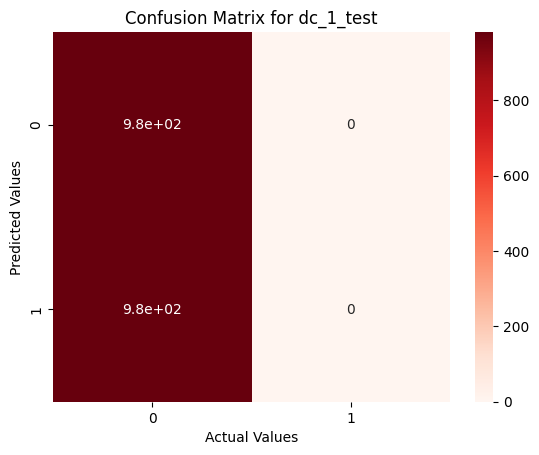

In [ ]:
model = DummyClassifier(strategy='constant', constant=0)
metrics_final(model, model_name='dc', cm='Reds')

In [ ]:
# Logistic Regression A2

In [ ]:
est = LogisticRegression()
param_grid = {"penalty":['l1','l2','elasticnet'], "C":[10,1,0.1, 0.01],
              "solver": ["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"]
             }
grid = GridSearchCV(est, param_grid, n_jobs=-1, refit=True, cv=5, verbose=0, return_train_score=True)
grid.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
200 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Sol

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [10, 1, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             return_train_score=True)

In [ ]:
grid.score(x_train,y_train), grid.score(x_test,y_test)

(0.899673735725938, 0.8902936378466558)

In [ ]:
grid.cv_results_

{'mean_fit_time': array([5.19227982e-03, 2.18062396e+01, 4.13942337e-03, 6.55026436e-03,
        5.57422638e-03, 4.37406673e+00, 1.93095589e-01, 2.16503973e+00,
        1.43284907e+00, 3.56195641e-01, 3.02699819e+00, 2.56740103e+00,
        3.59630585e-03, 3.32069397e-03, 3.17111015e-03, 3.23953629e-03,
        3.37448120e-03, 8.66761208e-03, 3.62744331e-03, 2.31633954e+00,
        5.09686470e-03, 6.38756752e-03, 6.51125908e-03, 3.87537537e+00,
        2.03436613e-01, 9.69138384e-01, 7.78270149e-01, 2.80815697e-01,
        2.62042003e+00, 2.89213996e+00, 3.66654396e-03, 2.69298553e-03,
        5.95278740e-03, 3.61399651e-03, 2.29749680e-03, 5.12518883e-03,
        3.79486084e-03, 2.46526575e-01, 4.99053001e-03, 3.76534462e-03,
        3.52840424e-03, 4.36287417e+00, 1.49105549e-01, 2.80641174e-01,
        3.81510544e-01, 2.81664991e-01, 3.07530403e+00, 2.69782281e+00,
        2.92329788e-03, 2.75211334e-03, 2.74791718e-03, 2.64821053e-03,
        3.20787430e-03, 6.01453781e-03, 2.65736

CM saved
ACS train 0: 0.8971450420596482
ACS test 0: 0.8950050968399592
Prec train 0: 0.9185921547555078
Prec test 0: 0.9109225874867445
Rec train 0: 0.8715268926841703
Rec test 0: 0.8756371049949032
F1-score train 0: 0.8944408109875734
F1-score test 0: 0.892931392931393


CM saved
ACS train 1: 0.900203925567168
ACS test 1: 0.8863404689092762
Prec train 1: 0.9186666666666666
Prec test 1: 0.9146608315098468
Rec train 1: 0.8781544736171297
Rec test 1: 0.8521916411824668
F1-score train 1: 0.8979538641991398
F1-score test 1: 0.8823218997361477


CM saved
ACS train 2: 0.8957430537853683
ACS test 2: 0.8970438328236493
Prec train 2: 0.9183508488278093
Prec test 2: 0.9275521405049396
Rec train 2: 0.8687229161356105
Rec test 2: 0.8613659531090724
F1-score train 2: 0.8928477862195442
F1-score test 2: 0.8932346723044398


CM saved
ACS train 3: 0.8976678985599592
ACS test 3: 0.8837327893931668
Prec train 3: 0.9200538358008076
Prec test 3: 0.9104803493449781
Rec train 3: 0.8710499490316004
Rec test

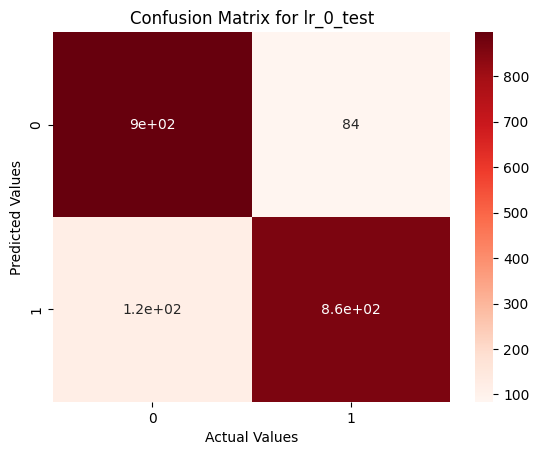

In [ ]:
model = LogisticRegression(**{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'})
metrics_final(model,model_name='lr',cm='Reds')

In [ ]:
# lr=LogisticRegression(dual=False,fit_intercept=True, intercept_scaling=1.0,n_jobs=-1, penalty='l1', random_state=0,solver='liblinear', tol=0.0001, verbose=0)
# lr.fit(x_train,y_train)
# lr.score(x_train,y_train), lr.score(x_test,y_test)

(0.889342033713975, 0.8805057096247961)

In [ ]:
test_td['LogisticRegression']=lr.predict(X_test)
print(test_td["LogisticRegression"].mean())
test_td[["Provider","LogisticRegression"]].head(16)

0.14412416851441243


Provider  LogisticRegression
0   PRV51002                   0
1   PRV51006                   0
2   PRV51009                   0
3   PRV51010                   0
4   PRV51018                   0
5   PRV51019                   0
6   PRV51020                   0
7   PRV51022                   0
8   PRV51028                   0
9   PRV51033                   0
10  PRV51034                   0
11  PRV51039                   1
12  PRV51050                   0
13  PRV51051                   0
14  PRV51069                   1
15  PRV51073                   1

In [ ]:
# Ablation 3

In [ ]:
from sklearn.svm import SVC

In [ ]:
est = SVC()
param_grid = {'C':[0.01,0.1,1,10,100,500,1000], 'kernel':['linear','rbf']}
grid = GridSearchCV(est, param_grid, n_jobs=-1, refit=True, cv=5, verbose=0, return_train_score=True)
grid.fit(x_train,y_train)
grid.cv_results_

{'mean_fit_time': array([  4.36206613,   6.10158491,   3.24634137,   4.31149883,
          3.87921968,   3.72648759,   9.40717702,   3.26092539,
         41.86779184,   3.30487661, 185.85050001,   3.2285213 ,
        270.78931799,   3.7092483 ]),
 'std_fit_time': array([ 0.18178577,  0.60907915,  0.40052352,  0.41772026,  0.19015659,
         0.43415506,  1.00366635,  0.11458949,  5.80190986,  0.48446324,
        18.83023948,  0.33696067, 16.86599531,  0.32008236]),
 'mean_score_time': array([0.47691474, 2.61169672, 0.44417281, 1.72322159, 0.33411179,
        1.57597575, 0.31239953, 1.22584581, 0.26121936, 1.15490117,
        0.26007366, 0.98597274, 0.16055007, 0.94805579]),
 'std_score_time': array([0.00830361, 0.36427149, 0.07629243, 0.17740266, 0.0330293 ,
        0.04830908, 0.01934493, 0.07619812, 0.00534806, 0.08576149,
        0.02741755, 0.05433092, 0.00628821, 0.05535841]),
 'param_C': masked_array(data=[0.01, 0.01, 0.1, 0.1, 1, 1, 10, 10, 100, 100, 500, 500,
                 

In [ ]:
grid.score(x_train,y_train), grid.score(x_test,y_test)

(0.9472539423599783, 0.9233278955954323)

CM saved
ACS train 0: 0.9479989803721641
ACS test 0: 0.9250764525993884
Prec train 0: 0.9410288582183187
Prec test 0: 0.9112426035502958
Rec train 0: 0.9559010960999236
Rec test 0: 0.9418960244648318
F1-score train 0: 0.9484066767830046
F1-score test 0: 0.9263157894736842


CM saved
ACS train 1: 0.9483813408106041
ACS test 1: 0.9153924566768603
Prec train 1: 0.9437436932391524
Prec test 1: 0.9070929070929071
Rec train 1: 0.9536069334692837
Rec test 1: 0.9255861365953109
F1-score train 1: 0.9486496766831495
F1-score test 1: 0.9162462159434914


CM saved
ACS train 2: 0.9467244455773642
ACS test 2: 0.9322120285423038
Prec train 2: 0.9413246033744649
Prec test 2: 0.9257028112449799
Rec train 2: 0.9528422125924038
Rec test 2: 0.9398572884811417
F1-score train 2: 0.9470483911831772
F1-score test 2: 0.9327263530601922


CM saved
ACS train 3: 0.9469861093411495
ACS test 3: 0.9178990311065782
Prec train 3: 0.9424823410696267
Prec test 3: 0.9099099099099099
Rec train 3: 0.9520897043832823
Rec te

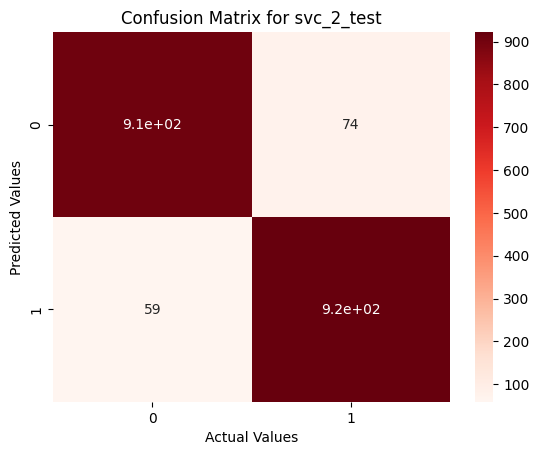

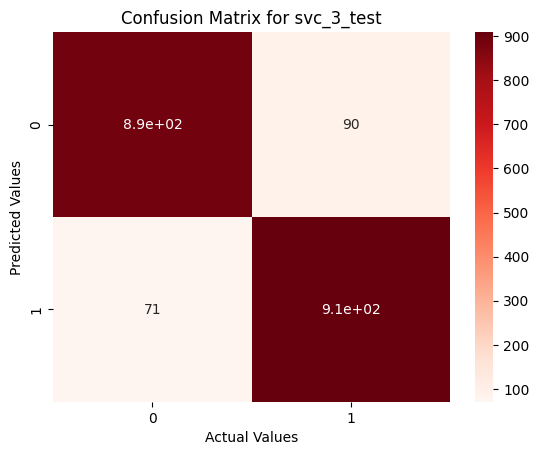

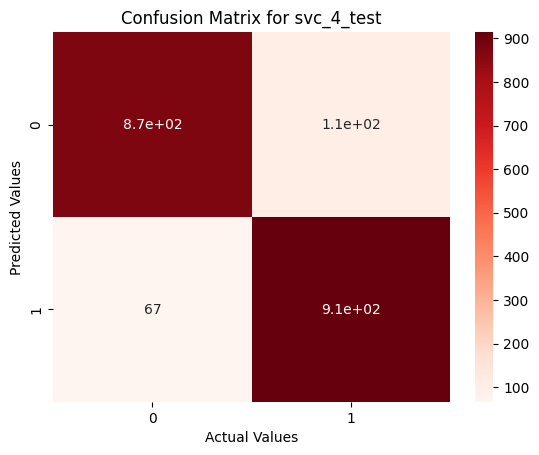

In [ ]:
model = SVC(**{'C': 1000, 'kernel': 'rbf'})
metrics_final(model,model_name='svc',cm='Reds')

In [ ]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
# Ablation 4

In [ ]:
est = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2,
                       min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt',
                       max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False,
                       n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None,
                       ccp_alpha=0.0, max_samples=None)
param_grid = {'n_estimators':[50,100,200,500,1000], 'criterion':['gini', 'entropy', 'log_loss'],
               'max_depth': [None, 3, 5, 7], 'min_samples_leaf': [1, 2, 5]}
grid = GridSearchCV(est, param_grid, n_jobs=-1, refit=True, cv=5, verbose=0, return_train_score=True)
grid.fit(x_train,y_train)
grid.cv_results_

{'mean_fit_time': array([ 3.25392838,  7.12953205, 15.19195714, 34.68054209, 65.17574449,
         3.01158185,  6.16681781, 12.11180205, 30.7435976 , 61.22495933,
         2.6744792 ,  5.72565536, 11.17232065, 28.27197289, 59.58911052,
         1.07144523,  2.27898526,  5.24534383, 11.87127109, 22.81103892,
         1.1168736 ,  2.49450474,  4.67187309, 11.74916229, 23.11720657,
         1.15942354,  2.21734791,  4.51195197, 11.42797823, 22.64828157,
         1.80738282,  3.51397104,  6.78029804, 17.30903525, 34.31491327,
         1.8466291 ,  3.31009398,  6.94954276, 17.30033412, 34.50149641,
         1.64011025,  3.38134332,  6.90265279, 17.08061681, 34.14718833,
         2.24067807,  4.42856913,  8.92742286, 21.89210215, 44.02373075,
         2.31659575,  4.51155467,  8.72353239, 21.86871562, 44.25327339,
         2.17087712,  4.53793454,  8.64018497, 22.32075934, 44.16971536,
         3.92283263,  7.39068837, 15.11120353, 37.56514888, 74.16060624,
         3.51100545,  7.43375072, 

In [ ]:
grid.score(x_train,y_train), grid.score(x_test,y_test)

(1.0, 0.9624796084828712)

CM saved
ACS train 0: 1.0
ACS test 0: 0.9587155963302753
Prec train 0: 1.0
Prec test 0: 0.9368932038834952
Rec train 0: 1.0
Rec test 0: 0.9836901121304791
F1-score train 0: 1.0
F1-score test 0: 0.9597215315763301


CM saved
ACS train 1: 1.0
ACS test 1: 0.9571865443425076
Prec train 1: 1.0
Prec test 1: 0.9367088607594937
Rec train 1: 1.0
Rec test 1: 0.9806320081549439
F1-score train 1: 1.0
F1-score test 1: 0.9581673306772908


CM saved
ACS train 2: 1.0
ACS test 2: 0.9683995922528033
Prec train 2: 1.0
Prec test 2: 0.951819075712881
Rec train 2: 1.0
Rec test 2: 0.9867482161060143
F1-score train 2: 1.0
F1-score test 2: 0.9689689689689691


CM saved
ACS train 3: 1.0
ACS test 3: 0.9592044875063743
Prec train 3: 1.0
Prec test 3: 0.9368932038834952
Rec train 3: 1.0
Rec test 3: 0.9846938775510204
F1-score train 3: 1.0
F1-score test 3: 0.9601990049751243


CM saved
ACS train 4: 1.0
ACS test 4: 0.957164711881693
Prec train 4: 1.0
Prec test 4: 0.931665062560154
Rec train 4: 1.0
Rec test 4: 0.98674

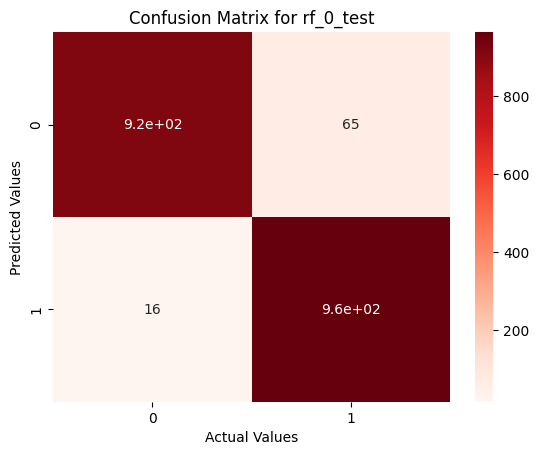

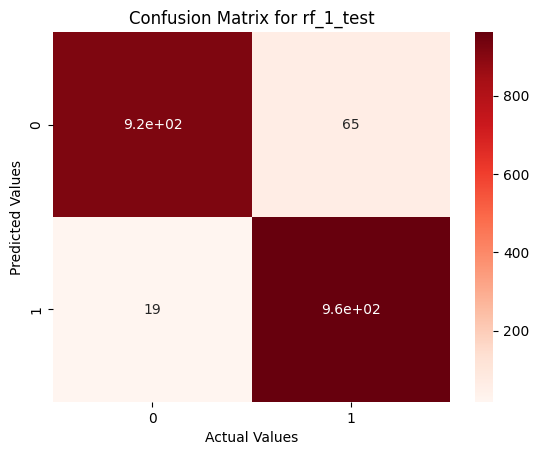

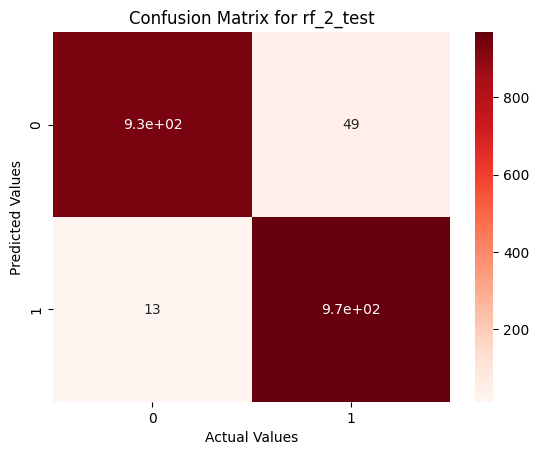

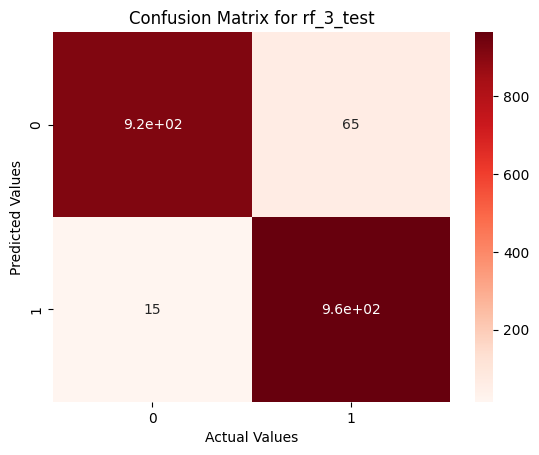

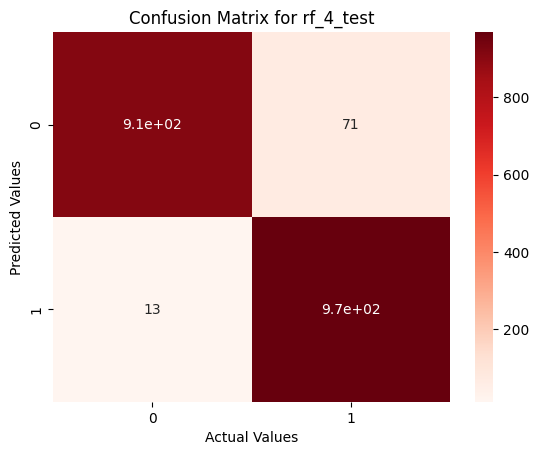

In [ ]:
model = RandomForestClassifier(**{'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 1,
 'n_estimators': 1000})
metrics_final(model,model_name='rf',cm='Reds')

In [ ]:
# rfc=RandomForestClassifier(n_estimators=100,random_state=0,max_depth=4)
# rfc.fit(x_train,y_train)

RandomForestClassifier(max_depth=4, random_state=0)

In [ ]:
# rfc.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
# rfc.score(x_train,y_train)

0.9051114736269712

In [ ]:
# rfc.score(x_test,y_test)

0.9078303425774877

In [ ]:
# test_td['RandomForest']=rfc.predict(X_test)
# print(test_td["RandomForest"].mean())
# test_td[["Provider","RandomForest"]].head(16)

0.21138211382113822


Provider  RandomForest
0   PRV51002             0
1   PRV51006             0
2   PRV51009             0
3   PRV51010             0
4   PRV51018             0
5   PRV51019             0
6   PRV51020             0
7   PRV51022             1
8   PRV51028             0
9   PRV51033             0
10  PRV51034             0
11  PRV51039             1
12  PRV51050             0
13  PRV51051             1
14  PRV51069             1
15  PRV51073             1

In [ ]:
# Ablation 5

In [ ]:
est = GradientBoostingClassifier()
param_grid = {'n_estimators':[500],
              'learning_rate':[0.300000012],  'criterion':['friedman_mse', 'squared_error'],
              'max_depth': [1, 3, 4, 5], 'min_samples_leaf': [1, 2, 5]
              }
grid = GridSearchCV(est, param_grid, n_jobs=-1, refit=True, cv=5, verbose=0, return_train_score=True)
grid.fit(x_train,y_train)
grid.cv_results_

{'mean_fit_time': array([ 66.85906062,  66.58163366,  66.86945429, 190.56759939,
        190.88543377, 190.92625833, 250.30094585, 250.97538567,
        250.4965035 , 313.30820661, 316.96242061, 316.57376599,
         68.50232997,  67.89081059,  67.36018162, 192.373982  ,
        192.20001631, 191.36515932, 251.59658828, 251.693361  ,
        252.64709072, 313.8243794 , 307.11068931, 260.60094233]),
 'std_fit_time': array([0.17136589, 0.29272275, 0.46720184, 0.5876507 , 0.45156615,
        0.54362009, 0.4248607 , 0.58435159, 0.54311731, 1.88114932,
        2.13455009, 1.1347949 , 0.54251809, 0.2729959 , 0.27952587,
        0.4681432 , 1.07007829, 0.894118  , 1.11520758, 0.70580779,
        0.45161245, 0.63899561, 7.61786512, 7.17857295]),
 'mean_score_time': array([0.01185403, 0.01164942, 0.01151886, 0.01777368, 0.01832371,
        0.01784024, 0.02170815, 0.02204475, 0.02395258, 0.02470093,
        0.02654872, 0.02799082, 0.0138907 , 0.01154943, 0.01122065,
        0.01802764, 0.018082

In [ ]:
grid.score(x_train,y_train), grid.score(x_test,y_test)

(1.0, 0.9706362153344209)

CM saved
ACS train 0: 1.0
ACS test 0: 0.9673802242609582
Prec train 0: 1.0
Prec test 0: 0.9635995955510617
Rec train 0: 1.0
Rec test 0: 0.9714576962283384
F1-score train 0: 1.0
F1-score test 0: 0.9675126903553298


CM saved
ACS train 1: 1.0
ACS test 1: 0.9683995922528033
Prec train 1: 1.0
Prec test 1: 0.9590409590409591
Rec train 1: 1.0
Rec test 1: 0.9785932721712538
F1-score train 1: 1.0
F1-score test 1: 0.9687184661957617


CM saved
ACS train 2: 1.0
ACS test 2: 0.9714576962283384
Prec train 2: 1.0
Prec test 2: 0.9667003027245207
Rec train 2: 1.0
Rec test 2: 0.9765545361875637
F1-score train 2: 1.0
F1-score test 2: 0.9716024340770791


CM saved
ACS train 3: 1.0
ACS test 3: 0.9673635900050994
Prec train 3: 1.0
Prec test 3: 0.9552683896620279
Rec train 3: 1.0
Rec test 3: 0.9806122448979592
F1-score train 3: 1.0
F1-score test 3: 0.9677744209466264


CM saved
ACS train 4: 1.0
ACS test 4: 0.9648138704742478
Prec train 4: 1.0
Prec test 4: 0.9532803180914513
Rec train 4: 1.0
Rec test 4: 0.97

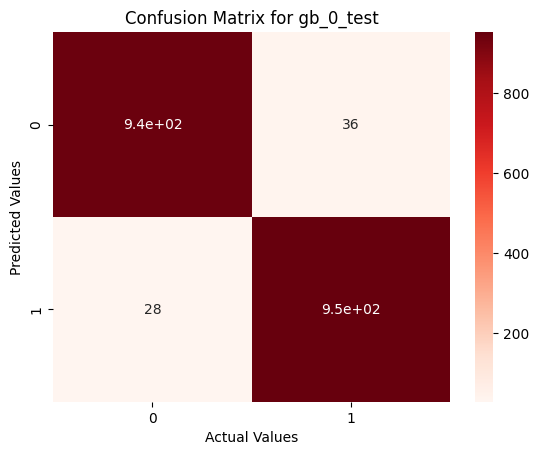

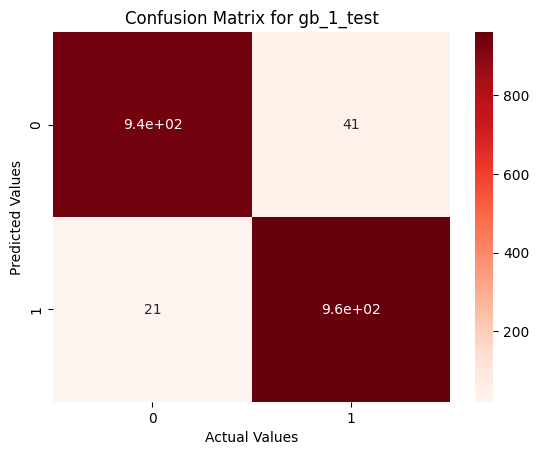

In [ ]:
model = GradientBoostingClassifier(**{'criterion': 'squared_error',
   'learning_rate': 0.300000012,
   'max_depth': 5,
   'min_samples_leaf': 5,
   'n_estimators': 500})
metrics_final(model,model_name='gb',cm='Reds')

In [ ]:
# gbc=GradientBoostingClassifier(n_estimators=100,max_depth=4,random_state=0)
# gbc.fit(x_train,y_train)

GradientBoostingClassifier(max_depth=4, random_state=0)

In [ ]:
# gbc.score(x_train,y_train)

0.9764817835780315

In [ ]:
# gbc.score(x_test,y_test)

0.9584013050570962

In [ ]:
# test_td['GradientBoosting']=gbc.predict(X_test)
# print(test_td["GradientBoosting"].mean())
# test_td[["Provider","GradientBoosting"]].head(16)

0.10864745011086474


Provider  GradientBoosting
0   PRV51002                 0
1   PRV51006                 0
2   PRV51009                 0
3   PRV51010                 0
4   PRV51018                 0
5   PRV51019                 0
6   PRV51020                 0
7   PRV51022                 0
8   PRV51028                 0
9   PRV51033                 0
10  PRV51034                 0
11  PRV51039                 1
12  PRV51050                 0
13  PRV51051                 0
14  PRV51069                 1
15  PRV51073                 1

In [ ]:
# Ablation 6

In [ ]:
est = XGBClassifier()
param_grid = {'n_estimators':[100,500,1000],
              'learning_rate':[0.001,0.01,0.300000012],  'criterion':['friedman_mse', 'squared_error'],
              'max_depth': [1, 3, 4, 5], 'min_samples_leaf': [1, 2, 5]}
grid = GridSearchCV(est, param_grid, n_jobs=-1, refit =True, cv=5, verbose=0, return_train_score=True)
grid.fit(x_train,y_train)
grid.cv_results_

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:46:12] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "criterion", "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


{'mean_fit_time': array([ 0.74157176,  2.50349669,  4.9380671 ,  0.76288033,  2.77023463,
         4.88461075,  0.716435  ,  2.37340384,  4.61038737,  1.61977787,
         7.60782914, 14.60685334,  1.67372589,  7.24275951, 14.74157662,
         1.76739116,  7.27507458, 14.67354865,  2.82923021, 12.33314929,
        24.47730894,  2.61718459, 12.20944557, 23.97711945,  2.68558273,
        12.25166454, 24.2819839 ,  4.10074658, 19.01104975, 38.71040974,
         4.11263542, 19.59241595, 37.82789598,  4.13757005, 19.15537257,
        37.54395466,  0.70326195,  2.50690989,  4.53638558,  0.69553561,
         2.74298949,  4.63123722,  0.67119842,  2.3699964 ,  4.7805191 ,
         1.67728372,  7.29415832, 12.99153113,  1.62265439,  7.31095219,
        13.03790636,  1.6289484 ,  6.99796352, 13.43460402,  2.65115795,
        11.47122655, 22.0124505 ,  2.74757876, 11.97272015, 21.13093224,
         2.85368028, 11.89198785, 21.01958609,  4.20222616, 17.73891745,
        30.64467177,  4.35880532, 

In [ ]:
grid.score(x_train,y_train), grid.score(x_test,y_test)

(1.0, 0.966557911908646)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:41:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "criterion", "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


CM saved
ACS train 0: 1.0
ACS test 0: 0.9694189602446484
Prec train 0: 1.0
Prec test 0: 0.960960960960961
Rec train 0: 1.0
Rec test 0: 0.9785932721712538
F1-score train 0: 1.0
F1-score test 0: 0.9696969696969698




/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:41:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "criterion", "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


CM saved
ACS train 1: 1.0
ACS test 1: 0.9709480122324159
Prec train 1: 1.0
Prec test 1: 0.9629258517034068
Rec train 1: 1.0
Rec test 1: 0.9796126401630989
F1-score train 1: 1.0
F1-score test 1: 0.9711975745325923




/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:41:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "criterion", "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


CM saved
ACS train 2: 1.0
ACS test 2: 0.9724770642201835
Prec train 2: 1.0
Prec test 2: 0.9658291457286432
Rec train 2: 1.0
Rec test 2: 0.9796126401630989
F1-score train 2: 1.0
F1-score test 2: 0.9726720647773279




/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:41:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "criterion", "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


CM saved
ACS train 3: 1.0
ACS test 3: 0.971443141254462
Prec train 3: 1.0
Prec test 3: 0.9592445328031809
Rec train 3: 1.0
Rec test 3: 0.9846938775510204
F1-score train 3: 1.0
F1-score test 3: 0.9718026183282981




/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:41:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "criterion", "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


CM saved
ACS train 4: 1.0
ACS test 4: 0.9632840387557369
Prec train 4: 1.0
Prec test 4: 0.9477832512315271
Rec train 4: 1.0
Rec test 4: 0.9806320081549439
F1-score train 4: 1.0
F1-score test 4: 0.9639278557114228


Final Train Accuracy : 100.0+-0.0
Final Test Accuracy : 96.951+-0.327
Final Train Precision : 100.0+-0.0
Final Test Precision : 95.935+-0.618
Final Train Recall : 100.0+-0.0
Final Test Recall : 98.063+-0.213
Final Train F1 : 100.0+-0.0
Final Test F1 : 96.986+-0.312


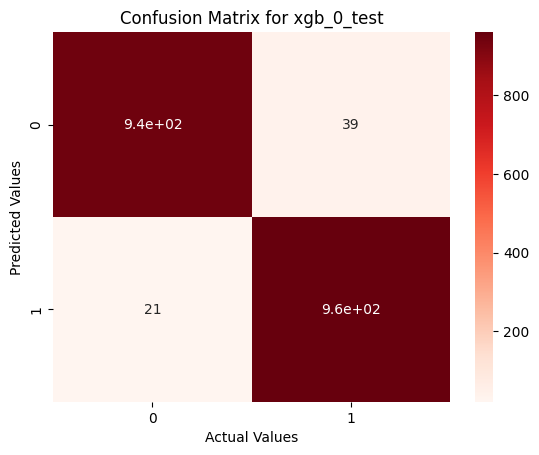

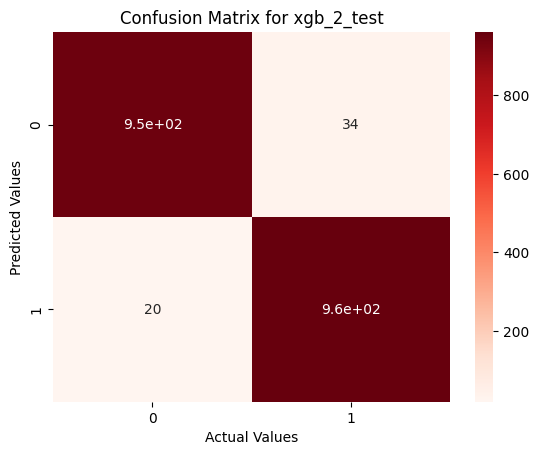

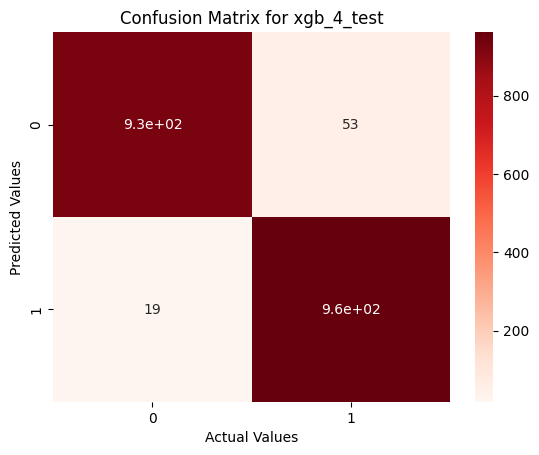

In [ ]:
model = XGBClassifier(**{'criterion': 'friedman_mse',
   'learning_rate': 0.300000012,
   'max_depth': 5,
   'min_samples_leaf': 1,
   'n_estimators': 500})
metrics_final(model,model_name='xgb',cm='Reds')

In [ ]:
xgbc=XGBClassifier(n_estimators=100,max_depth=4,random_state=0)
xgbc.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:32:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
xgbc.score(x_train,y_train)

0.9994562262098967

In [ ]:
xgbc.score(x_test,y_test)

0.9628874388254486

In [ ]:
test_td['XGBClassifier']=xgbc.predict(X_test)
print(test_td["XGBClassifier"].mean())
test_td[["Provider","XGBClassifier"]].head(16)

0.09608277900960828


Provider  XGBClassifier
0   PRV51002              0
1   PRV51006              0
2   PRV51009              0
3   PRV51010              0
4   PRV51018              0
5   PRV51019              0
6   PRV51020              0
7   PRV51022              0
8   PRV51028              0
9   PRV51033              0
10  PRV51034              0
11  PRV51039              0
12  PRV51050              0
13  PRV51051              0
14  PRV51069              1
15  PRV51073              1

In [ ]:
# Ablation 7

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 15.5 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier

In [ ]:
est = CatBoostClassifier()
param_grid = {'iterations':[100,200,500], 'depth': [1, 3, 4, 5]}
grid = GridSearchCV(est, param_grid, n_jobs=-1, refit =True, cv=5, verbose=0, return_train_score=True)
grid.fit(x_train,y_train)
grid.cv_results_

Learning rate set to 0.105668
0:	learn: 0.5902643	total: 56.6ms	remaining: 11.3s
1:	learn: 0.5191305	total: 64.5ms	remaining: 6.38s
2:	learn: 0.4567486	total: 73ms	remaining: 4.8s
3:	learn: 0.4080283	total: 81.1ms	remaining: 3.98s
4:	learn: 0.3723984	total: 89.3ms	remaining: 3.48s
5:	learn: 0.3503946	total: 97.5ms	remaining: 3.15s
6:	learn: 0.3321348	total: 106ms	remaining: 2.91s
7:	learn: 0.3139637	total: 114ms	remaining: 2.73s
8:	learn: 0.2993960	total: 122ms	remaining: 2.59s
9:	learn: 0.2837787	total: 130ms	remaining: 2.47s
10:	learn: 0.2729291	total: 138ms	remaining: 2.37s
11:	learn: 0.2631572	total: 150ms	remaining: 2.35s
12:	learn: 0.2547375	total: 159ms	remaining: 2.29s
13:	learn: 0.2475629	total: 168ms	remaining: 2.23s
14:	learn: 0.2388402	total: 176ms	remaining: 2.17s
15:	learn: 0.2332195	total: 184ms	remaining: 2.11s
16:	learn: 0.2275150	total: 193ms	remaining: 2.08s
17:	learn: 0.2249329	total: 201ms	remaining: 2.04s
18:	learn: 0.2224114	total: 209ms	remaining: 1.99s
19:	lear

{'mean_fit_time': array([ 4.77232723,  8.21688824, 19.39209695,  6.92345009, 13.66000466,
        32.7935905 ,  9.04522262, 18.48266559, 45.70307074, 12.14118915,
        24.72623925, 37.78850756]),
 'std_fit_time': array([0.20453816, 0.51032223, 0.78711877, 0.61301634, 0.11230614,
        0.57951696, 0.35304236, 0.7431638 , 0.52277699, 0.32196831,
        1.17122036, 5.2054885 ]),
 'mean_score_time': array([0.25356436, 0.2563601 , 0.27680244, 0.23420391, 0.28948164,
        0.27580204, 0.27831101, 0.28737874, 0.3561048 , 0.37584038,
        0.30225849, 0.14575725]),
 'std_score_time': array([0.0746629 , 0.03533914, 0.04730052, 0.05227241, 0.09247308,
        0.09975552, 0.06901201, 0.05813008, 0.12852404, 0.07977814,
        0.0714619 , 0.04422089]),
 'param_depth': masked_array(data=[1, 1, 1, 3, 3, 3, 4, 4, 4, 5, 5, 5],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
        fill_value='?',
             dtyp

In [ ]:
grid.score(x_train,y_train), grid.score(x_test,y_test)

(0.988852637302882, 0.9616639477977161)

Learning rate set to 0.108619
0:	learn: 0.5859153	total: 57.9ms	remaining: 11.5s
1:	learn: 0.5033038	total: 67.8ms	remaining: 6.71s
2:	learn: 0.4418762	total: 77.9ms	remaining: 5.12s
3:	learn: 0.3979825	total: 88.4ms	remaining: 4.33s
4:	learn: 0.3624607	total: 97.9ms	remaining: 3.82s
5:	learn: 0.3425179	total: 108ms	remaining: 3.5s
6:	learn: 0.3193028	total: 118ms	remaining: 3.26s
7:	learn: 0.3012629	total: 128ms	remaining: 3.08s
8:	learn: 0.2842736	total: 138ms	remaining: 2.92s
9:	learn: 0.2704446	total: 148ms	remaining: 2.81s
10:	learn: 0.2582368	total: 158ms	remaining: 2.72s
11:	learn: 0.2505371	total: 168ms	remaining: 2.63s
12:	learn: 0.2426950	total: 178ms	remaining: 2.56s
13:	learn: 0.2363024	total: 190ms	remaining: 2.52s
14:	learn: 0.2297659	total: 200ms	remaining: 2.47s
15:	learn: 0.2227555	total: 210ms	remaining: 2.42s
16:	learn: 0.2183637	total: 220ms	remaining: 2.37s
17:	learn: 0.2143933	total: 230ms	remaining: 2.32s
18:	learn: 0.2115500	total: 240ms	remaining: 2.28s
19:	lea

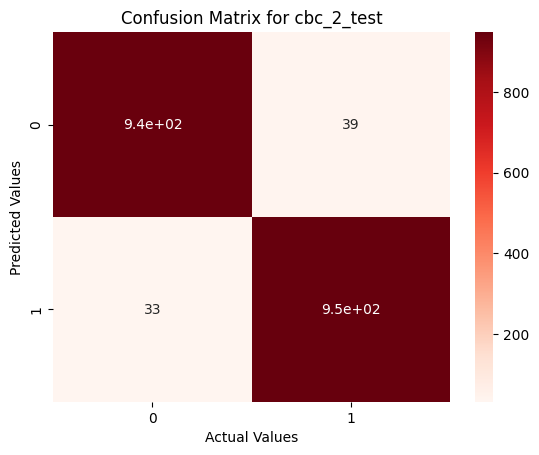

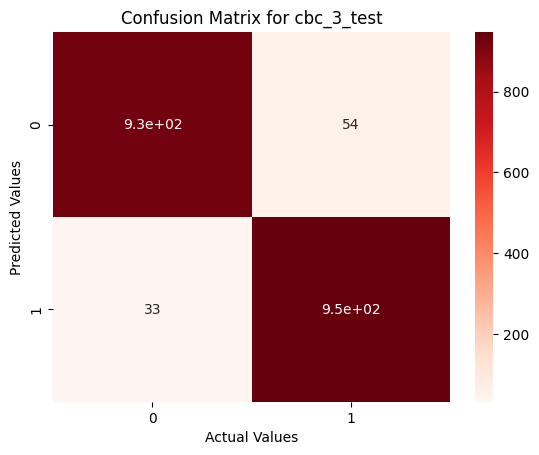

In [ ]:
model = CatBoostClassifier(**{'depth': 5, 'iterations': 200})
metrics_final(model,model_name='cbc',cm='Reds')

In [ ]:
# cbc=CatBoostClassifier(iterations=100,depth=4,random_state=0)
# cbc.fit(x_train,y_train)

Learning rate set to 0.199522
0:	learn: 0.5195576	total: 152ms	remaining: 15s
1:	learn: 0.4283218	total: 164ms	remaining: 8.02s
2:	learn: 0.3674707	total: 175ms	remaining: 5.65s
3:	learn: 0.3222991	total: 186ms	remaining: 4.47s
4:	learn: 0.2977008	total: 200ms	remaining: 3.79s
5:	learn: 0.2821090	total: 211ms	remaining: 3.3s
6:	learn: 0.2675862	total: 223ms	remaining: 2.96s
7:	learn: 0.2513644	total: 235ms	remaining: 2.7s
8:	learn: 0.2391562	total: 246ms	remaining: 2.49s
9:	learn: 0.2334983	total: 258ms	remaining: 2.32s
10:	learn: 0.2270045	total: 269ms	remaining: 2.18s
11:	learn: 0.2237430	total: 280ms	remaining: 2.05s
12:	learn: 0.2121162	total: 291ms	remaining: 1.95s
13:	learn: 0.2096467	total: 302ms	remaining: 1.85s
14:	learn: 0.2067988	total: 313ms	remaining: 1.77s
15:	learn: 0.2045043	total: 324ms	remaining: 1.7s
16:	learn: 0.2032522	total: 334ms	remaining: 1.63s
17:	learn: 0.2016674	total: 345ms	remaining: 1.57s
18:	learn: 0.1996643	total: 356ms	remaining: 1.52s
19:	learn: 0.197

In [ ]:
# cbc.score(x_train,y_train)

0.9787928221859706

In [ ]:
# cbc.score(x_test,y_test)

0.9579934747145188

In [ ]:
# test_td['CatBoostClassifier']=cbc.predict(X_test)
# print(test_td["CatBoostClassifier"].mean())
# test_td[["Provider","CatBoostClassifier"]].head(16)

0.1049519586104952


Provider  CatBoostClassifier
0   PRV51002                   0
1   PRV51006                   0
2   PRV51009                   0
3   PRV51010                   0
4   PRV51018                   0
5   PRV51019                   0
6   PRV51020                   0
7   PRV51022                   0
8   PRV51028                   0
9   PRV51033                   0
10  PRV51034                   0
11  PRV51039                   0
12  PRV51050                   0
13  PRV51051                   0
14  PRV51069                   1
15  PRV51073                   1

In [ ]:
#define rfc here

In [ ]:
pd.DataFrame([X_B.columns,rfc.feature_importances_],index=['Col','Imp']).T.sort_values(by='Imp',ascending=False).reset_index(drop=True).iloc[:20]

Col       Imp
0              Avg_PerProvider_InscClaimAmtReimbursed  0.083478
1           Provider_ClmDiagnosisCode_9_ClaimID_Count  0.070288
2         Avg_PerDiagnosisGroupCode_DeductibleAmtPaid  0.058709
3    Avg_PerOperatingPhysician_InscClaimAmtReimbursed  0.053427
4    Avg_PerAttendingPhysician_InscClaimAmtReimbursed  0.049709
5                              InscClaimAmtReimbursed    0.0479
6   Avg_PerClmProcedureCode_2_OPAnnualReimbursemen...  0.040133
7                   Avg_PerProvider_DeductibleAmtPaid  0.039902
8                 Avg_PerOperatingPhysician_Days_Hosp  0.038377
9                Avg_PerOperatingPhysician_Days_Claim  0.035069
10   Avg_PerClmProcedureCode_2_InscClaimAmtReimbursed  0.032397
11  Avg_PerOperatingPhysician_IPAnnualReimbursemen...  0.031972
12          Provider_ClmDiagnosisCode_8_ClaimID_Count  0.025752
13   Avg_PerDiagnosisGroupCode_InscClaimAmtReimbursed  0.025412
14    Avg_PerClmProcedureCode_2_IPAnnualDeductibleAmt  0.021724
15   Provider_BeneID_ClmProcedureCode_2_ClaimID_Count  0.021672
16                                  DeductibleAmtPaid   0.01822
17  Provider_BeneID_ClmDiagnosisCode_10_ClaimID_Count  0.017953
18    Avg_PerClmProcedureCode_2_OPAnnualDeductibleAmt  0.017645
19        Avg_PerAttendingPhysician_DeductibleAmtPaid  0.017321

In [ ]:
from sklearn.metrics import f1_score
print(f1_score(y_test,lr.predict(x_test)))
print(f1_score(y_test,rfc.predict(x_test)))
print(f1_score(y_test,gbc.predict(x_test)))
print(f1_score(y_test,xgbc.predict(x_test)))
print(f1_score(y_test,cbc.predict(x_test)))

0.8752660706683695
0.9110236220472441
0.9587712206952304
0.9632620104965685
0.9583501819652244


In [ ]:
s=X_B
s['target']=Y_B

In [ ]:
#s.to_csv('Train_Krunch/Checkpoint3.csv')

In [ ]:
test_td.mean()

C:\Users\kshir\AppData\Local\Temp\ipykernel_21212\1480542463.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  test_td.mean()


LogisticRegression    0.144124
RandomForest          0.211382
GradientBoosting      0.108647
XGBClassifier         0.096083
CatBoostClassifier    0.104952
dtype: float64

In [ ]:
test_td['final_output']=test_td[test_td.columns[1:4]].mean(axis=1).apply(lambda x:1 if x>=0.5 else 0)

In [ ]:
#test_td[['Provider','final_output']].to_csv("Test_Krunch/Submission.csv")

In [ ]:
sns.countplot(test_td['final_output']);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


In [ ]:
x_train.shape

(7356, 185)

In [ ]:
y_train.mean()

0.5

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

In [ ]:
# Ablation 7

In [ ]:
# len(list_hidden_neurons) + 2 layers network
def ann(inp, list_hidden_neurons, dropout_layer, p_dropout=0.5, lr=0.001):
    ann=Sequential()
    i = 0
    while i<len(list_hidden_neurons):
        ann.add(Dense(units=list_hidden_neurons[i],input_shape=inp.shape[1:], activation='relu', kernel_initializer='he_uniform'))
        if i in dropout_layer:
            ann.add(Dropout(p_dropout))
        i+=1
    ann.add(Dense(units=1,activation='sigmoid',))
    adam_optimizer = Adam(learning_rate=lr, beta_1=0.9, beta_2=0.999, epsilon=1e-07)
    ann.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer=adam_optimizer)
    ann.summary()
    es=EarlyStopping(patience=10)
    return ann

In [ ]:
# 5 fold training
def ann_training(train_sets, train_target_sets, test_sets, test_target_sets,
                 list_hidden_neurons, dropout_layer, p_dropout=0.5, lr=0.001, epochs=100, batch_size=32):
    ac_train = []
    ac_test = []
    prec_train = []
    prec_test = []
    rec_train = []
    rec_test = []
    f1_train = []
    f1_test = []
    for split_num, (x_train, y_train, x_test, y_test) in enumerate(zip(train_sets, train_target_sets, test_sets, test_target_sets)):
        model = ann(x_train, list_hidden_neurons, dropout_layer, p_dropout, lr=lr)
        model.fit(x=x_train,y=y_train,epochs=epochs,batch_size=batch_size, validation_data=(x_test,y_test),
                  callbacks=[es])
        acs, prec, rec, f1, acs1, prec1, rec1, f11 = \
        metrics((model.predict(x_train)> 0.5).astype(int), y_train,
                (model.predict(x_test)> 0.5).astype(int), y_test, 'ann',
                'Reds', split_num)
        ac_train.append(acs)
        ac_test.append(acs1)
        prec_train.append(prec)
        prec_test.append(prec1)
        rec_train.append(rec)
        rec_test.append(rec1)
        f1_train.append(f1)
        f1_test.append(f11)

    print('Final Train Accuracy : {}+-{}'.format(round(np.array(ac_train).mean()*100,3), round(np.array(ac_train).std()*100,3)))
    print('Final Test Accuracy : {}+-{}'.format(round(np.array(ac_test).mean()*100,3), round(np.array(ac_test).std()*100,3)))
    print('Final Train Precision : {}+-{}'.format(round(np.array(prec_train).mean()*100,3), round(np.array(prec_train).std()*100,3)))
    print('Final Test Precision : {}+-{}'.format(round(np.array(prec_test).mean()*100,3), round(np.array(prec_test).std()*100,3)))
    print('Final Train Recall : {}+-{}'.format(round(np.array(rec_train).mean()*100,3), round(np.array(rec_train).std()*100,3)))
    print('Final Test Recall : {}+-{}'.format(round(np.array(rec_test).mean()*100,3), round(np.array(rec_test).std()*100,3)))
    print('Final Train F1 : {}+-{}'.format(round(np.array(f1_train).mean()*100,3), round(np.array(f1_train).std()*100,3)))
    print('Final Test F1 : {}+-{}'.format(round(np.array(f1_test).mean()*100,3), round(np.array(f1_test).std()*100,3)))

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_156 (Dense)           (None, 512)               95232     
                                                                 
 dense_157 (Dense)           (None, 256)               131328    
                                                                 
 dense_158 (Dense)           (None, 128)               32896     
                                                                 
 dense_159 (Dense)           (None, 64)                8256      
                                                                 
 dense_160 (Dense)           (None, 32)                2080      
                                                                 
 dense_161 (Dense)           (None, 1)                 33        
                                                                 
Total params: 269825 (1.03 MB)
Trainable params: 2698

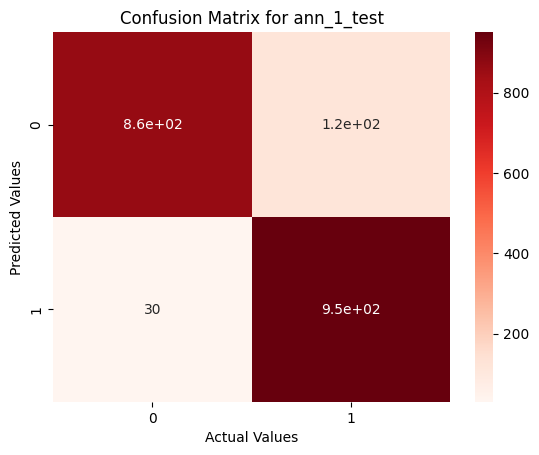

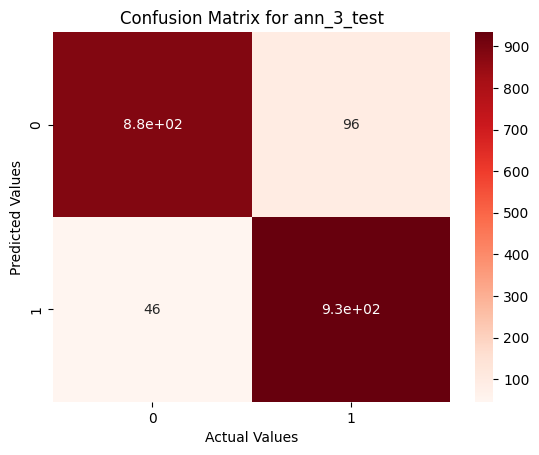

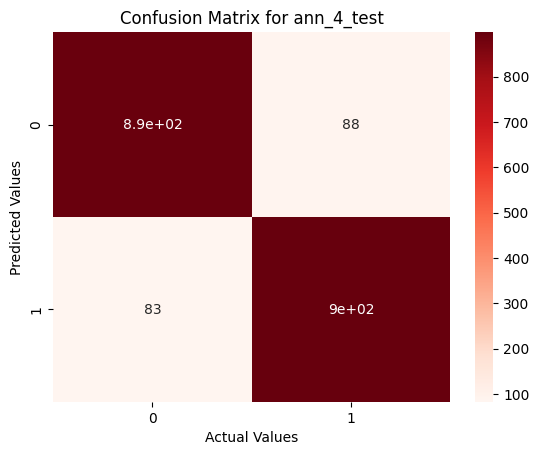

In [ ]:
list_hidden_neurons = [512,256,128,64,32]
dropout_layer = [] #[0,1,2]
p_dropout = 0.5
epochs=100
batch_size=64
lr=0.001

ann_training(train_sets, train_target_sets, test_sets, test_target_sets,
             list_hidden_neurons, dropout_layer,p_dropout=p_dropout,lr=lr,epochs=epochs,
             batch_size=batch_size)

In [ ]:
# Ablation 8

In [ ]:
# ensemble
def ensemble(train_sets, train_target_sets, test_sets, test_target_sets, model_list, model_name='', cm=''):
    ac_train = []
    ac_test = []
    prec_train = []
    prec_test = []
    rec_train = []
    rec_test = []
    f1_train = []
    f1_test = []
    for split_num, (x_train, y_train, x_test, y_test) in enumerate(zip(train_sets, train_target_sets, test_sets, test_target_sets)):

        i = 0
        while i<len(model_list):
            model_list[i].fit(x_train, y_train)
            i+=1

        preds_train = []
        preds_test = []
        i = 0
        while i<len(model_list):
            preds_train.append(model_list[i].predict(x_train))
            preds_test.append(model_list[i].predict(x_test))
            i+=1

        preds_train = sum(preds_train)/len(preds_train)
        preds_train = (preds_train >= 0.5).astype(int)

        preds_test = sum(preds_test)/len(preds_test)
        preds_test = (preds_test >= 0.5).astype(int)

        acs, prec, rec, f1, acs1, prec1, rec1, f11 = \
        metrics(preds_train, y_train, preds_test, y_test, model_name, cm, split_num)
        ac_train.append(acs)
        ac_test.append(acs1)
        prec_train.append(prec)
        prec_test.append(prec1)
        rec_train.append(rec)
        rec_test.append(rec1)
        f1_train.append(f1)
        f1_test.append(f11)

    print('Final Train Accuracy : {}+-{}'.format(round(np.array(ac_train).mean()*100,3), round(np.array(ac_train).std()*100,3)))
    print('Final Test Accuracy : {}+-{}'.format(round(np.array(ac_test).mean()*100,3), round(np.array(ac_test).std()*100,3)))
    print('Final Train Precision : {}+-{}'.format(round(np.array(prec_train).mean()*100,3), round(np.array(prec_train).std()*100,3)))
    print('Final Test Precision : {}+-{}'.format(round(np.array(prec_test).mean()*100,3), round(np.array(prec_test).std()*100,3)))
    print('Final Train Recall : {}+-{}'.format(round(np.array(rec_train).mean()*100,3), round(np.array(rec_train).std()*100,3)))
    print('Final Test Recall : {}+-{}'.format(round(np.array(rec_test).mean()*100,3), round(np.array(rec_test).std()*100,3)))
    print('Final Train F1 : {}+-{}'.format(round(np.array(f1_train).mean()*100,3), round(np.array(f1_train).std()*100,3)))
    print('Final Test F1 : {}+-{}'.format(round(np.array(f1_test).mean()*100,3), round(np.array(f1_test).std()*100,3)))

In [ ]:
m1 = LogisticRegression(**{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'})
m2 = SVC(**{'C': 1000, 'kernel': 'rbf'})
m3 = RandomForestClassifier(**{'criterion': 'entropy',
   'max_depth': None,
   'min_samples_leaf': 1,
   'n_estimators': 1000})
m4 = GradientBoostingClassifier(**{'criterion': 'squared_error',
   'learning_rate': 0.300000012,
   'max_depth': 5,
   'min_samples_leaf': 5,
   'n_estimators': 500})
m5 = XGBClassifier(**{'criterion': 'friedman_mse',
   'learning_rate': 0.300000012,
   'max_depth': 5,
   'min_samples_leaf': 1,
   'n_estimators': 500})
m6 = CatBoostClassifier(**{'depth': 5, 'iterations': 200})

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [06:14:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "criterion", "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


CM saved
ACS train 0: 1.0
ACS test 0: 0.9668705402650357
Prec train 0: 1.0
Prec test 0: 0.9589178356713427
Rec train 0: 1.0
Rec test 0: 0.9755351681957186
F1-score train 0: 1.0
F1-score test 0: 0.967155128852956




/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [06:20:12] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "criterion", "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


CM saved
ACS train 1: 1.0
ACS test 1: 0.9673802242609582
Prec train 1: 1.0
Prec test 1: 0.9562189054726368
Rec train 1: 1.0
Rec test 1: 0.9796126401630989
F1-score train 1: 1.0
F1-score test 1: 0.9677744209466265




/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [06:26:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "criterion", "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


CM saved
ACS train 2: 1.0
ACS test 2: 0.9724770642201835
Prec train 2: 1.0
Prec test 2: 0.9630369630369631
Rec train 2: 1.0
Rec test 2: 0.9826707441386341
F1-score train 2: 1.0
F1-score test 2: 0.9727547931382441




/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [06:32:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "criterion", "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


CM saved
ACS train 3: 1.0
ACS test 3: 0.9673635900050994
Prec train 3: 1.0
Prec test 3: 0.9534653465346534
Rec train 3: 1.0
Rec test 3: 0.9826530612244898
F1-score train 3: 1.0
F1-score test 3: 0.9678391959798994




/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [06:38:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "criterion", "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


CM saved
ACS train 4: 1.0
ACS test 4: 0.9637939826619072
Prec train 4: 1.0
Prec test 4: 0.9487179487179487
Rec train 4: 1.0
Rec test 4: 0.9806320081549439
F1-score train 4: 1.0
F1-score test 4: 0.9644110275689222


Final Train Accuracy : 100.0+-0.0
Final Test Accuracy : 96.758+-0.279
Final Train Precision : 100.0+-0.0
Final Test Precision : 95.607+-0.485
Final Train Recall : 100.0+-0.0
Final Test Recall : 98.022+-0.262
Final Train F1 : 100.0+-0.0
Final Test F1 : 96.799+-0.269


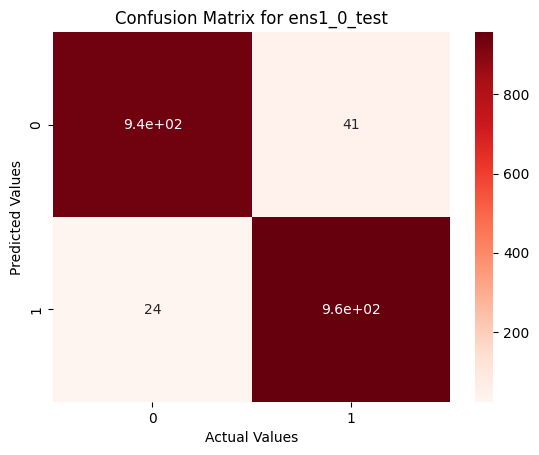

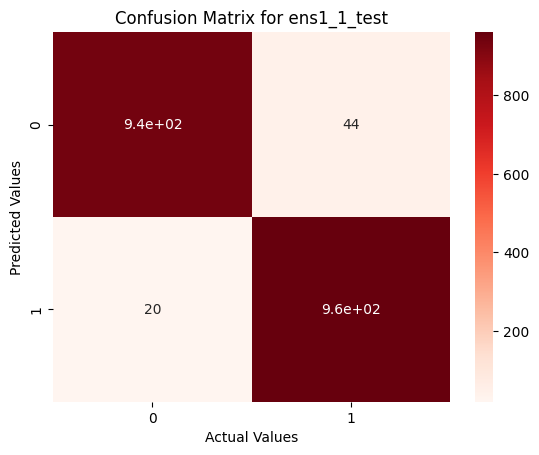

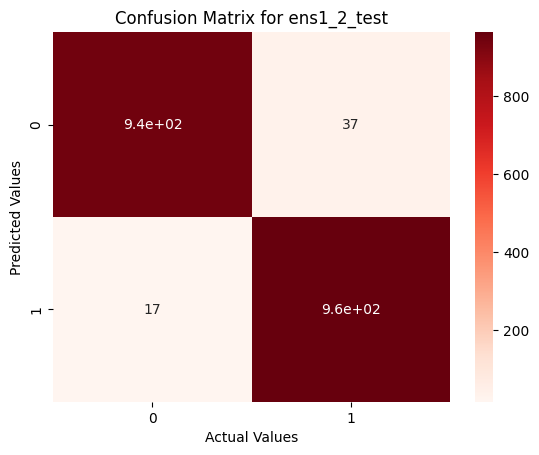

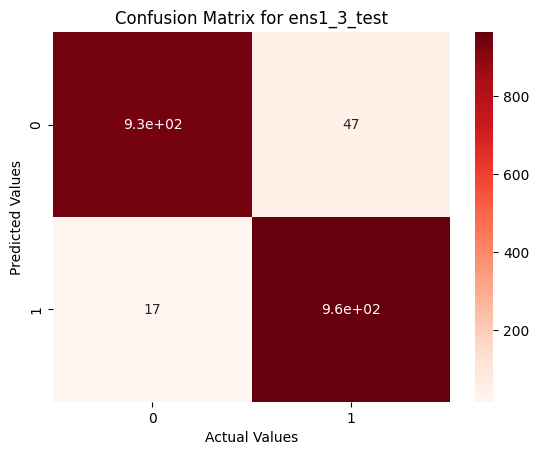

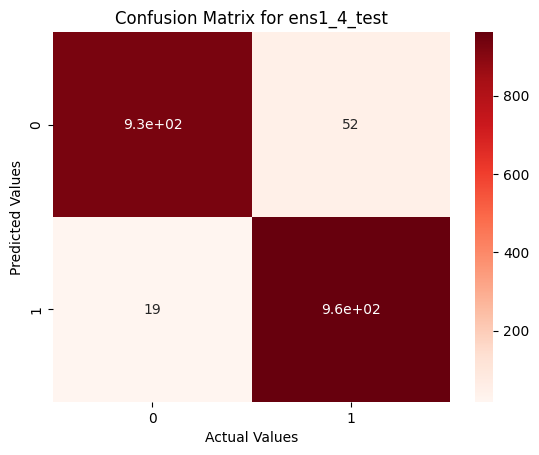

In [ ]:
ensemble(train_sets, train_target_sets, test_sets, test_target_sets, [m5,m4,m3],
         model_name='ens1', cm='Reds')

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:52:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "criterion", "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


CM saved
ACS train 0: 1.0
ACS test 0: 0.9668705402650357
Prec train 0: 1.0
Prec test 0: 0.9525691699604744
Rec train 0: 1.0
Rec test 0: 0.9826707441386341
F1-score train 0: 1.0
F1-score test 0: 0.9673858504766683




/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:56:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "criterion", "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


CM saved
ACS train 1: 1.0
ACS test 1: 0.9668705402650357
Prec train 1: 1.0
Prec test 1: 0.9543650793650794
Rec train 1: 1.0
Rec test 1: 0.9806320081549439
F1-score train 1: 1.0
F1-score test 1: 0.9673202614379085




/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [14:01:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "criterion", "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


CM saved
ACS train 2: 1.0
ACS test 2: 0.9714576962283384
Prec train 2: 1.0
Prec test 2: 0.9592850049652433
Rec train 2: 1.0
Rec test 2: 0.9847094801223242
F1-score train 2: 1.0
F1-score test 2: 0.971830985915493




/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [14:06:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "criterion", "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


CM saved
ACS train 3: 1.0
ACS test 3: 0.9658337582865885
Prec train 3: 1.0
Prec test 3: 0.9453658536585365
Rec train 3: 1.0
Rec test 3: 0.9887755102040816
F1-score train 3: 1.0
F1-score test 3: 0.9665835411471322




/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [14:11:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "criterion", "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


CM saved
ACS train 4: 1.0
ACS test 4: 0.9648138704742478
Prec train 4: 1.0
Prec test 4: 0.9418604651162791
Rec train 4: 1.0
Rec test 4: 0.9908256880733946
F1-score train 4: 1.0
F1-score test 4: 0.9657228017883756


Final Train Accuracy : 100.0+-0.0
Final Test Accuracy : 96.717+-0.228
Final Train Precision : 100.0+-0.0
Final Test Precision : 95.069+-0.628
Final Train Recall : 100.0+-0.0
Final Test Recall : 98.552+-0.378
Final Train F1 : 100.0+-0.0
Final Test F1 : 96.777+-0.212


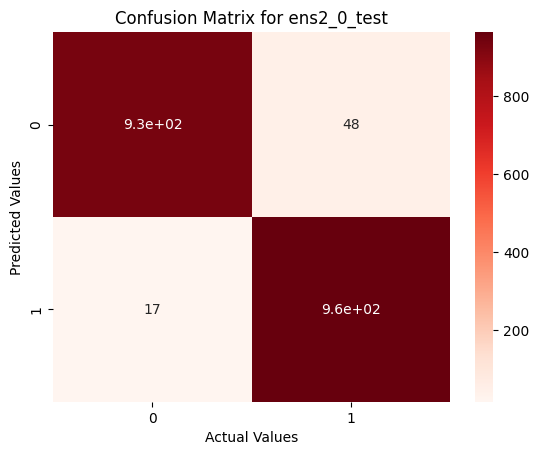

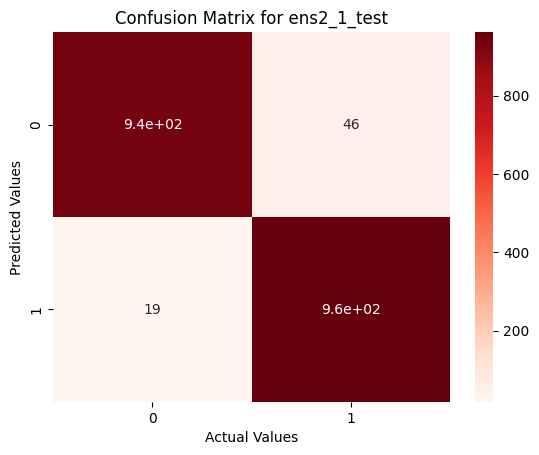

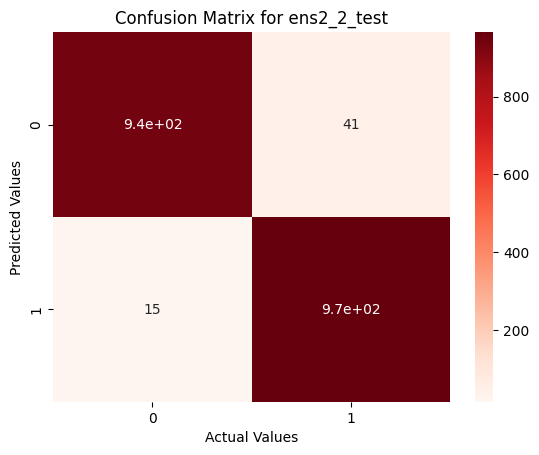

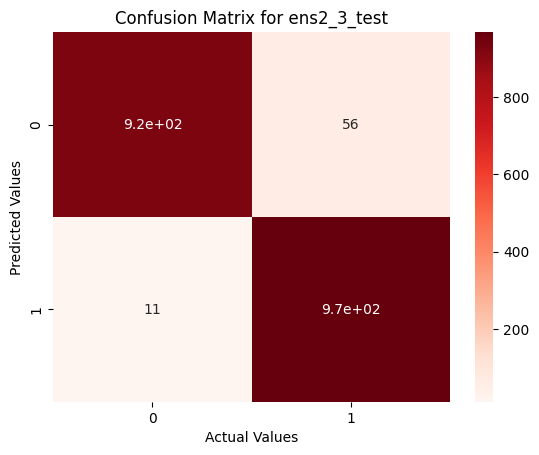

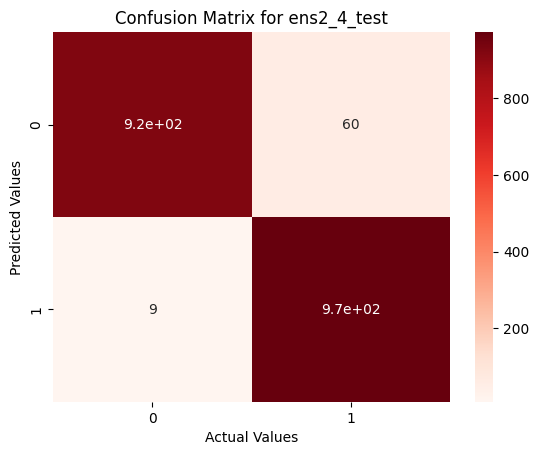

In [ ]:
ensemble(train_sets, train_target_sets, test_sets, test_target_sets, [m5,m4],
         model_name='ens2', cm='Reds')

In [ ]:
m4_1 = GradientBoostingClassifier(**{'criterion': 'friedman_mse',
   'learning_rate': 0.300000012,
   'max_depth': 5,
   'min_samples_leaf': 5,
   'n_estimators': 500})
m5_1 = XGBClassifier(**{'criterion': 'squared_error',
   'learning_rate': 0.300000012,
   'max_depth': 5,
   'min_samples_leaf': 1,
   'n_estimators': 500})

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [14:16:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "criterion", "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [14:16:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "criterion", "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


CM saved
ACS train 0: 1.0
ACS test 0: 0.9694189602446484
Prec train 0: 1.0
Prec test 0: 0.960960960960961
Rec train 0: 1.0
Rec test 0: 0.9785932721712538
F1-score train 0: 1.0
F1-score test 0: 0.9696969696969698




/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [14:16:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "criterion", "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [14:16:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "criterion", "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


CM saved
ACS train 1: 1.0
ACS test 1: 0.9709480122324159
Prec train 1: 1.0
Prec test 1: 0.9629258517034068
Rec train 1: 1.0
Rec test 1: 0.9796126401630989
F1-score train 1: 1.0
F1-score test 1: 0.9711975745325923




/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [14:16:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "criterion", "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [14:16:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "criterion", "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


CM saved
ACS train 2: 1.0
ACS test 2: 0.9724770642201835
Prec train 2: 1.0
Prec test 2: 0.9658291457286432
Rec train 2: 1.0
Rec test 2: 0.9796126401630989
F1-score train 2: 1.0
F1-score test 2: 0.9726720647773279




/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [14:16:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "criterion", "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [14:16:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "criterion", "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


CM saved
ACS train 3: 1.0
ACS test 3: 0.971443141254462
Prec train 3: 1.0
Prec test 3: 0.9592445328031809
Rec train 3: 1.0
Rec test 3: 0.9846938775510204
F1-score train 3: 1.0
F1-score test 3: 0.9718026183282981




/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [14:16:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "criterion", "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [14:16:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "criterion", "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


CM saved
ACS train 4: 1.0
ACS test 4: 0.9632840387557369
Prec train 4: 1.0
Prec test 4: 0.9477832512315271
Rec train 4: 1.0
Rec test 4: 0.9806320081549439
F1-score train 4: 1.0
F1-score test 4: 0.9639278557114228


Final Train Accuracy : 100.0+-0.0
Final Test Accuracy : 96.951+-0.327
Final Train Precision : 100.0+-0.0
Final Test Precision : 95.935+-0.618
Final Train Recall : 100.0+-0.0
Final Test Recall : 98.063+-0.213
Final Train F1 : 100.0+-0.0
Final Test F1 : 96.986+-0.312


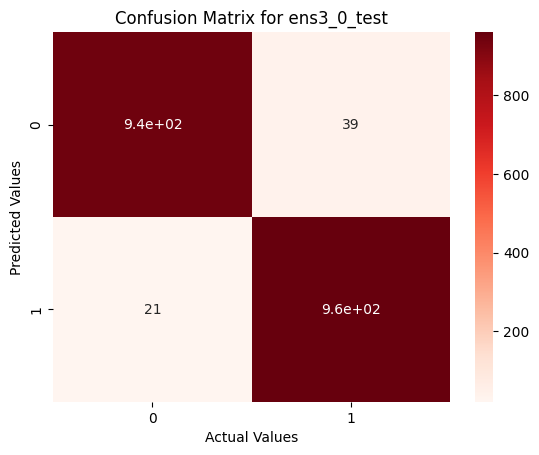

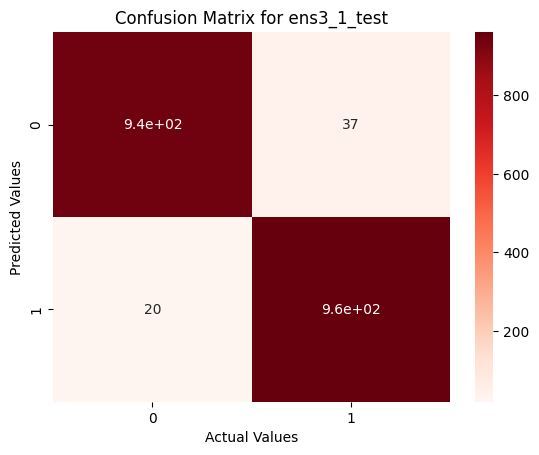

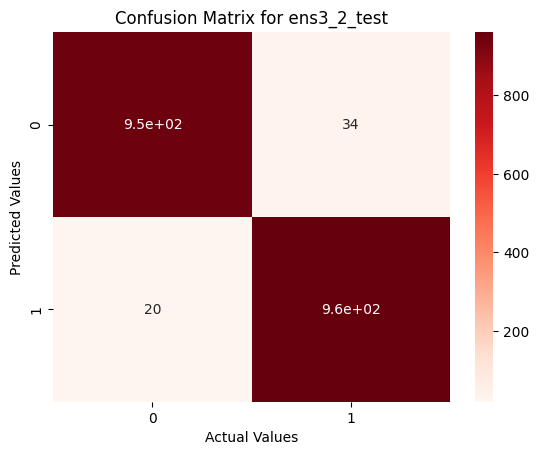

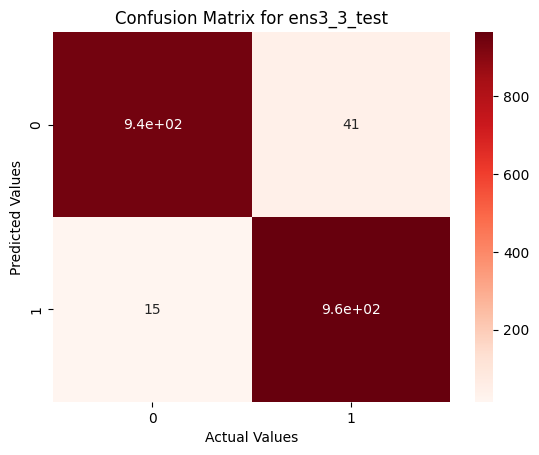

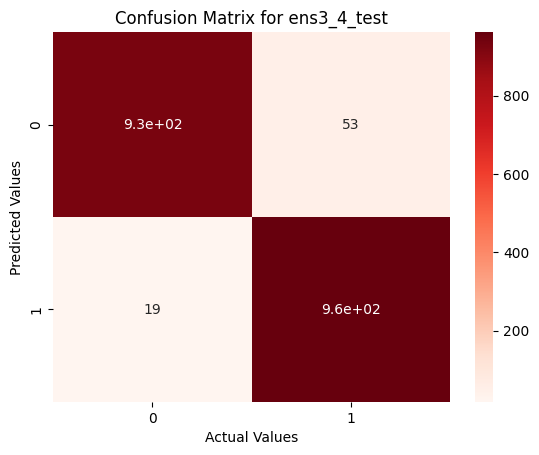

In [ ]:
ensemble(train_sets, train_target_sets, test_sets, test_target_sets, [m5,m5_1],
         model_name='ens3', cm='Reds')

CM saved
ACS train 0: 1.0
ACS test 0: 0.963302752293578
Prec train 0: 1.0
Prec test 0: 0.954954954954955
Rec train 0: 1.0
Rec test 0: 0.9724770642201835
F1-score train 0: 1.0
F1-score test 0: 0.9636363636363636


CM saved
ACS train 1: 1.0
ACS test 1: 0.9678899082568807
Prec train 1: 1.0
Prec test 1: 0.9580838323353293
Rec train 1: 1.0
Rec test 1: 0.9785932721712538
F1-score train 1: 1.0
F1-score test 1: 0.9682299546142209


CM saved
ACS train 2: 1.0
ACS test 2: 0.9740061162079511
Prec train 2: 1.0
Prec test 2: 0.965
Rec train 2: 1.0
Rec test 2: 0.9836901121304791
F1-score train 2: 1.0
F1-score test 2: 0.9742554265522463


CM saved
ACS train 3: 1.0
ACS test 3: 0.9663437021927588
Prec train 3: 1.0
Prec test 3: 0.9498031496062992
Rec train 3: 1.0
Rec test 3: 0.9846938775510204
F1-score train 3: 1.0
F1-score test 3: 0.966933867735471


CM saved
ACS train 4: 1.0
ACS test 4: 0.9643039265680775
Prec train 4: 1.0
Prec test 4: 0.9470068694798822
Rec train 4: 1.0
Rec test 4: 0.9836901121304791
F

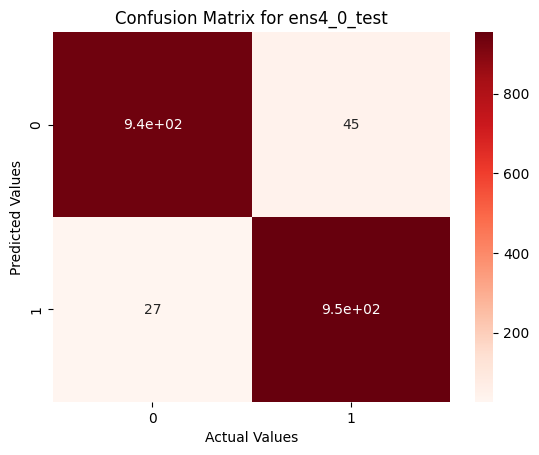

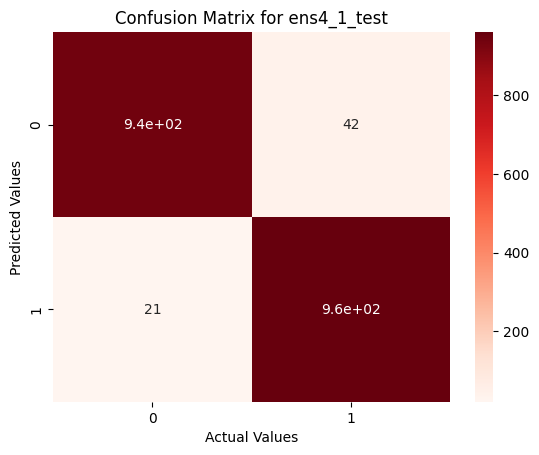

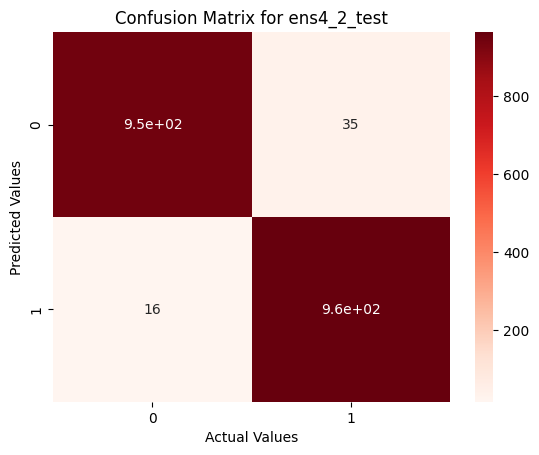

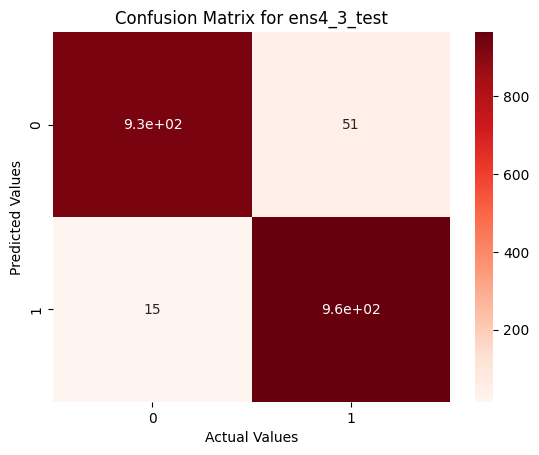

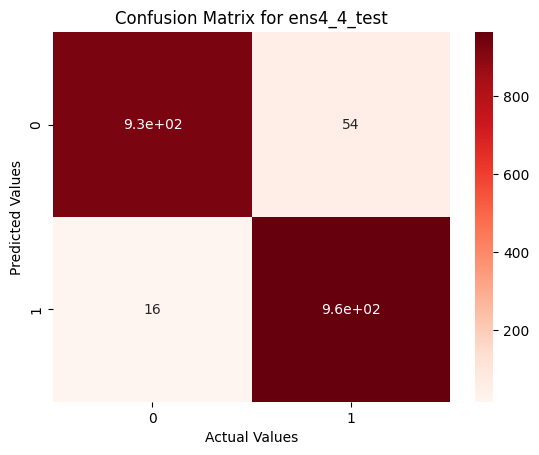

In [ ]:
ensemble(train_sets, train_target_sets, test_sets, test_target_sets, [m4,m4_1],
         model_name='ens4', cm='Reds')

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [15:12:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "criterion", "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


CM saved
ACS train 0: 1.0
ACS test 0: 0.9683995922528033
Prec train 0: 1.0
Prec test 0: 0.9563058589870904
Rec train 0: 1.0
Rec test 0: 0.981651376146789
F1-score train 0: 1.0
F1-score test 0: 0.9688128772635816




/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [15:17:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "criterion", "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


CM saved
ACS train 1: 1.0
ACS test 1: 0.9653414882772681
Prec train 1: 1.0
Prec test 1: 0.9479882237487733
Rec train 1: 1.0
Rec test 1: 0.9847094801223242
F1-score train 1: 1.0
F1-score test 1: 0.9660000000000001




/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [15:22:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "criterion", "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


CM saved
ACS train 2: 1.0
ACS test 2: 0.9704383282364933
Prec train 2: 1.0
Prec test 2: 0.9592039800995025
Rec train 2: 1.0
Rec test 2: 0.9826707441386341
F1-score train 2: 1.0
F1-score test 2: 0.9707955689828802




/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [15:27:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "criterion", "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


CM saved
ACS train 3: 1.0
ACS test 3: 0.96838347781744
Prec train 3: 1.0
Prec test 3: 0.9508840864440079
Rec train 3: 1.0
Rec test 3: 0.9877551020408163
F1-score train 3: 1.0
F1-score test 3: 0.9689689689689689




/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [15:32:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "criterion", "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


CM saved
ACS train 4: 1.0
ACS test 4: 0.9632840387557369
Prec train 4: 1.0
Prec test 4: 0.9416909620991254
Rec train 4: 1.0
Rec test 4: 0.9877675840978594
F1-score train 4: 1.0
F1-score test 4: 0.964179104477612


Final Train Accuracy : 100.0+-0.0
Final Test Accuracy : 96.717+-0.253
Final Train Precision : 100.0+-0.0
Final Test Precision : 95.121+-0.618
Final Train Recall : 100.0+-0.0
Final Test Recall : 98.491+-0.253
Final Train F1 : 100.0+-0.0
Final Test F1 : 96.775+-0.235


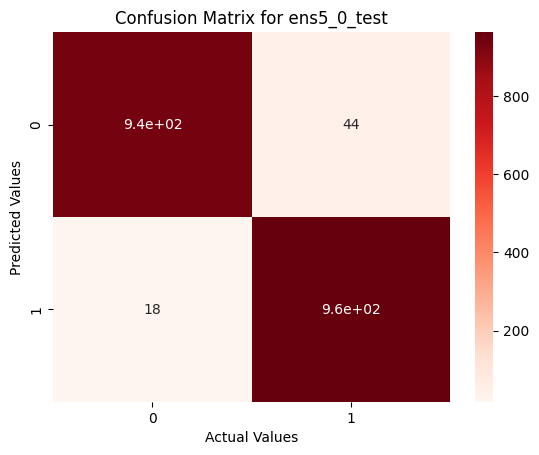

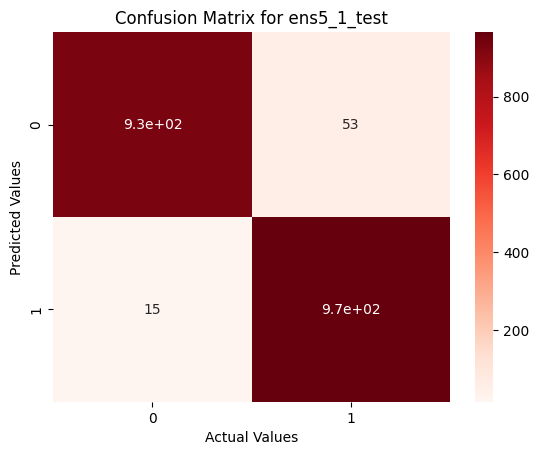

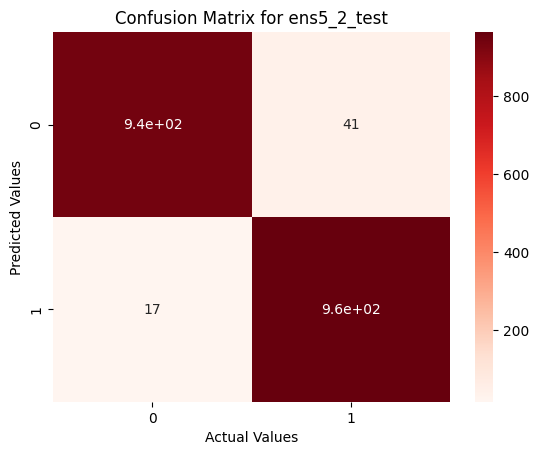

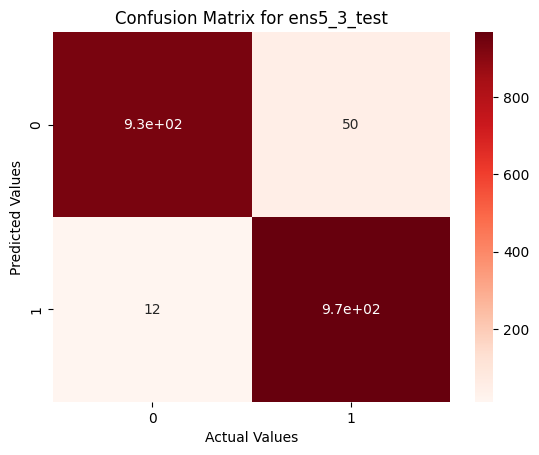

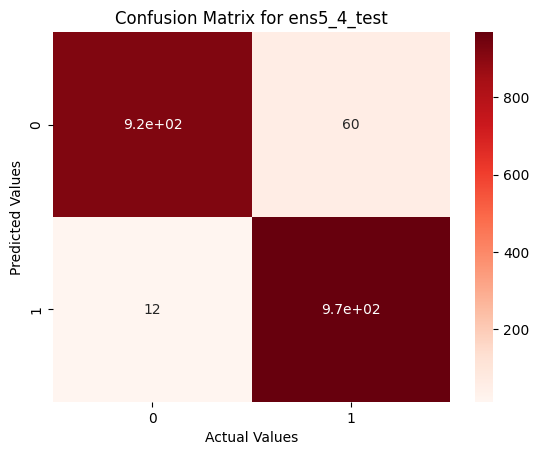

In [ ]:
ensemble(train_sets, train_target_sets, test_sets, test_target_sets, [m4,m5_1],
         model_name='ens5', cm='Reds')

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [15:32:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "criterion", "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


CM saved
ACS train 0: 1.0
ACS test 0: 0.9658511722731906
Prec train 0: 1.0
Prec test 0: 0.9506903353057199
Rec train 0: 1.0
Rec test 0: 0.9826707441386341
F1-score train 0: 1.0
F1-score test 0: 0.9664160401002507




/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [15:37:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "criterion", "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


CM saved
ACS train 1: 1.0
ACS test 1: 0.9668705402650357
Prec train 1: 1.0
Prec test 1: 0.9543650793650794
Rec train 1: 1.0
Rec test 1: 0.9806320081549439
F1-score train 1: 1.0
F1-score test 1: 0.9673202614379085




/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [15:42:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "criterion", "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


CM saved
ACS train 2: 1.0
ACS test 2: 0.971967380224261
Prec train 2: 1.0
Prec test 2: 0.9602385685884692
Rec train 2: 1.0
Rec test 2: 0.9847094801223242
F1-score train 2: 1.0
F1-score test 2: 0.9723200805234021




/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [15:47:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "criterion", "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


CM saved
ACS train 3: 1.0
ACS test 3: 0.9668536460989291
Prec train 3: 1.0
Prec test 3: 0.9480901077375122
Rec train 3: 1.0
Rec test 3: 0.9877551020408163
F1-score train 3: 1.0
F1-score test 3: 0.9675162418790605




/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [15:52:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "criterion", "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


CM saved
ACS train 4: 1.0
ACS test 4: 0.9622641509433962
Prec train 4: 1.0
Prec test 4: 0.9381642512077295
Rec train 4: 1.0
Rec test 4: 0.9898063200815495
F1-score train 4: 1.0
F1-score test 4: 0.9632936507936508


Final Train Accuracy : 100.0+-0.0
Final Test Accuracy : 96.676+-0.31
Final Train Precision : 100.0+-0.0
Final Test Precision : 95.031+-0.732
Final Train Recall : 100.0+-0.0
Final Test Recall : 98.511+-0.332
Final Train F1 : 100.0+-0.0
Final Test F1 : 96.737+-0.29


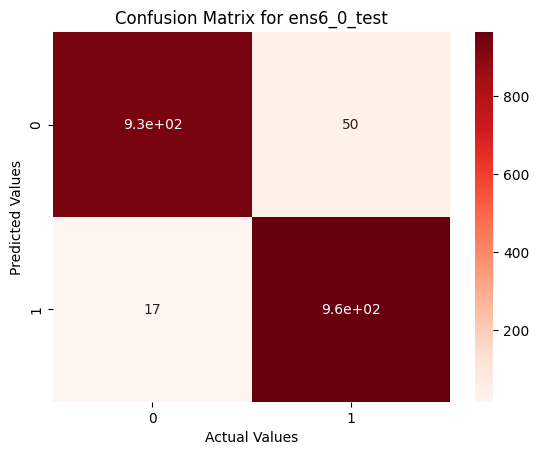

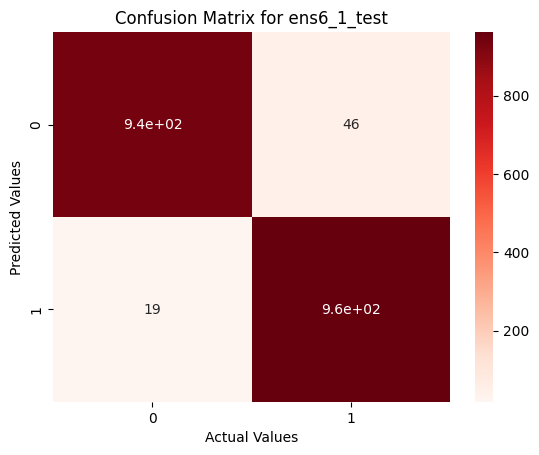

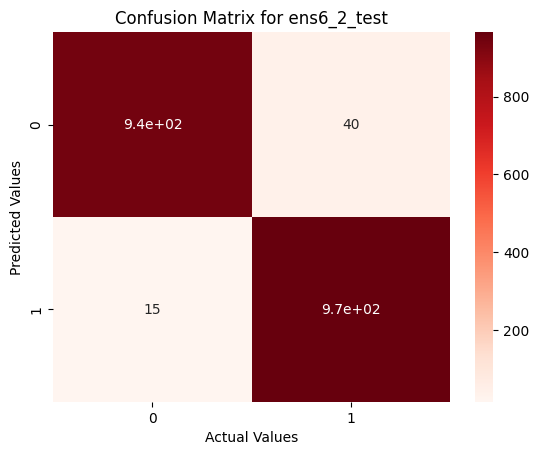

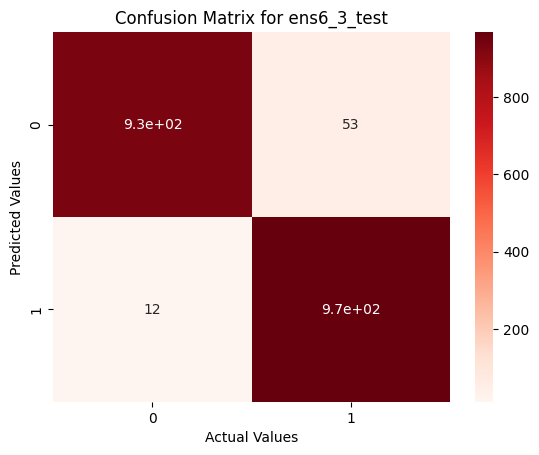

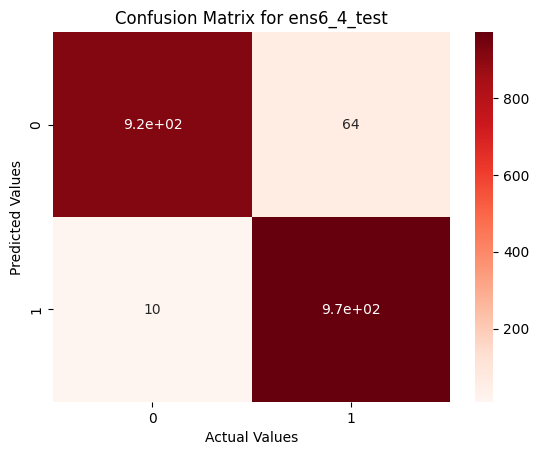

In [ ]:
ensemble(train_sets, train_target_sets, test_sets, test_target_sets, [m5,m4_1],
         model_name='ens6', cm='Reds')

CM saved
ACS train 0: 1.0
ACS test 0: 0.9576962283384302
Prec train 0: 1.0
Prec test 0: 0.9359223300970874
Rec train 0: 1.0
Rec test 0: 0.9826707441386341
F1-score train 0: 1.0
F1-score test 0: 0.9587270014917951


CM saved
ACS train 1: 1.0
ACS test 1: 0.9582059123343527
Prec train 1: 1.0
Prec test 1: 0.937682570593963
Rec train 1: 1.0
Rec test 1: 0.981651376146789
F1-score train 1: 1.0
F1-score test 1: 0.9591633466135457


CM saved
ACS train 2: 1.0
ACS test 2: 0.9689092762487258
Prec train 2: 1.0
Prec test 2: 0.952755905511811
Rec train 2: 1.0
Rec test 2: 0.9867482161060143
F1-score train 2: 1.0
F1-score test 2: 0.9694541812719079


CM saved
ACS train 3: 1.0
ACS test 3: 0.9592044875063743
Prec train 3: 1.0
Prec test 3: 0.936046511627907
Rec train 3: 1.0
Rec test 3: 0.9857142857142858
F1-score train 3: 1.0
F1-score test 3: 0.9602385685884692


CM saved
ACS train 4: 1.0
ACS test 4: 0.9581845996940337
Prec train 4: 1.0
Prec test 4: 0.9334619093539055
Rec train 4: 1.0
Rec test 4: 0.986748

<ipython-input-88-cf8f70d824de>:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


CM saved
ACS train 0: 1.0
ACS test 0: 0.9592252803261978
Prec train 0: 1.0
Prec test 0: 0.9403714565004888
Rec train 0: 1.0
Rec test 0: 0.9806320081549439
F1-score train 0: 1.0
F1-score test 0: 0.9600798403193613


CM saved
ACS train 1: 1.0
ACS test 1: 0.9551478083588175
Prec train 1: 1.0
Prec test 1: 0.934761441090555
Rec train 1: 1.0
Rec test 1: 0.9785932721712538
F1-score train 1: 1.0
F1-score test 1: 0.9561752988047809


CM saved
ACS train 2: 1.0
ACS test 2: 0.9694189602446484
Prec train 2: 1.0
Prec test 2: 0.9554896142433235
Rec train 2: 1.0
Rec test 2: 0.9847094801223242
F1-score train 2: 1.0
F1-score test 2: 0.9698795180722892


CM saved
ACS train 3: 1.0
ACS test 3: 0.9607343192248853
Prec train 3: 1.0
Prec test 3: 0.9387755102040817
Rec train 3: 1.0
Rec test 3: 0.9857142857142858
F1-score train 3: 1.0
F1-score test 3: 0.9616724738675958


CM saved
ACS train 4: 1.0
ACS test 4: 0.9581845996940337
Prec train 4: 1.0
Prec test 4: 0.9351403678606002
Rec train 4: 1.0
Rec test 4: 0.984

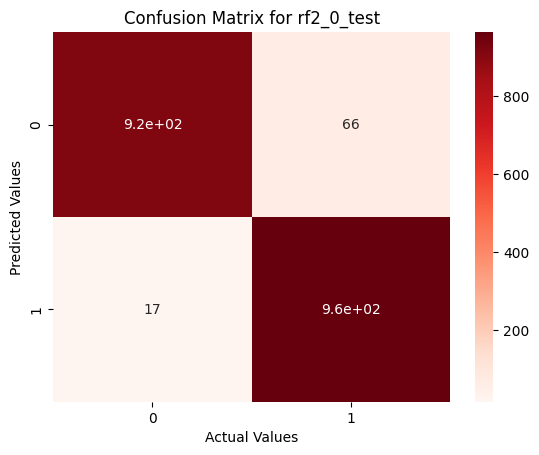

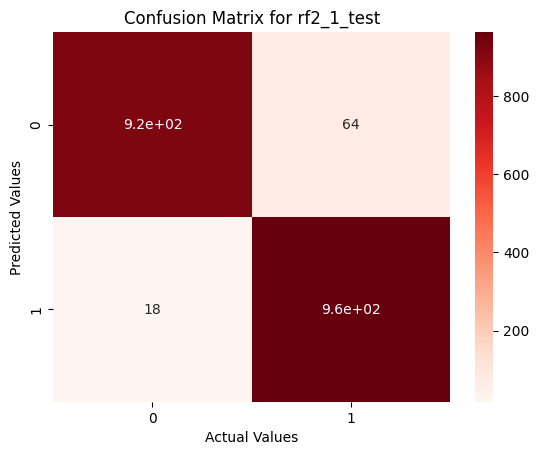

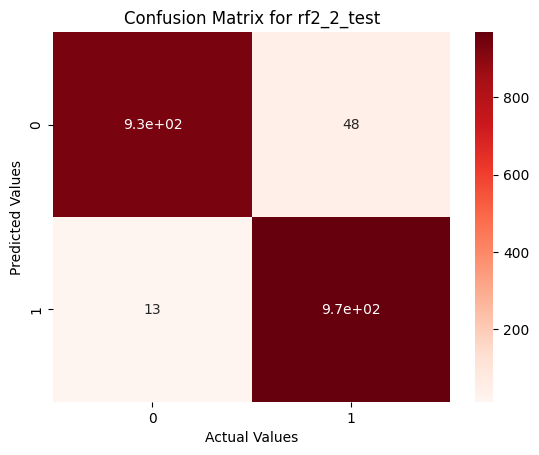

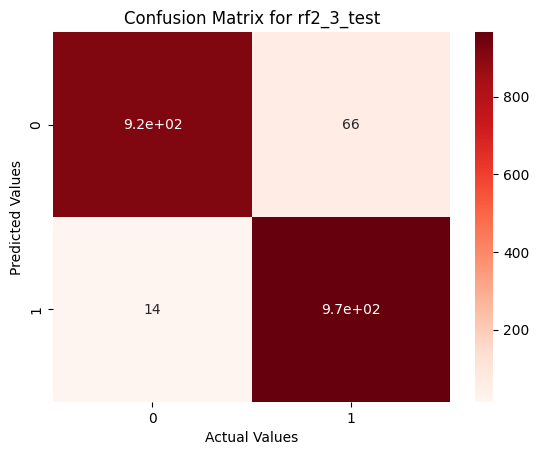

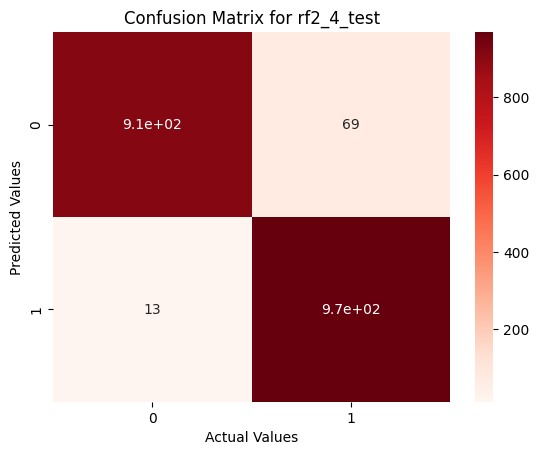

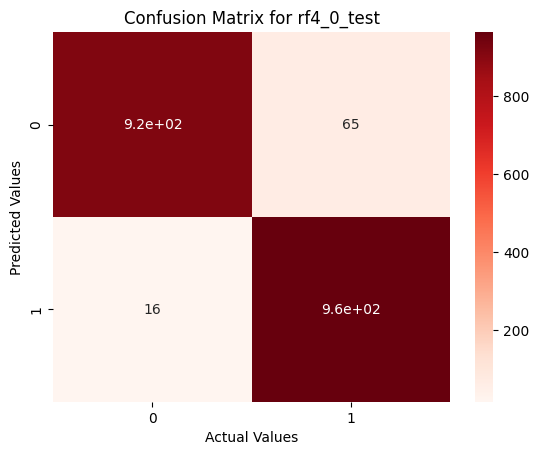

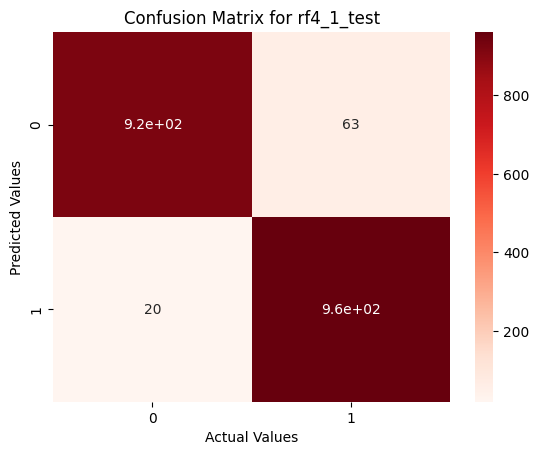

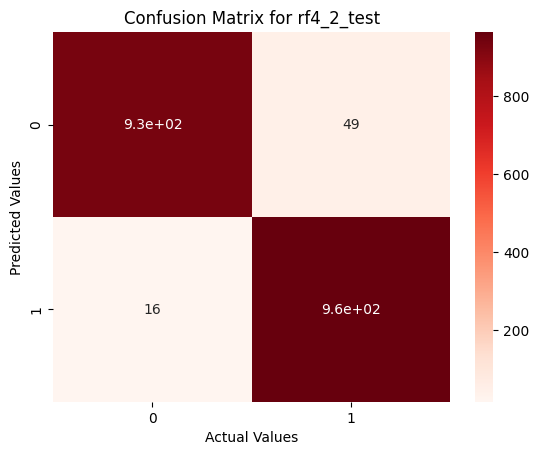

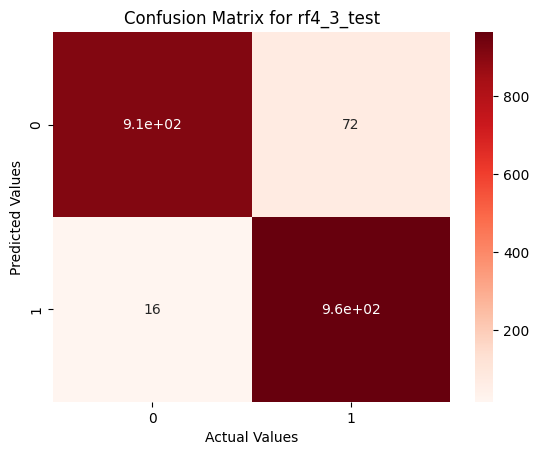

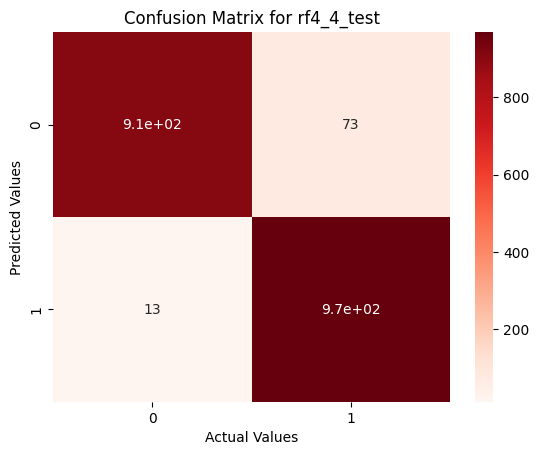

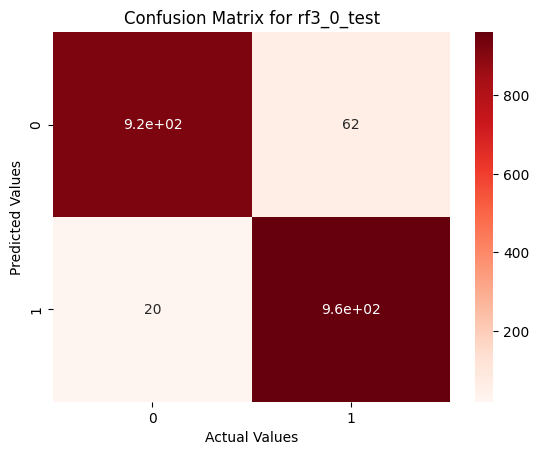

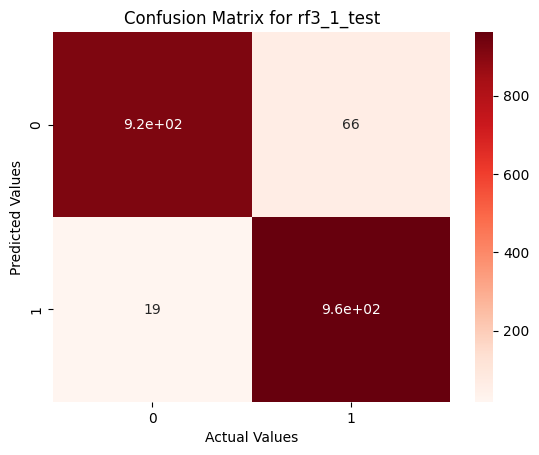

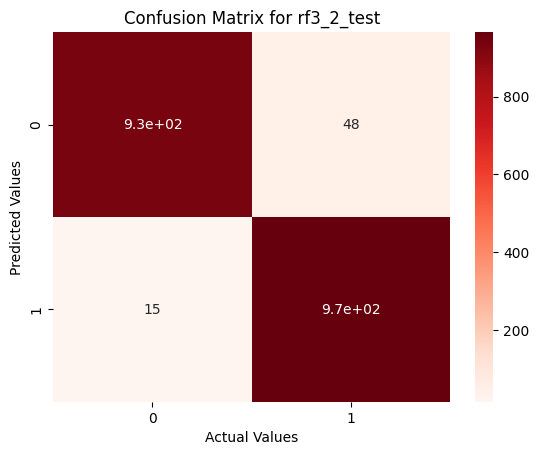

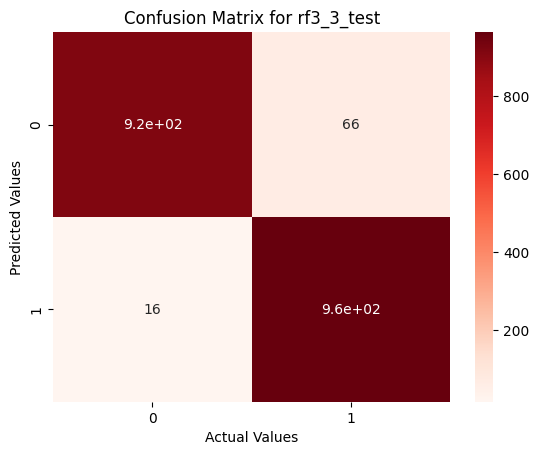

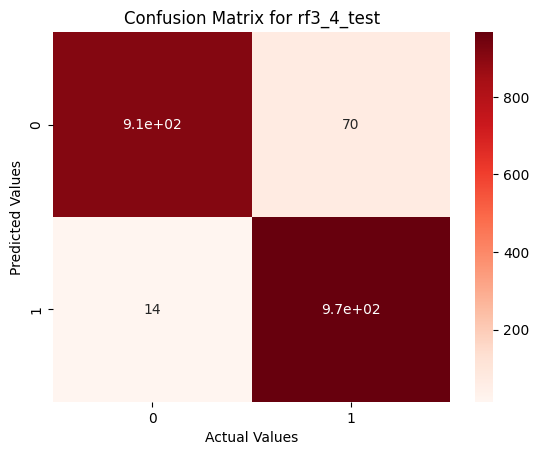

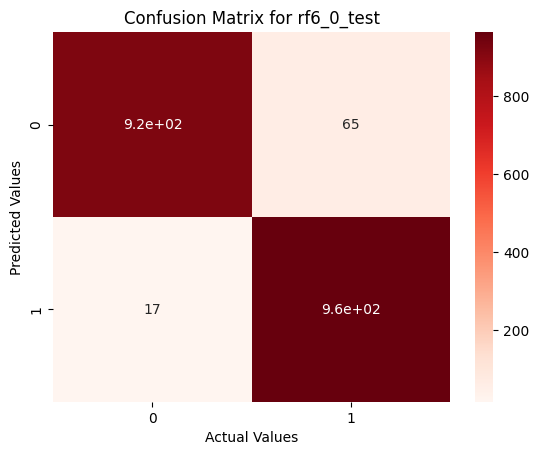

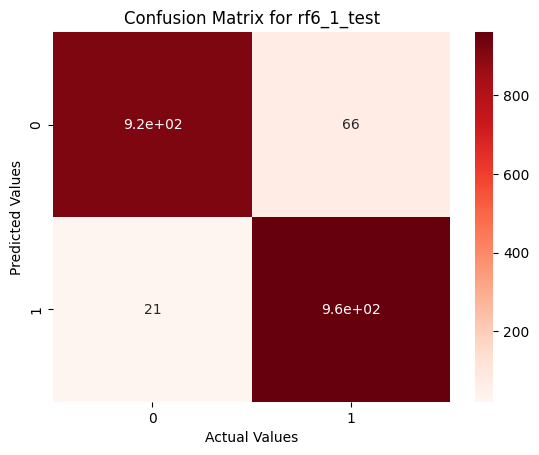

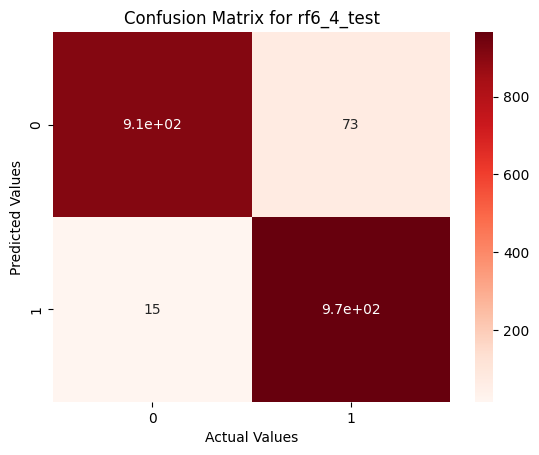

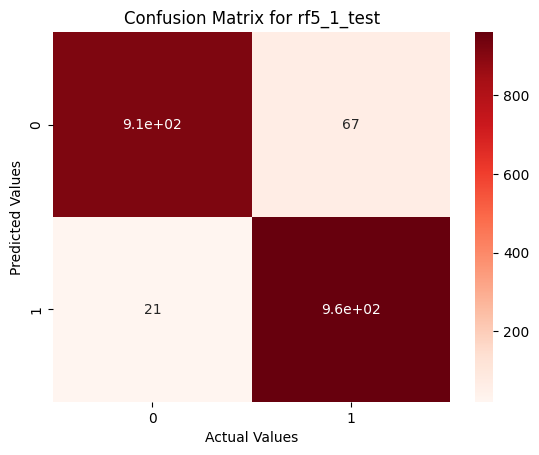

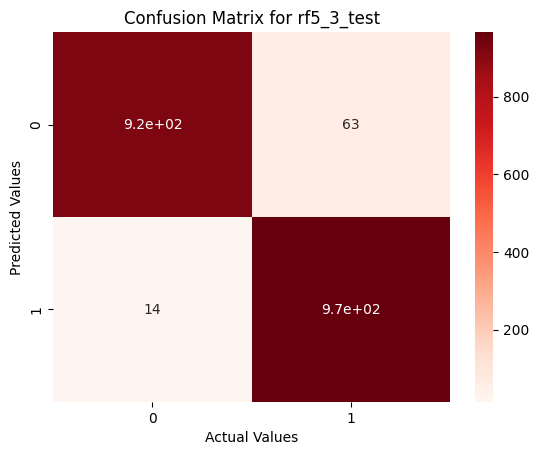

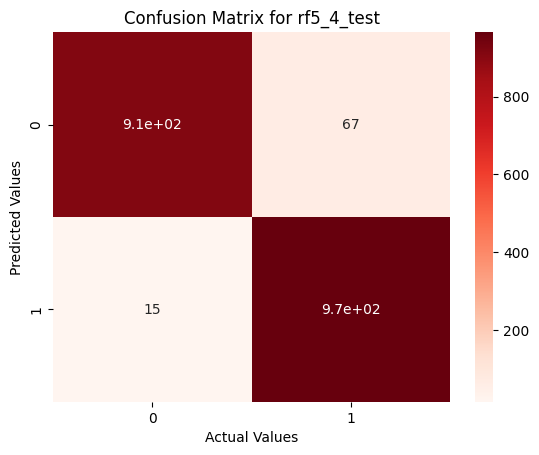

In [ ]:
list_params = [({'criterion': 'entropy',
   'max_depth': None,
   'min_samples_leaf': 1,
   'n_estimators': 1000},
  0.95527508),
 ({'criterion': 'log_loss',
   'max_depth': None,
   'min_samples_leaf': 1,
   'n_estimators': 1000},
  0.95445959),
 ({'criterion': 'log_loss',
   'max_depth': None,
   'min_samples_leaf': 1,
   'n_estimators': 200},
  0.9544595),
 ({'criterion': 'entropy',
   'max_depth': None,
   'min_samples_leaf': 1,
   'n_estimators': 200},
  0.95418748),
 ({'criterion': 'log_loss',
   'max_depth': None,
   'min_samples_leaf': 1,
   'n_estimators': 100},
  0.95418748),
 ({'criterion': 'entropy',
   'max_depth': None,
   'min_samples_leaf': 1,
   'n_estimators': 50},
  0.95418739)]
num = [2,4,3,6,5]
i=0
while i<len(num):
    param = list_params[num[i]-1][0]
    model = RandomForestClassifier(**param)
    metrics_final(model,model_name='rf{}'.format(num[i]),cm='Reds')
    i+=1

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [16:42:06] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "criterion", "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


CM saved
ACS train 0: 1.0
ACS test 0: 0.9694189602446484
Prec train 0: 1.0
Prec test 0: 0.960960960960961
Rec train 0: 1.0
Rec test 0: 0.9785932721712538
F1-score train 0: 1.0
F1-score test 0: 0.9696969696969698




/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [16:42:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "criterion", "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


CM saved
ACS train 1: 1.0
ACS test 1: 0.9709480122324159
Prec train 1: 1.0
Prec test 1: 0.9629258517034068
Rec train 1: 1.0
Rec test 1: 0.9796126401630989
F1-score train 1: 1.0
F1-score test 1: 0.9711975745325923




/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [16:42:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "criterion", "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


CM saved
ACS train 2: 1.0
ACS test 2: 0.9724770642201835
Prec train 2: 1.0
Prec test 2: 0.9658291457286432
Rec train 2: 1.0
Rec test 2: 0.9796126401630989
F1-score train 2: 1.0
F1-score test 2: 0.9726720647773279




/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [16:42:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "criterion", "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


CM saved
ACS train 3: 1.0
ACS test 3: 0.971443141254462
Prec train 3: 1.0
Prec test 3: 0.9592445328031809
Rec train 3: 1.0
Rec test 3: 0.9846938775510204
F1-score train 3: 1.0
F1-score test 3: 0.9718026183282981




/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [16:42:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "criterion", "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


CM saved
ACS train 4: 1.0
ACS test 4: 0.9632840387557369
Prec train 4: 1.0
Prec test 4: 0.9477832512315271
Rec train 4: 1.0
Rec test 4: 0.9806320081549439
F1-score train 4: 1.0
F1-score test 4: 0.9639278557114228


Final Train Accuracy : 100.0+-0.0
Final Test Accuracy : 96.951+-0.327
Final Train Precision : 100.0+-0.0
Final Test Precision : 95.935+-0.618
Final Train Recall : 100.0+-0.0
Final Test Recall : 98.063+-0.213
Final Train F1 : 100.0+-0.0
Final Test F1 : 96.986+-0.312


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [16:42:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "criterion", "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


CM saved
ACS train 0: 1.0
ACS test 0: 0.9694189602446484
Prec train 0: 1.0
Prec test 0: 0.960960960960961
Rec train 0: 1.0
Rec test 0: 0.9785932721712538
F1-score train 0: 1.0
F1-score test 0: 0.9696969696969698




/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [16:42:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "criterion", "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


CM saved
ACS train 1: 1.0
ACS test 1: 0.9709480122324159
Prec train 1: 1.0
Prec test 1: 0.9629258517034068
Rec train 1: 1.0
Rec test 1: 0.9796126401630989
F1-score train 1: 1.0
F1-score test 1: 0.9711975745325923




/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [16:42:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "criterion", "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


CM saved
ACS train 2: 1.0
ACS test 2: 0.9724770642201835
Prec train 2: 1.0
Prec test 2: 0.9658291457286432
Rec train 2: 1.0
Rec test 2: 0.9796126401630989
F1-score train 2: 1.0
F1-score test 2: 0.9726720647773279




/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [16:42:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "criterion", "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


CM saved
ACS train 3: 1.0
ACS test 3: 0.971443141254462
Prec train 3: 1.0
Prec test 3: 0.9592445328031809
Rec train 3: 1.0
Rec test 3: 0.9846938775510204
F1-score train 3: 1.0
F1-score test 3: 0.9718026183282981




/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [16:42:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "criterion", "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


CM saved
ACS train 4: 1.0
ACS test 4: 0.9632840387557369
Prec train 4: 1.0
Prec test 4: 0.9477832512315271
Rec train 4: 1.0
Rec test 4: 0.9806320081549439
F1-score train 4: 1.0
F1-score test 4: 0.9639278557114228


Final Train Accuracy : 100.0+-0.0
Final Test Accuracy : 96.951+-0.327
Final Train Precision : 100.0+-0.0
Final Test Precision : 95.935+-0.618
Final Train Recall : 100.0+-0.0
Final Test Recall : 98.063+-0.213
Final Train F1 : 100.0+-0.0
Final Test F1 : 96.986+-0.312


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [16:42:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "criterion", "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


CM saved
ACS train 0: 1.0
ACS test 0: 0.9694189602446484
Prec train 0: 1.0
Prec test 0: 0.960960960960961
Rec train 0: 1.0
Rec test 0: 0.9785932721712538
F1-score train 0: 1.0
F1-score test 0: 0.9696969696969698




/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [16:42:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "criterion", "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


CM saved
ACS train 1: 1.0
ACS test 1: 0.9709480122324159
Prec train 1: 1.0
Prec test 1: 0.9629258517034068
Rec train 1: 1.0
Rec test 1: 0.9796126401630989
F1-score train 1: 1.0
F1-score test 1: 0.9711975745325923




/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [16:42:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "criterion", "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


CM saved
ACS train 2: 1.0
ACS test 2: 0.9724770642201835
Prec train 2: 1.0
Prec test 2: 0.9658291457286432
Rec train 2: 1.0
Rec test 2: 0.9796126401630989
F1-score train 2: 1.0
F1-score test 2: 0.9726720647773279




/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [16:42:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "criterion", "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


CM saved
ACS train 3: 1.0
ACS test 3: 0.971443141254462
Prec train 3: 1.0
Prec test 3: 0.9592445328031809
Rec train 3: 1.0
Rec test 3: 0.9846938775510204
F1-score train 3: 1.0
F1-score test 3: 0.9718026183282981




/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [16:43:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "criterion", "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


CM saved
ACS train 4: 1.0
ACS test 4: 0.9632840387557369
Prec train 4: 1.0
Prec test 4: 0.9477832512315271
Rec train 4: 1.0
Rec test 4: 0.9806320081549439
F1-score train 4: 1.0
F1-score test 4: 0.9639278557114228


Final Train Accuracy : 100.0+-0.0
Final Test Accuracy : 96.951+-0.327
Final Train Precision : 100.0+-0.0
Final Test Precision : 95.935+-0.618
Final Train Recall : 100.0+-0.0
Final Test Recall : 98.063+-0.213
Final Train F1 : 100.0+-0.0
Final Test F1 : 96.986+-0.312


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [16:43:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "criterion", "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


CM saved
ACS train 0: 1.0
ACS test 0: 0.9694189602446484
Prec train 0: 1.0
Prec test 0: 0.960960960960961
Rec train 0: 1.0
Rec test 0: 0.9785932721712538
F1-score train 0: 1.0
F1-score test 0: 0.9696969696969698




/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [16:43:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "criterion", "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


CM saved
ACS train 1: 1.0
ACS test 1: 0.9709480122324159
Prec train 1: 1.0
Prec test 1: 0.9629258517034068
Rec train 1: 1.0
Rec test 1: 0.9796126401630989
F1-score train 1: 1.0
F1-score test 1: 0.9711975745325923




/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [16:43:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "criterion", "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


CM saved
ACS train 2: 1.0
ACS test 2: 0.9724770642201835
Prec train 2: 1.0
Prec test 2: 0.9658291457286432
Rec train 2: 1.0
Rec test 2: 0.9796126401630989
F1-score train 2: 1.0
F1-score test 2: 0.9726720647773279




/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [16:43:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "criterion", "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


CM saved
ACS train 3: 1.0
ACS test 3: 0.971443141254462
Prec train 3: 1.0
Prec test 3: 0.9592445328031809
Rec train 3: 1.0
Rec test 3: 0.9846938775510204
F1-score train 3: 1.0
F1-score test 3: 0.9718026183282981




/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [16:43:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "criterion", "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


CM saved
ACS train 4: 1.0
ACS test 4: 0.9632840387557369
Prec train 4: 1.0
Prec test 4: 0.9477832512315271
Rec train 4: 1.0
Rec test 4: 0.9806320081549439
F1-score train 4: 1.0
F1-score test 4: 0.9639278557114228


Final Train Accuracy : 100.0+-0.0
Final Test Accuracy : 96.951+-0.327
Final Train Precision : 100.0+-0.0
Final Test Precision : 95.935+-0.618
Final Train Recall : 100.0+-0.0
Final Test Recall : 98.063+-0.213
Final Train F1 : 100.0+-0.0
Final Test F1 : 96.986+-0.312


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [16:43:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "criterion", "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)
<ipython-input-88-cf8f70d824de>:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [16:43:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "criterion", "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


CM saved
ACS train 0: 1.0
ACS test 0: 0.9694189602446484
Prec train 0: 1.0
Prec test 0: 0.960960960960961
Rec train 0: 1.0
Rec test 0: 0.9785932721712538
F1-score train 0: 1.0
F1-score test 0: 0.9696969696969698


CM saved
ACS train 1: 1.0
ACS test 1: 0.9709480122324159
Prec train 1: 1.0
Prec test 1: 0.9629258517034068
Rec train 1: 1.0
Rec test 1: 0.9796126401630989
F1-score train 1: 1.0
F1-score test 1: 0.9711975745325923




/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [16:43:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "criterion", "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


CM saved
ACS train 2: 1.0
ACS test 2: 0.9724770642201835
Prec train 2: 1.0
Prec test 2: 0.9658291457286432
Rec train 2: 1.0
Rec test 2: 0.9796126401630989
F1-score train 2: 1.0
F1-score test 2: 0.9726720647773279




/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [16:43:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "criterion", "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


CM saved
ACS train 3: 1.0
ACS test 3: 0.971443141254462
Prec train 3: 1.0
Prec test 3: 0.9592445328031809
Rec train 3: 1.0
Rec test 3: 0.9846938775510204
F1-score train 3: 1.0
F1-score test 3: 0.9718026183282981




/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [16:43:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "criterion", "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


CM saved
ACS train 4: 1.0
ACS test 4: 0.9632840387557369
Prec train 4: 1.0
Prec test 4: 0.9477832512315271
Rec train 4: 1.0
Rec test 4: 0.9806320081549439
F1-score train 4: 1.0
F1-score test 4: 0.9639278557114228


Final Train Accuracy : 100.0+-0.0
Final Test Accuracy : 96.951+-0.327
Final Train Precision : 100.0+-0.0
Final Test Precision : 95.935+-0.618
Final Train Recall : 100.0+-0.0
Final Test Recall : 98.063+-0.213
Final Train F1 : 100.0+-0.0
Final Test F1 : 96.986+-0.312


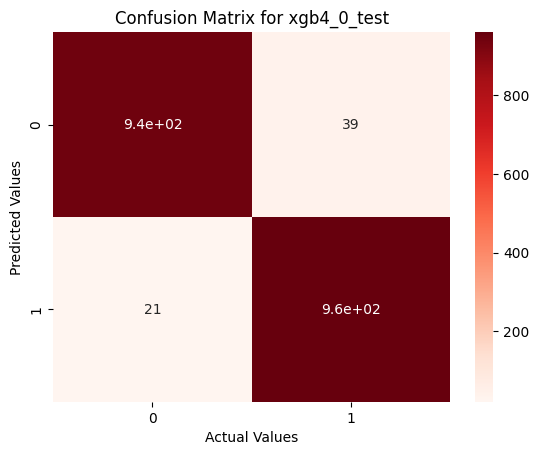

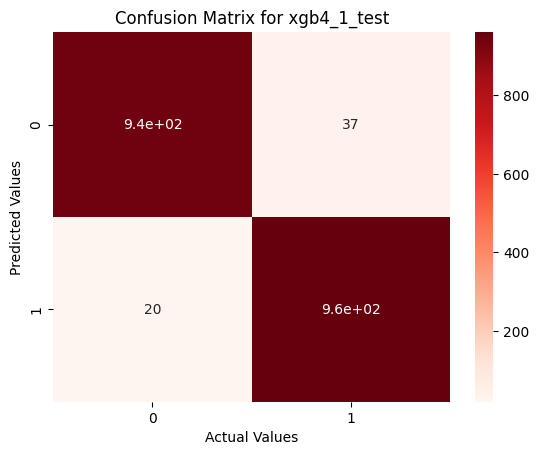

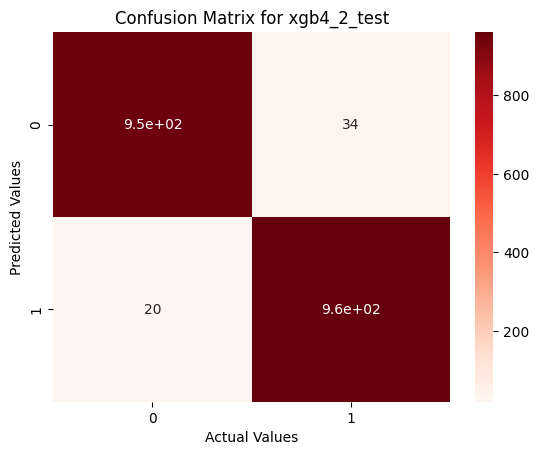

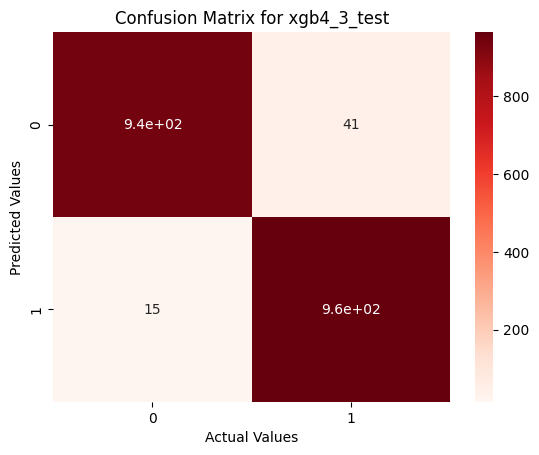

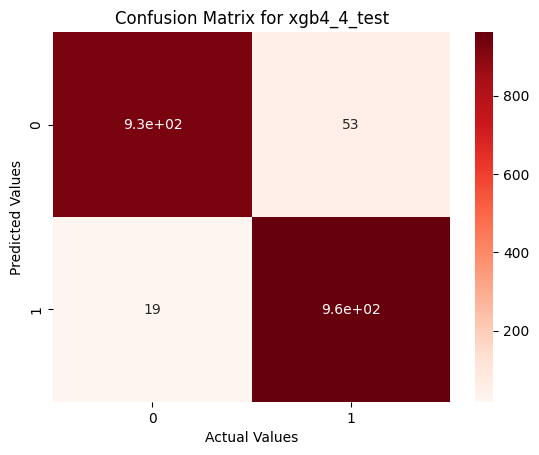

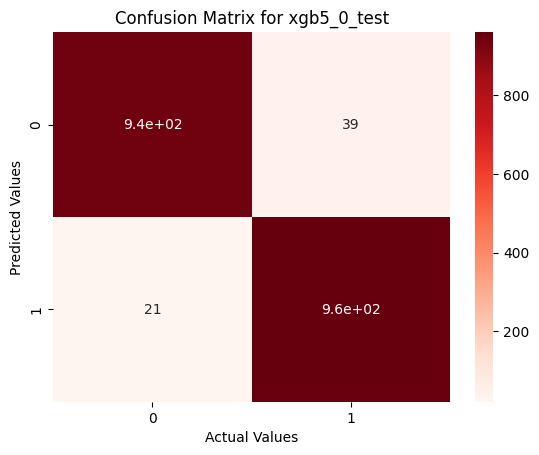

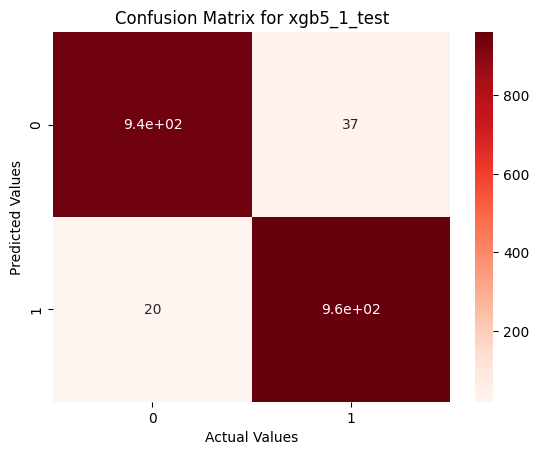

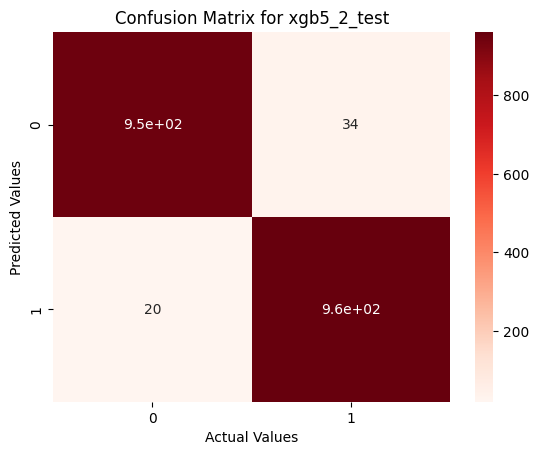

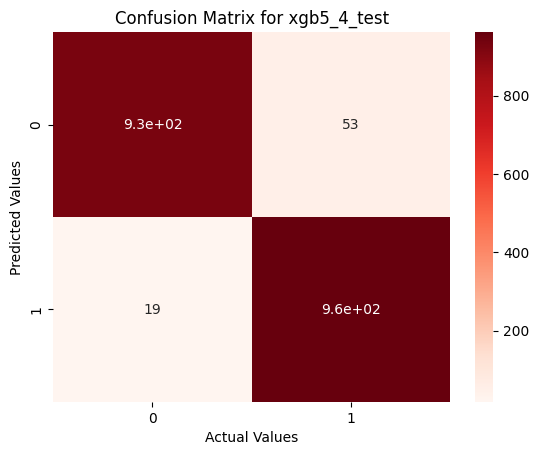

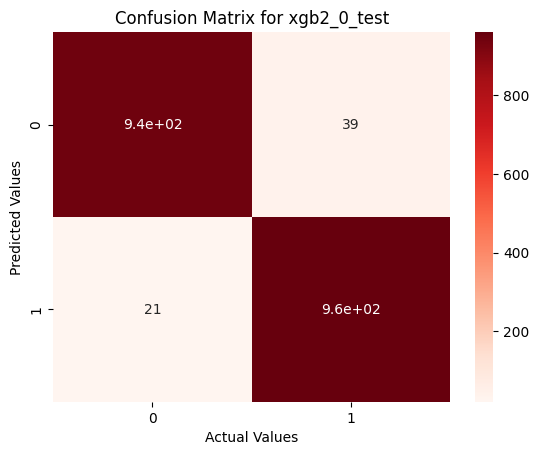

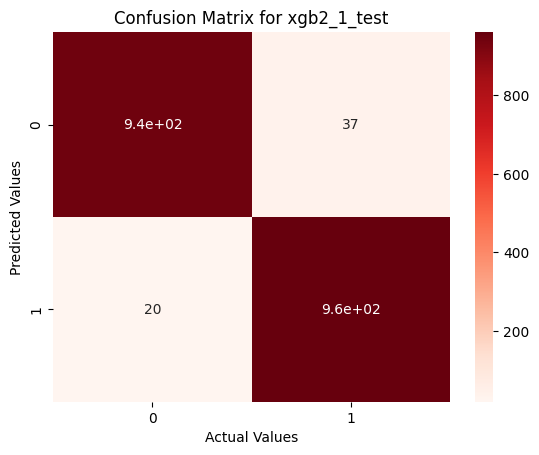

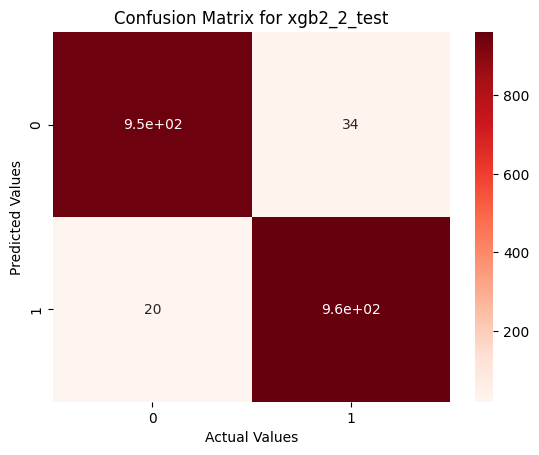

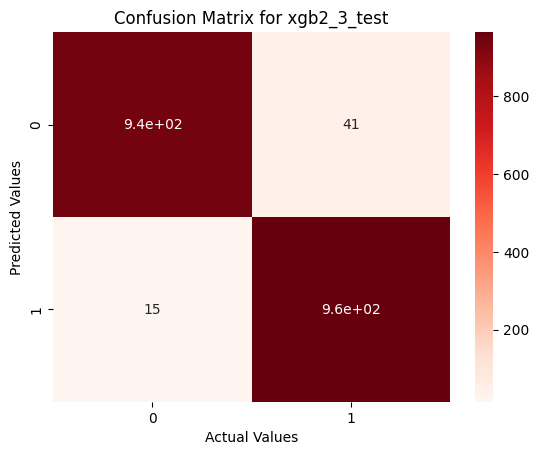

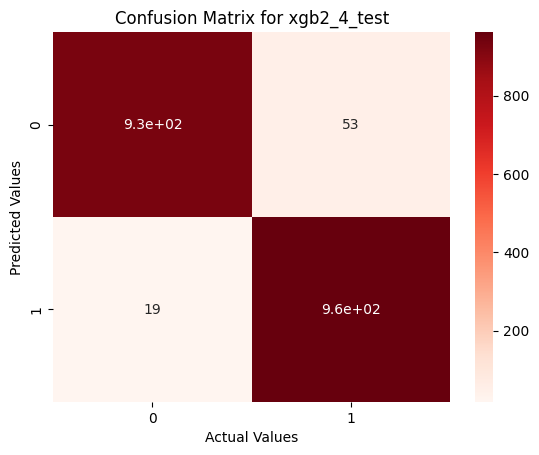

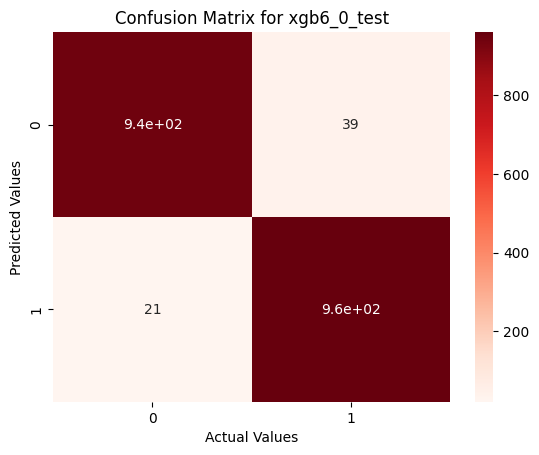

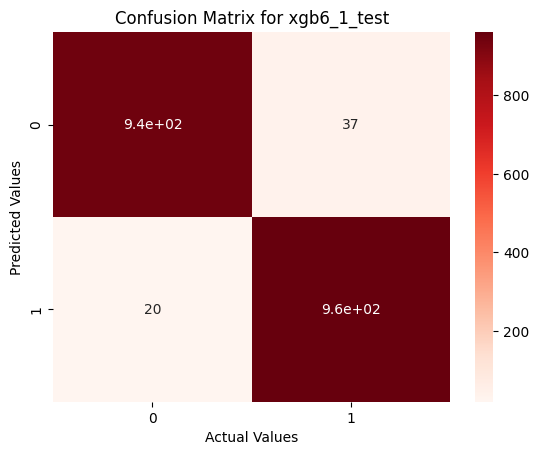

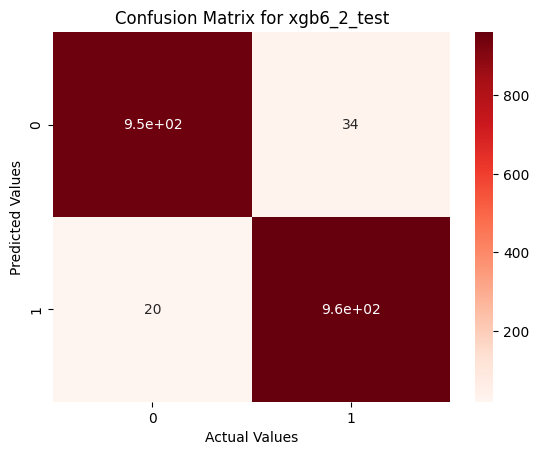

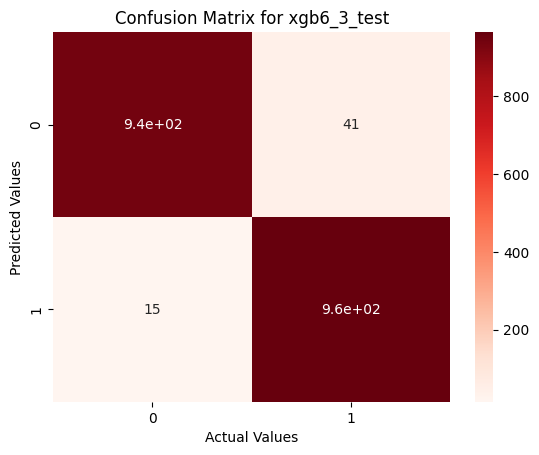

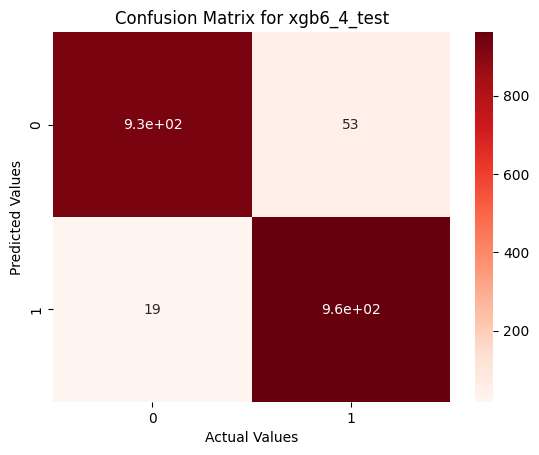

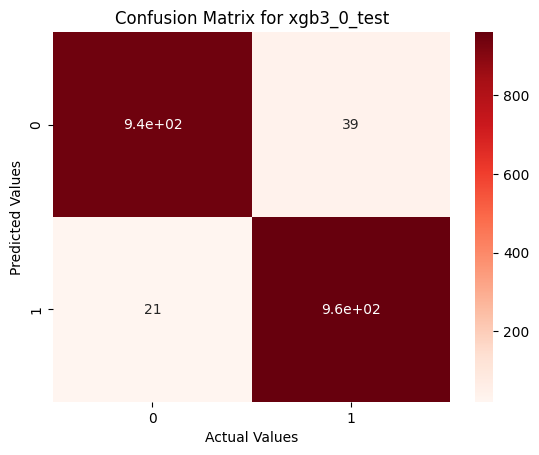

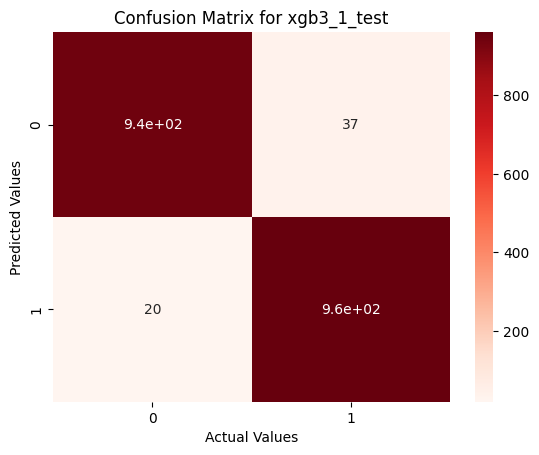

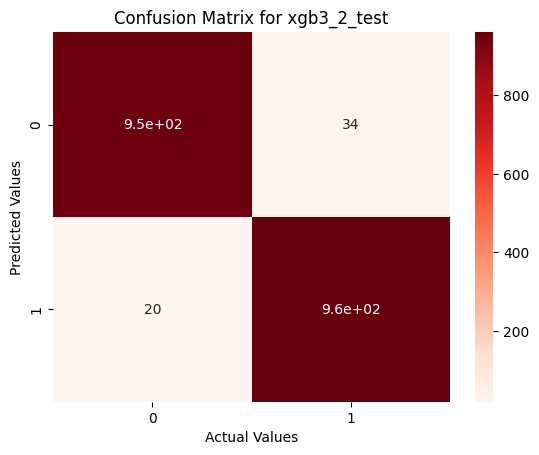

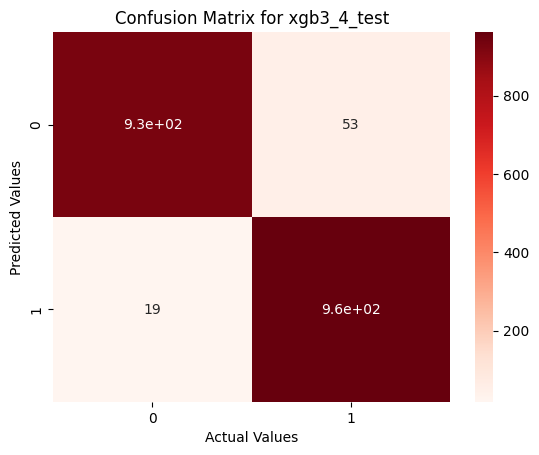

In [ ]:
list_params = [({'criterion': 'friedman_mse',
   'learning_rate': 0.300000012,
   'max_depth': 5,
   'min_samples_leaf': 1,
   'n_estimators': 500},
  0.96411122),
 ({'criterion': 'squared_error',
   'learning_rate': 0.300000012,
   'max_depth': 5,
   'min_samples_leaf': 1,
   'n_estimators': 500},
  0.96411122),
 ({'criterion': 'squared_error',
   'learning_rate': 0.300000012,
   'max_depth': 5,
   'min_samples_leaf': 5,
   'n_estimators': 500},
  0.96411122),
 ({'criterion': 'squared_error',
   'learning_rate': 0.300000012,
   'max_depth': 5,
   'min_samples_leaf': 2,
   'n_estimators': 500},
  0.96411122),
 ({'criterion': 'friedman_mse',
   'learning_rate': 0.300000012,
   'max_depth': 5,
   'min_samples_leaf': 5,
   'n_estimators': 500},
  0.96411122),
 ({'criterion': 'friedman_mse',
   'learning_rate': 0.300000012,
   'max_depth': 5,
   'min_samples_leaf': 2,
   'n_estimators': 500},
  0.96411122)]
num = [4,5,2,6,3]
i=0
while i<len(num):
    param = list_params[num[i]-1][0]
    model = XGBClassifier(**param)
    metrics_final(model,model_name='xgb{}'.format(num[i]),cm='Reds')
    i+=1

CM saved
ACS train 0: 1.0
ACS test 0: 0.9648318042813455
Prec train 0: 1.0
Prec test 0: 0.9615384615384616
Rec train 0: 1.0
Rec test 0: 0.9683995922528033
F1-score train 0: 1.0
F1-score test 0: 0.9649568308786186


CM saved
ACS train 1: 1.0
ACS test 1: 0.9683995922528033
Prec train 1: 1.0
Prec test 1: 0.9608826479438315
Rec train 1: 1.0
Rec test 1: 0.9765545361875637
F1-score train 1: 1.0
F1-score test 1: 0.968655207280081


CM saved
ACS train 2: 1.0
ACS test 2: 0.9714576962283384
Prec train 2: 1.0
Prec test 2: 0.9657603222557906
Rec train 2: 1.0
Rec test 2: 0.9775739041794088
F1-score train 2: 1.0
F1-score test 2: 0.9716312056737588


CM saved
ACS train 3: 1.0
ACS test 3: 0.969913309535951
Prec train 3: 1.0
Prec test 3: 0.959122632103689
Rec train 3: 1.0
Rec test 3: 0.9816326530612245
F1-score train 3: 1.0
F1-score test 3: 0.9702471003530005


CM saved
ACS train 4: 1.0
ACS test 4: 0.960224375318715
Prec train 4: 1.0
Prec test 4: 0.9465875370919882
Rec train 4: 1.0
Rec test 4: 0.975535

<ipython-input-88-cf8f70d824de>:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


CM saved
ACS train 0: 1.0
ACS test 0: 0.9673802242609582
Prec train 0: 1.0
Prec test 0: 0.9645390070921985
Rec train 0: 1.0
Rec test 0: 0.9704383282364933
F1-score train 0: 1.0
F1-score test 0: 0.9674796747967479


CM saved
ACS train 1: 1.0
ACS test 1: 0.9689092762487258
Prec train 1: 1.0
Prec test 1: 0.9618473895582329
Rec train 1: 1.0
Rec test 1: 0.9765545361875637
F1-score train 1: 1.0
F1-score test 1: 0.9691451694486595


CM saved
ACS train 2: 1.0
ACS test 2: 0.9704383282364933
Prec train 2: 1.0
Prec test 2: 0.9675785207700102
Rec train 2: 1.0
Rec test 2: 0.9734964322120285
F1-score train 2: 1.0
F1-score test 2: 0.9705284552845529


CM saved
ACS train 3: 1.0
ACS test 3: 0.9648138704742478
Prec train 3: 1.0
Prec test 3: 0.9496544916090819
Rec train 3: 1.0
Rec test 3: 0.9816326530612245
F1-score train 3: 1.0
F1-score test 3: 0.9653788258906171


CM saved
ACS train 4: 1.0
ACS test 4: 0.9632840387557369
Prec train 4: 1.0
Prec test 4: 0.954045954045954
Rec train 4: 1.0
Rec test 4: 0.973

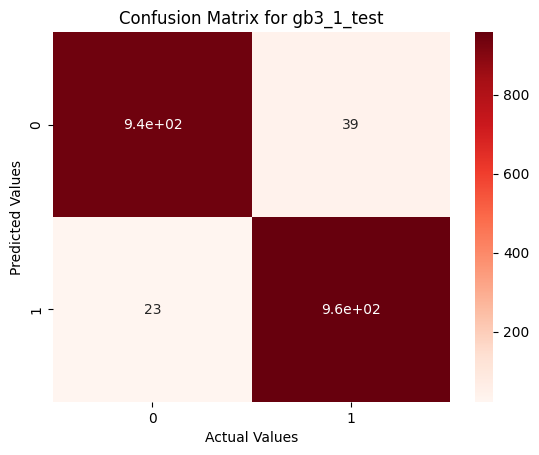

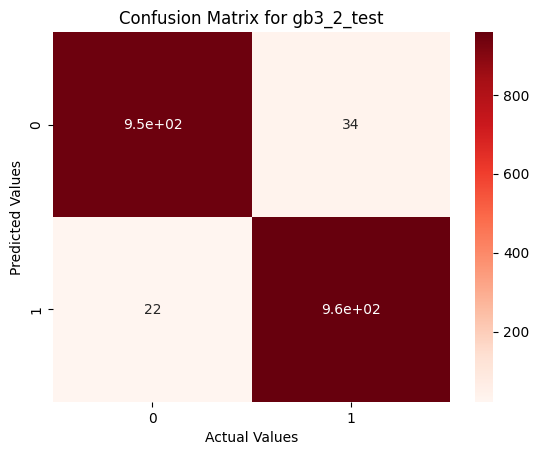

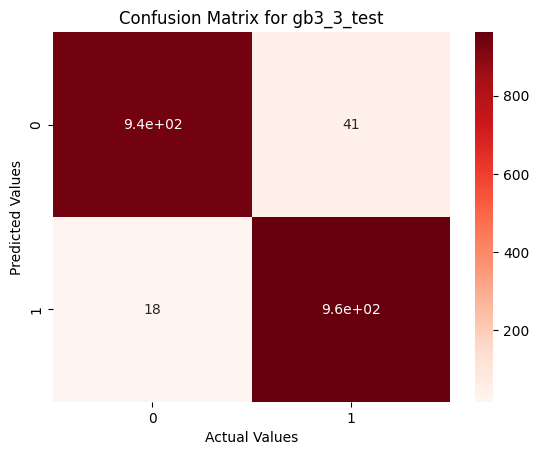

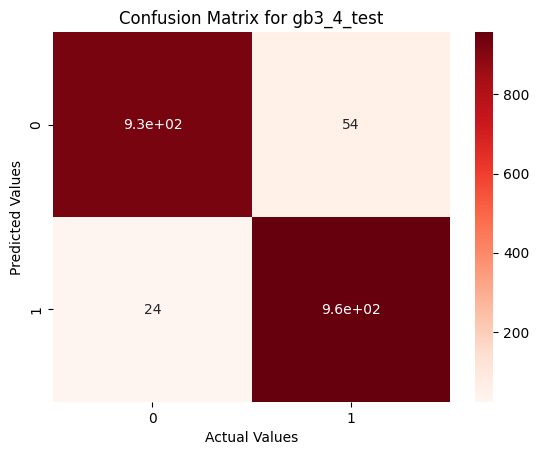

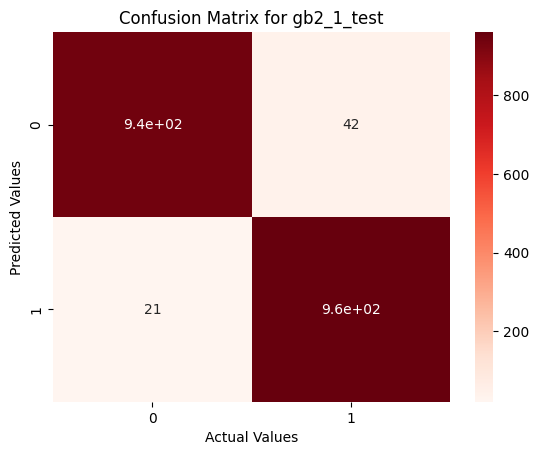

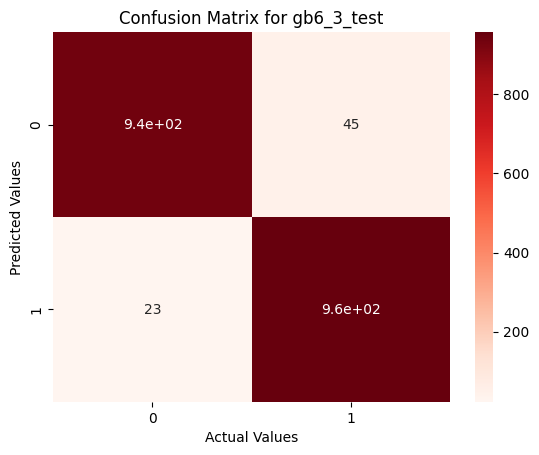

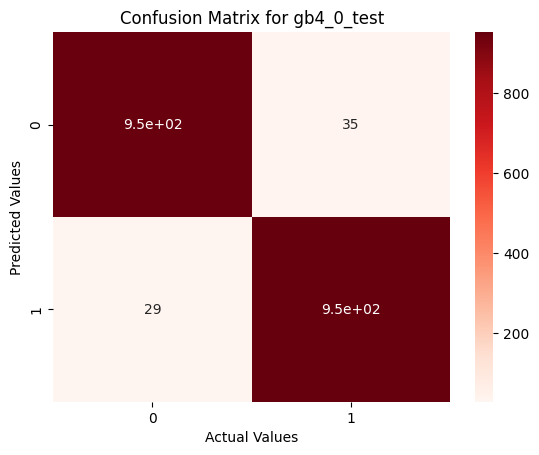

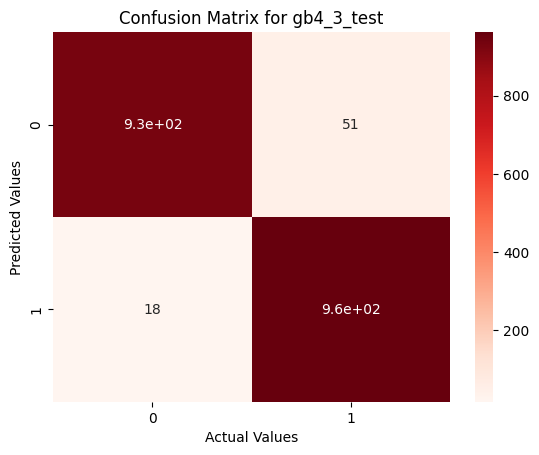

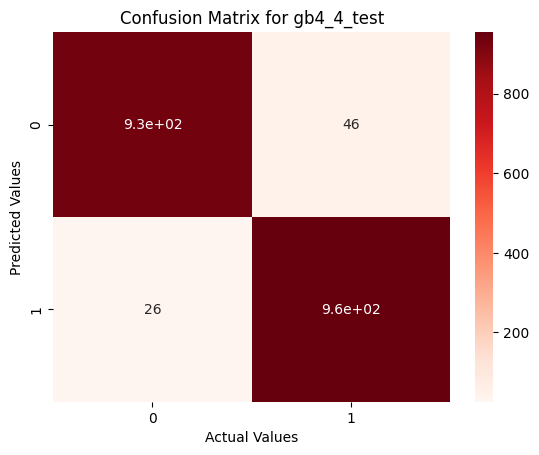

In [ ]:
list_params = [({'criterion': 'squared_error',
   'learning_rate': 0.300000012,
   'max_depth': 5,
   'min_samples_leaf': 5,
   'n_estimators': 500},
  0.96383939),
 ({'criterion': 'friedman_mse',
   'learning_rate': 0.300000012,
   'max_depth': 5,
   'min_samples_leaf': 5,
   'n_estimators': 500},
  0.96343095),
 ({'criterion': 'friedman_mse',
   'learning_rate': 0.300000012,
   'max_depth': 5,
   'min_samples_leaf': 2,
   'n_estimators': 500},
  0.9631594),
 ({'criterion': 'squared_error',
   'learning_rate': 0.300000012,
   'max_depth': 4,
   'min_samples_leaf': 5,
   'n_estimators': 500},
  0.96261564),
 ({'criterion': 'friedman_mse',
   'learning_rate': 0.300000012,
   'max_depth': 4,
   'min_samples_leaf': 5,
   'n_estimators': 500},
  0.96234335),
 ({'criterion': 'squared_error',
   'learning_rate': 0.300000012,
   'max_depth': 5,
   'min_samples_leaf': 1,
   'n_estimators': 500},
  0.96193583)]
num = [3,5,2,6,4]
i=0
while i<len(num):
    param = list_params[num[i]-1][0]
    model = GradientBoostingClassifier(**param)
    metrics_final(model,model_name='gb{}'.format(num[i]),cm='Reds')
    i+=1